# Data description


Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

Task is to create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Importing required libraries

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [171]:
df=pd.read_csv('insurance.csv')

In [172]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [173]:
df.shape

(1000, 40)

we have 1000 rows and 40 columns

In [174]:
df.apply(lambda i:len(i.unique()))

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

From this, we can see that _c39 is having only one unique value which is NaN, so we can drop this column as it does not
impact our data and we have all the null values in it.

In [175]:
df.drop('_c39',axis=1,inplace=True) # Dropping _c39 variable.

In [176]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

We can see that we have some variables with object datatype, we shall treat them later.

In [177]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

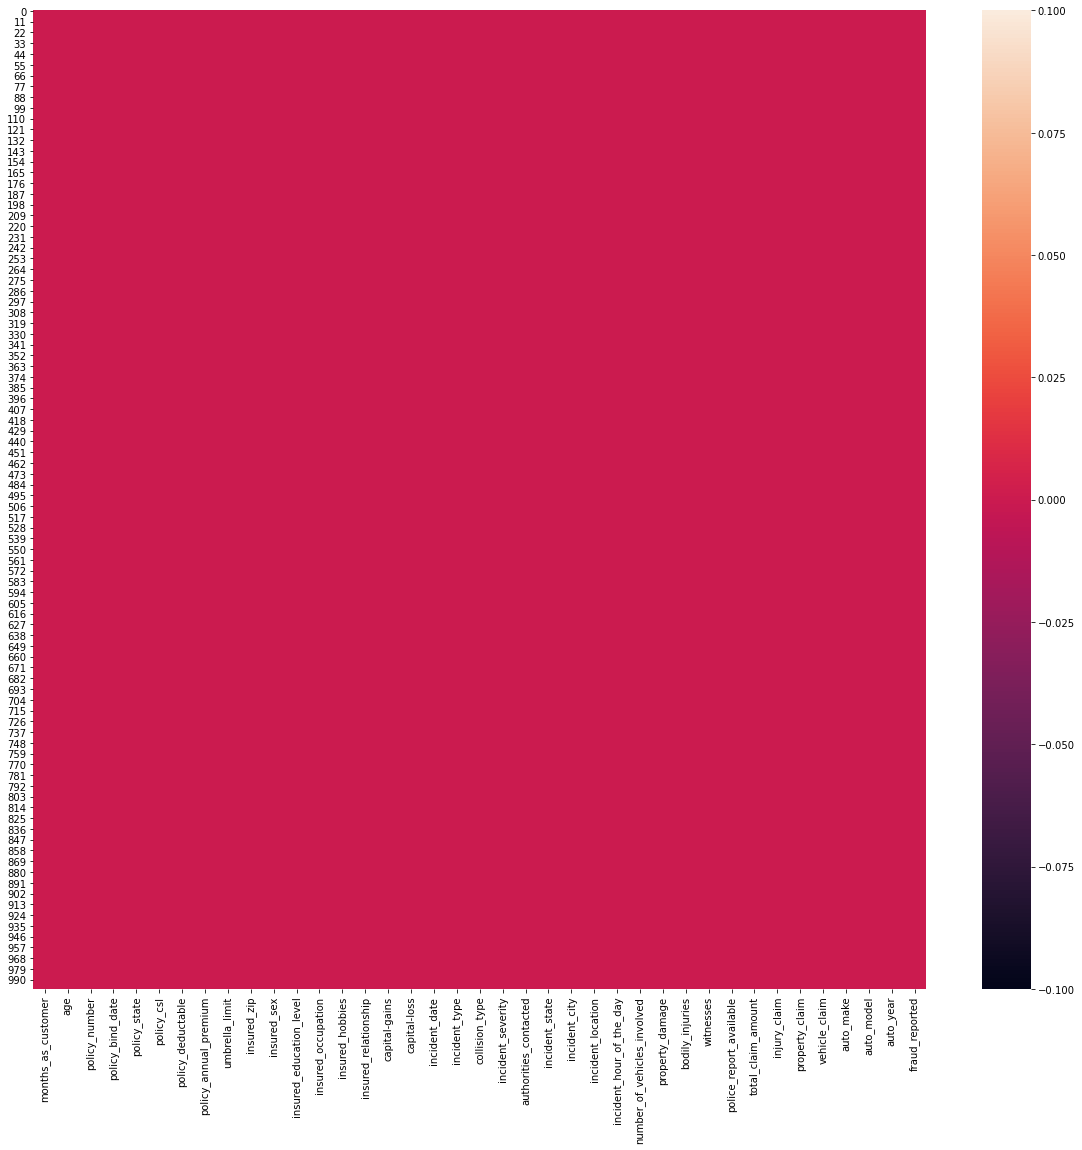

In [178]:
plt.figure(figsize=[20,18])
sns.heatmap(df.isnull())
plt.show()

There are no null values in the dataset

# Dividing the dataframe into categorical and numeric columns

In [179]:
df_cat=[]
for i in df.columns:
    if df[i].dtypes=='object':
        df_cat.append(i)
df_cat = df[['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']].copy()

In [180]:
df_num=[]
for i in df.columns:
    if df[i].dtypes != 'object':
        df_num.append(i)
        
df_num = df[['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']].copy()

# Data Visualization

In [181]:
df_cat

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16-07-1991,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,22-02-2015,Single Vehicle Collision,...,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,YES,?,Honda,Accord,N
996,05-01-2014,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,24-01-2015,Single Vehicle Collision,...,Major Damage,Fire,SC,Northbend,3092 Texas Drive,YES,?,Volkswagen,Passat,N
997,17-02-2003,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,23-01-2015,Multi-vehicle Collision,...,Minor Damage,Police,NC,Arlington,7629 5th St,?,YES,Suburu,Impreza,N
998,18-11-2011,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,26-02-2015,Single Vehicle Collision,...,Major Damage,Other,NY,Arlington,6128 Elm Lane,?,YES,Audi,A5,N


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


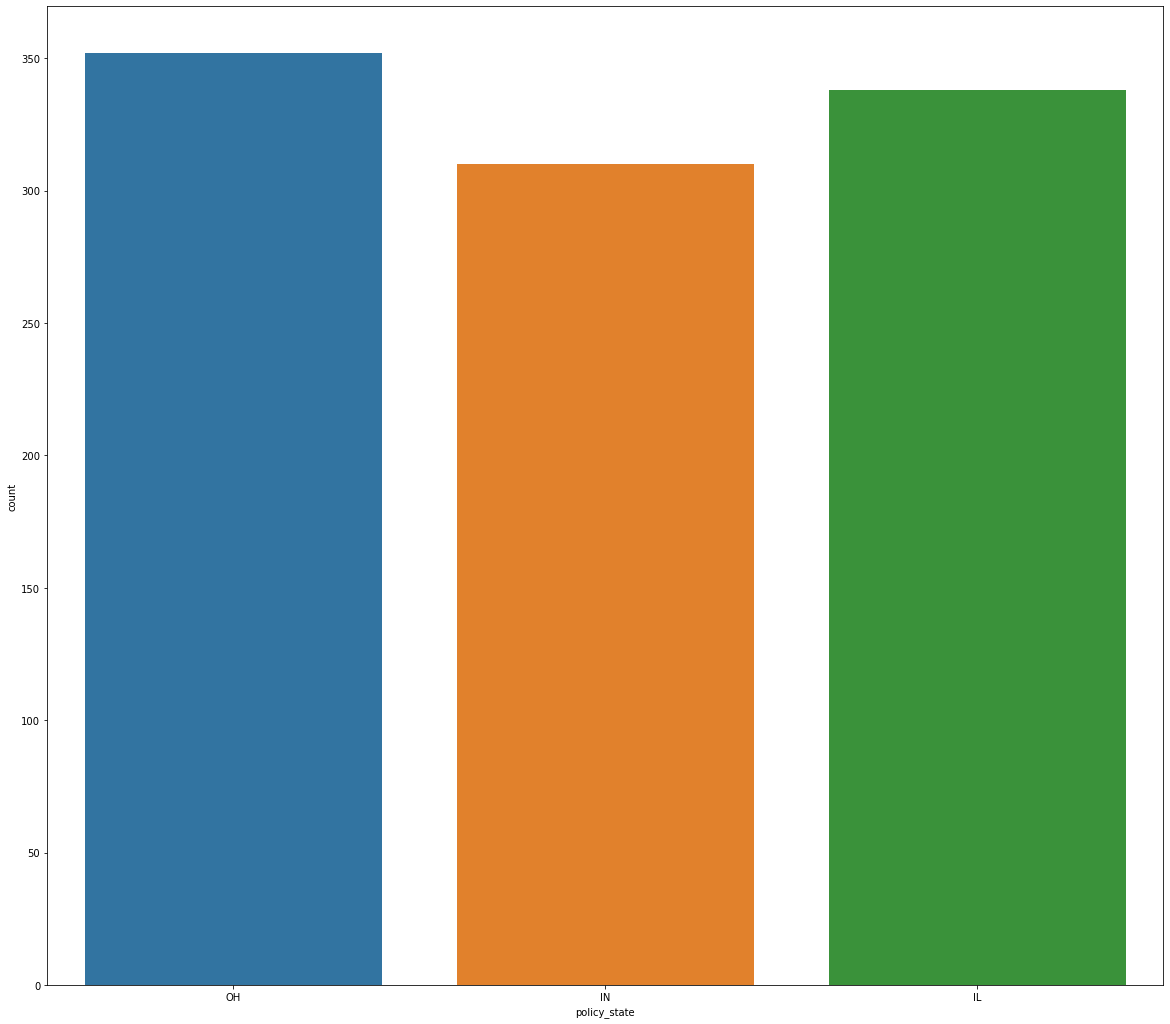

In [182]:
plt.figure(figsize=[20,18])
sns.countplot(df['policy_state'])
print(df_cat['policy_state'].value_counts())
plt.show()

People from Ohio has taken maximum policy

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


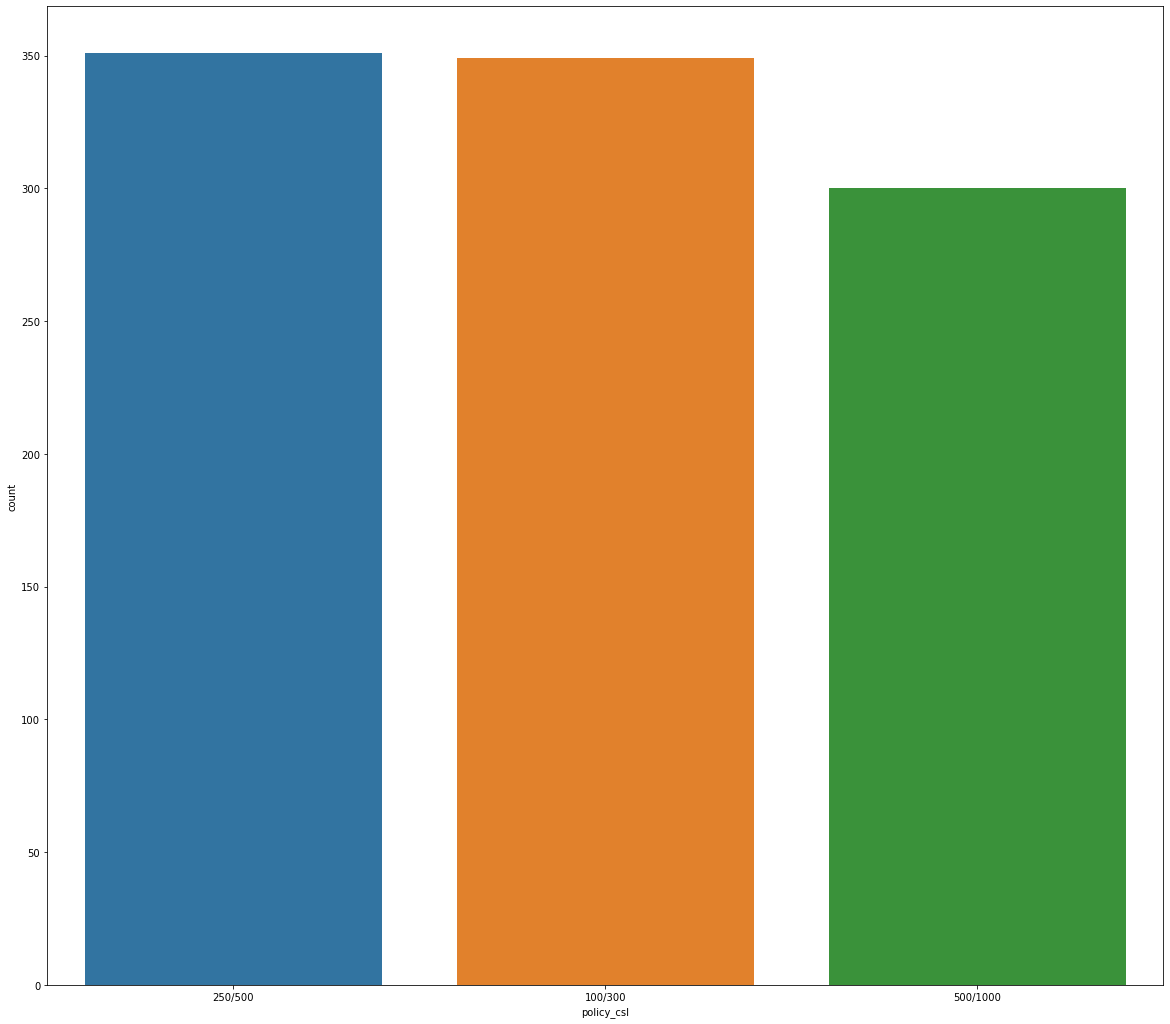

In [183]:
plt.figure(figsize=[20,18])
sns.countplot(df['policy_csl'])
print(df_cat['policy_csl'].value_counts())
plt.show()

Maximum people have taken 250/500 policy_csl

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


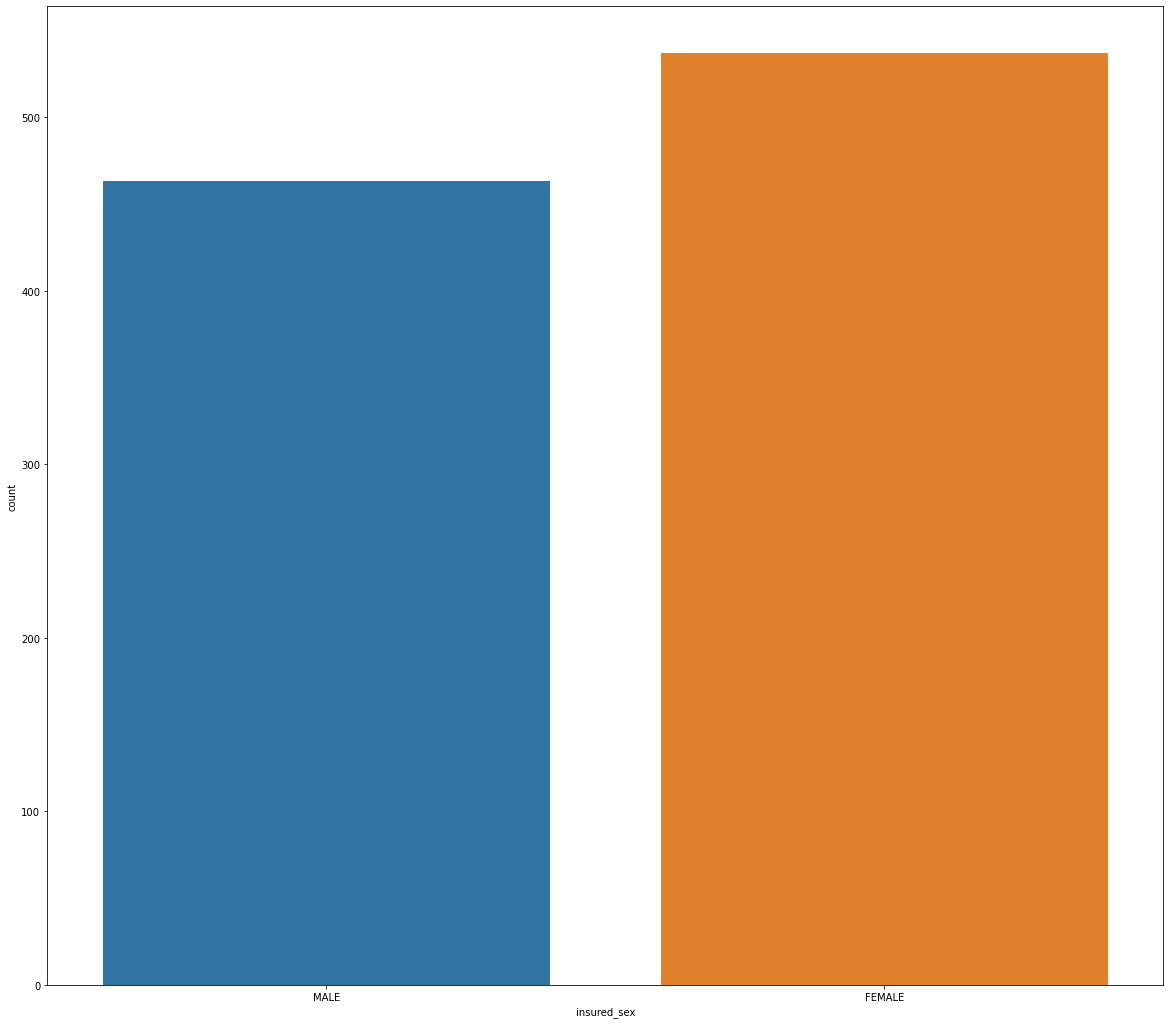

In [184]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['insured_sex'])
print(df_cat['insured_sex'].value_counts())

Maximum females are insured.

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


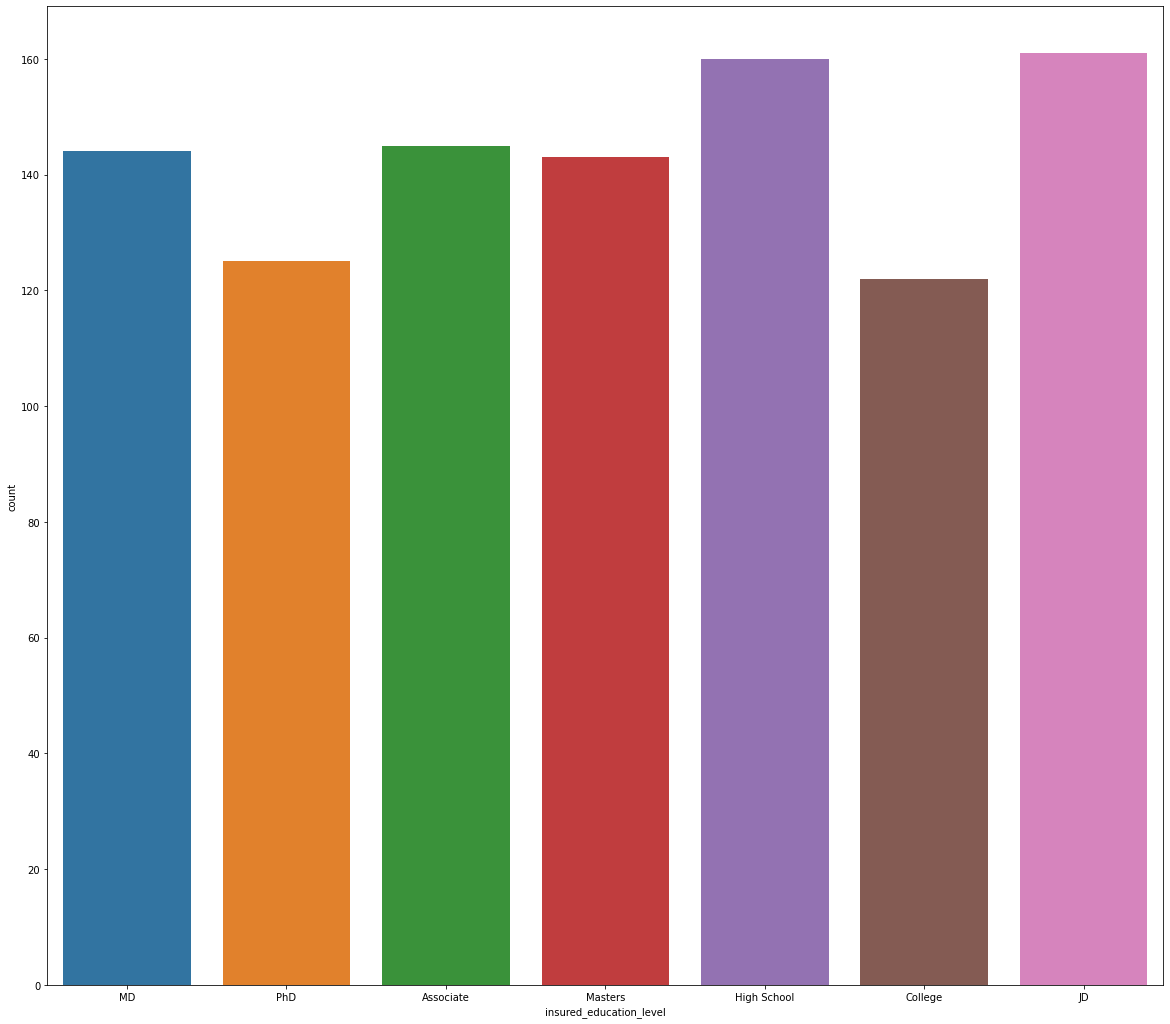

In [185]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['insured_education_level'])
print(df_cat['insured_education_level'].value_counts())

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


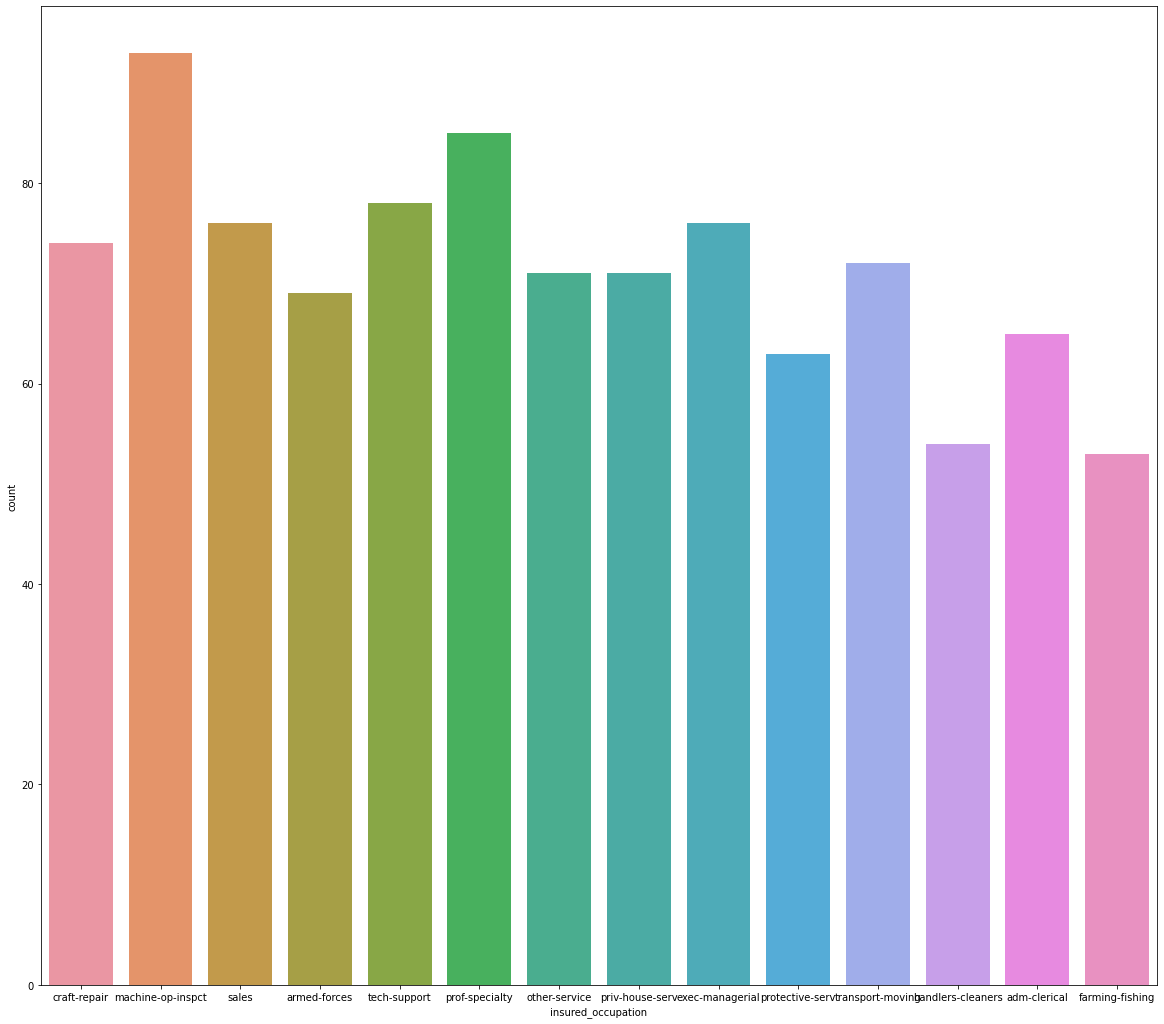

In [186]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['insured_occupation'])
print(df_cat['insured_occupation'].value_counts())

Maxiumum people who have opted for insurance having occupation of machine-op-inspct

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


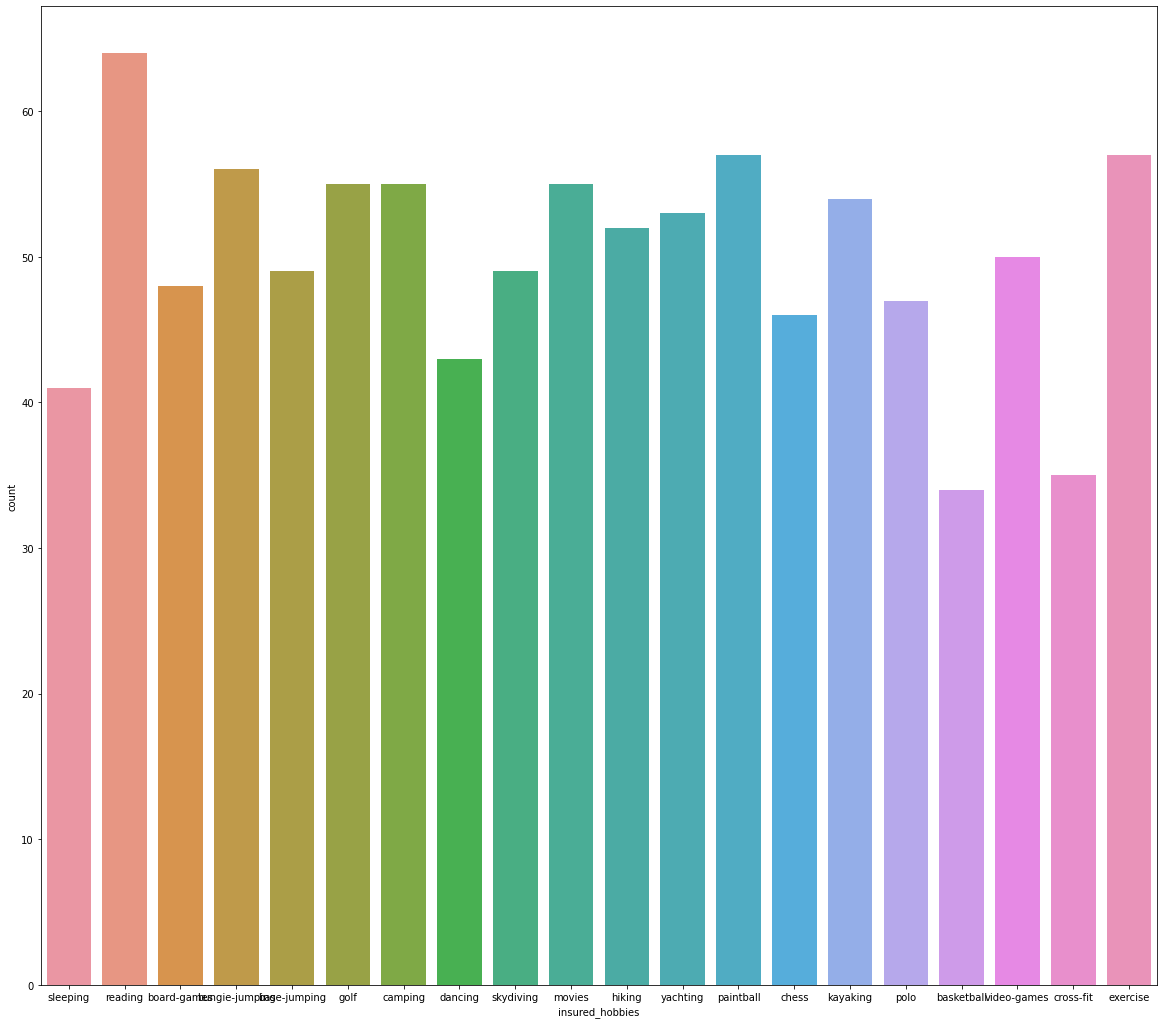

In [187]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['insured_hobbies'])
print(df_cat['insured_hobbies'].value_counts())

Maximum insured people have reading as their hobbies

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


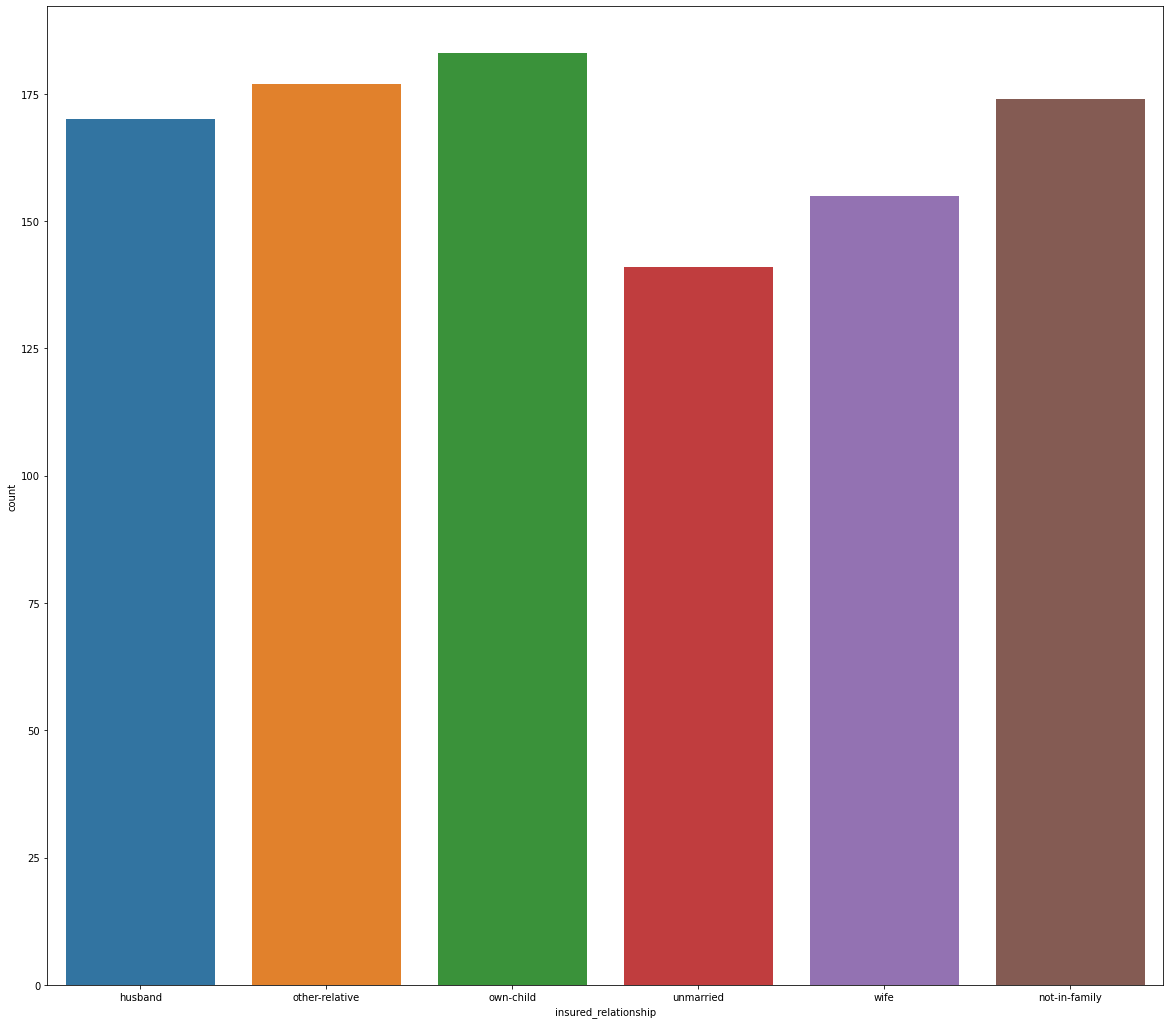

In [188]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['insured_relationship'])
print(df_cat['insured_relationship'].value_counts())

Maximum number of people have taken insurance for their child.

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


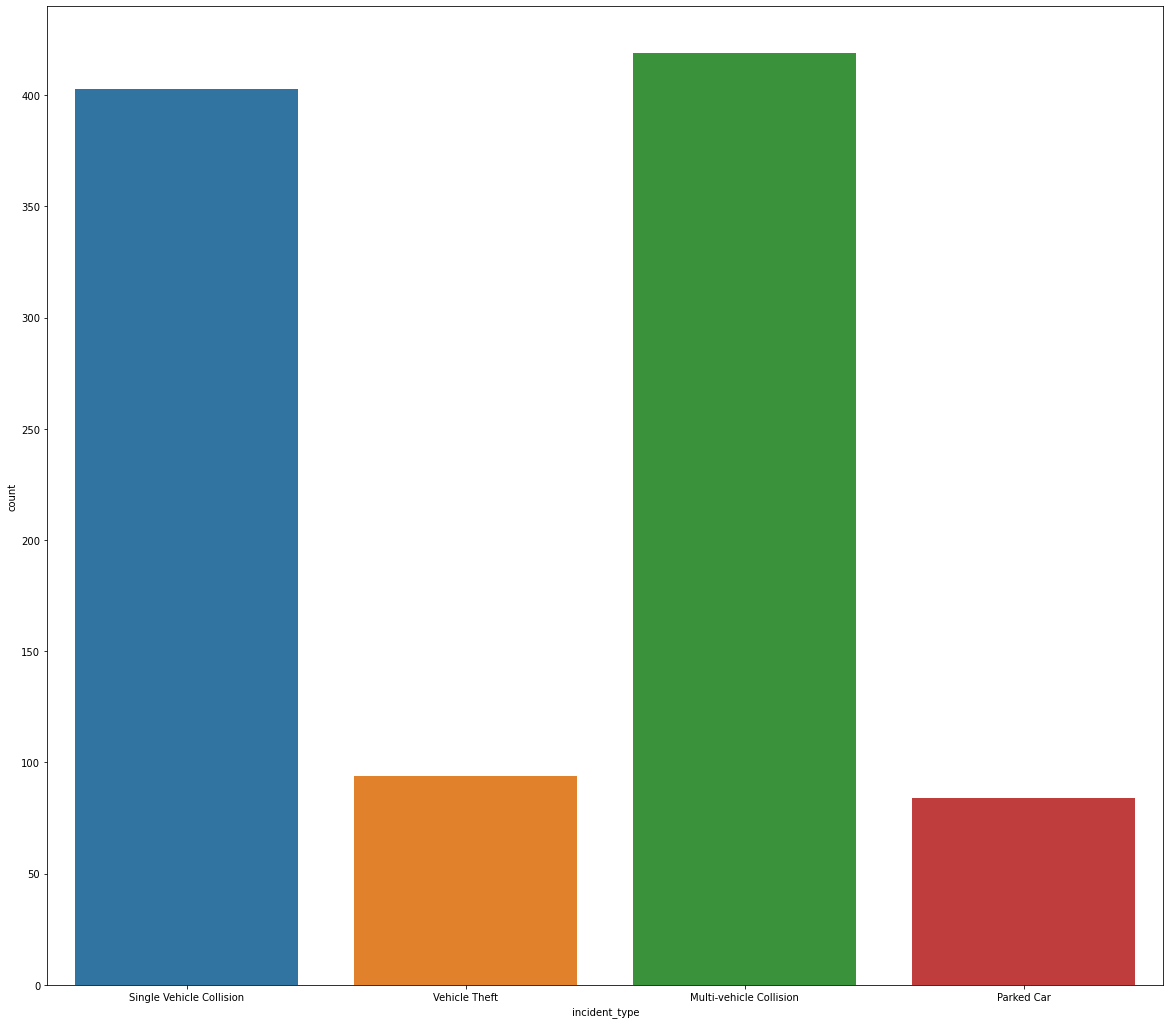

In [189]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['incident_type'])
print(df_cat['incident_type'].value_counts())

Maximum incidents are related to Multi-Vehicle Collision.

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


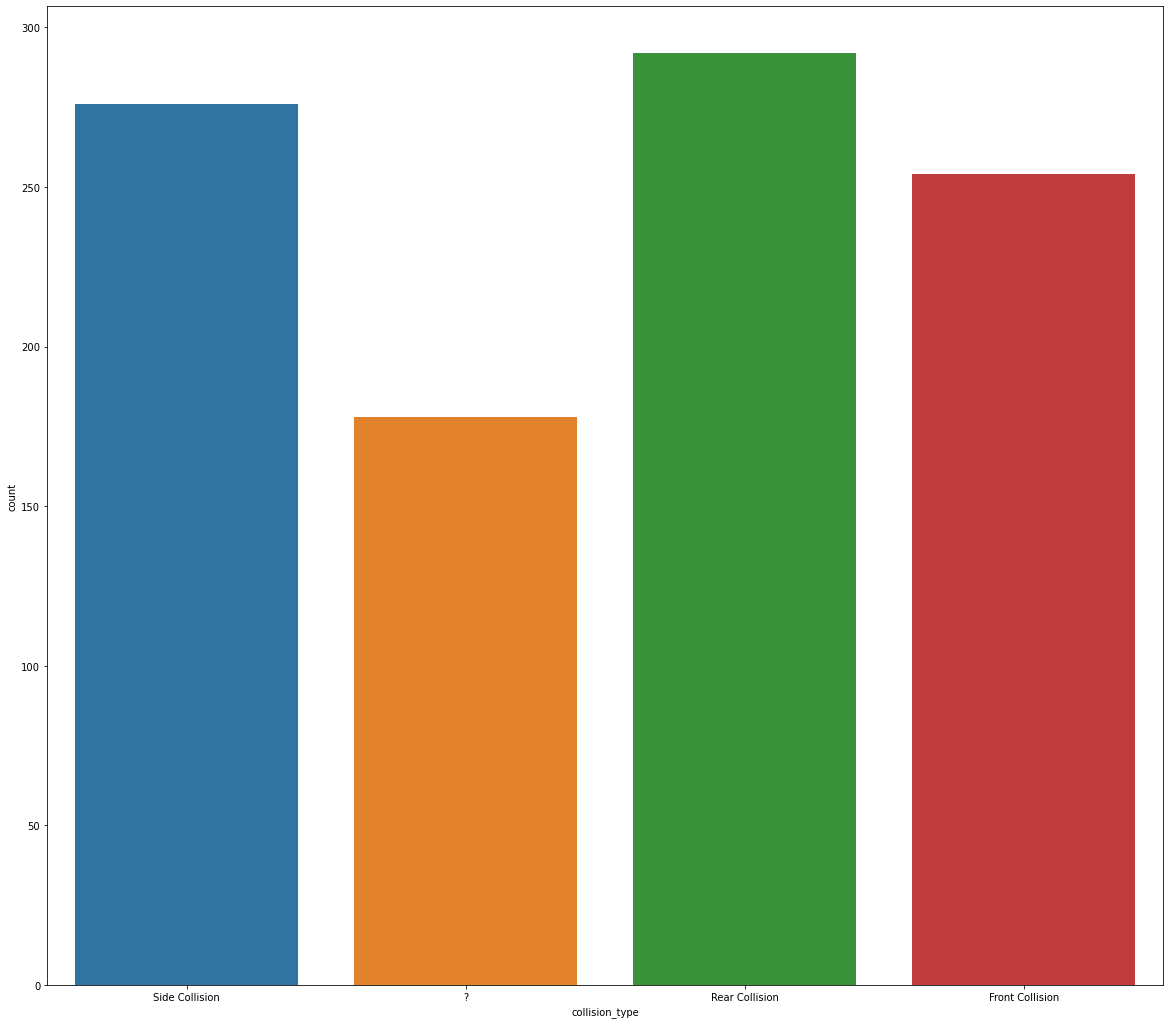

In [190]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['collision_type'])
print(df_cat['collision_type'].value_counts())

MAximum times collision is done from the rear side. we have '?' in the data. so we have to deal with it

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


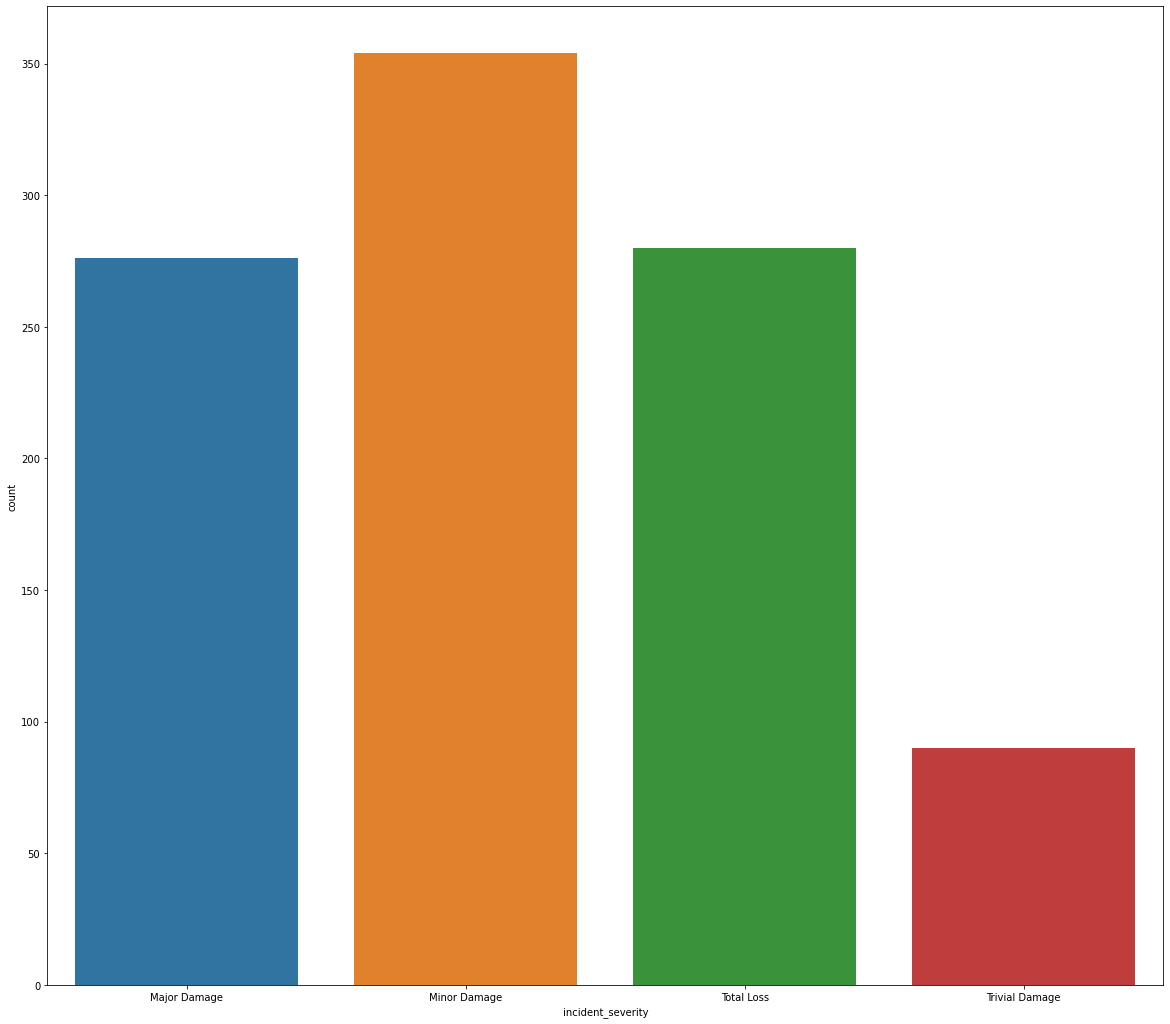

In [191]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['incident_severity'])
print(df_cat['incident_severity'].value_counts())

Maximum times, insurance is claimed for Minor damage.

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


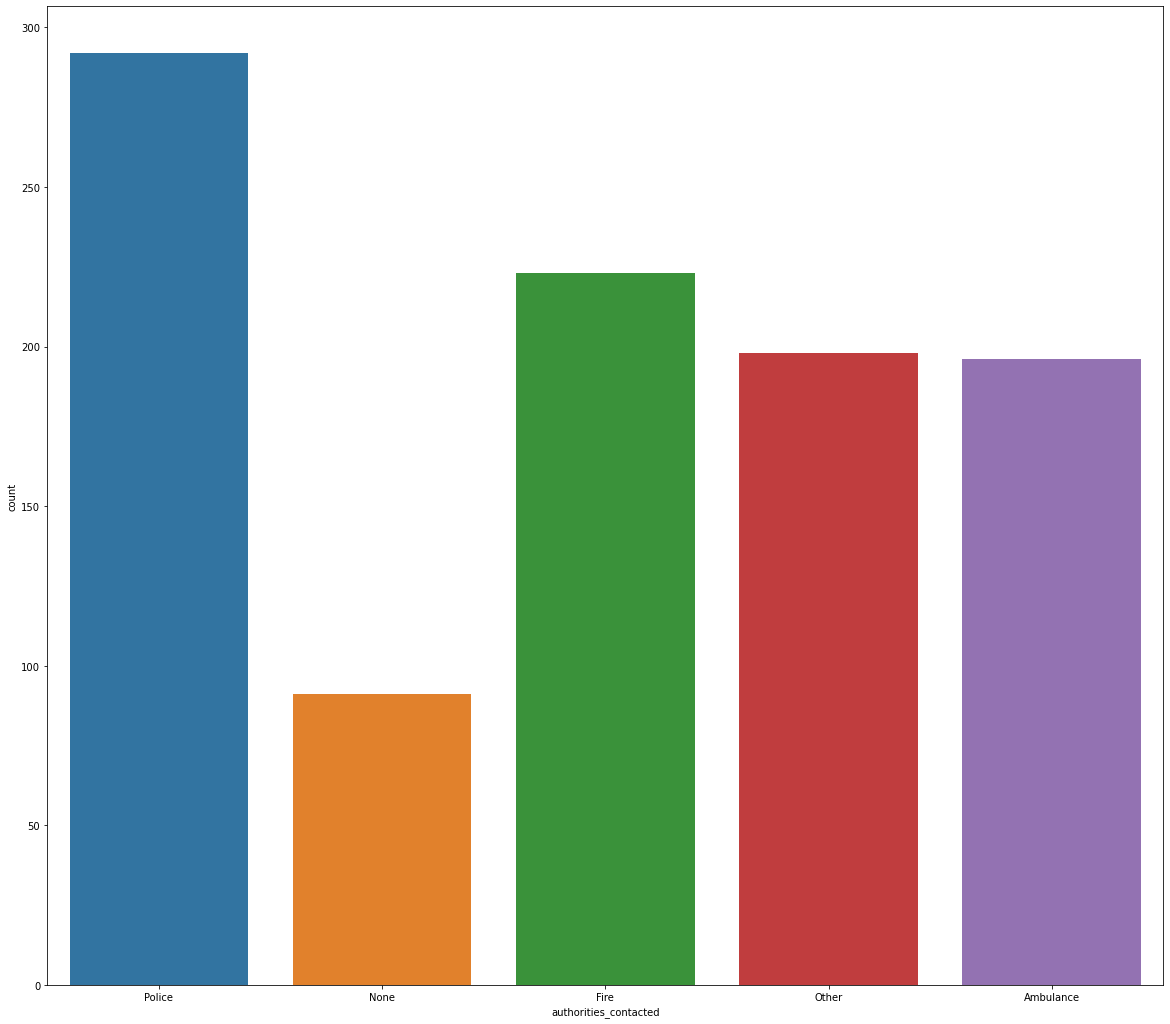

In [192]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['authorities_contacted'])
print(df_cat['authorities_contacted'].value_counts())

Maximum number of times, police has been contacted when incident occurs.

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


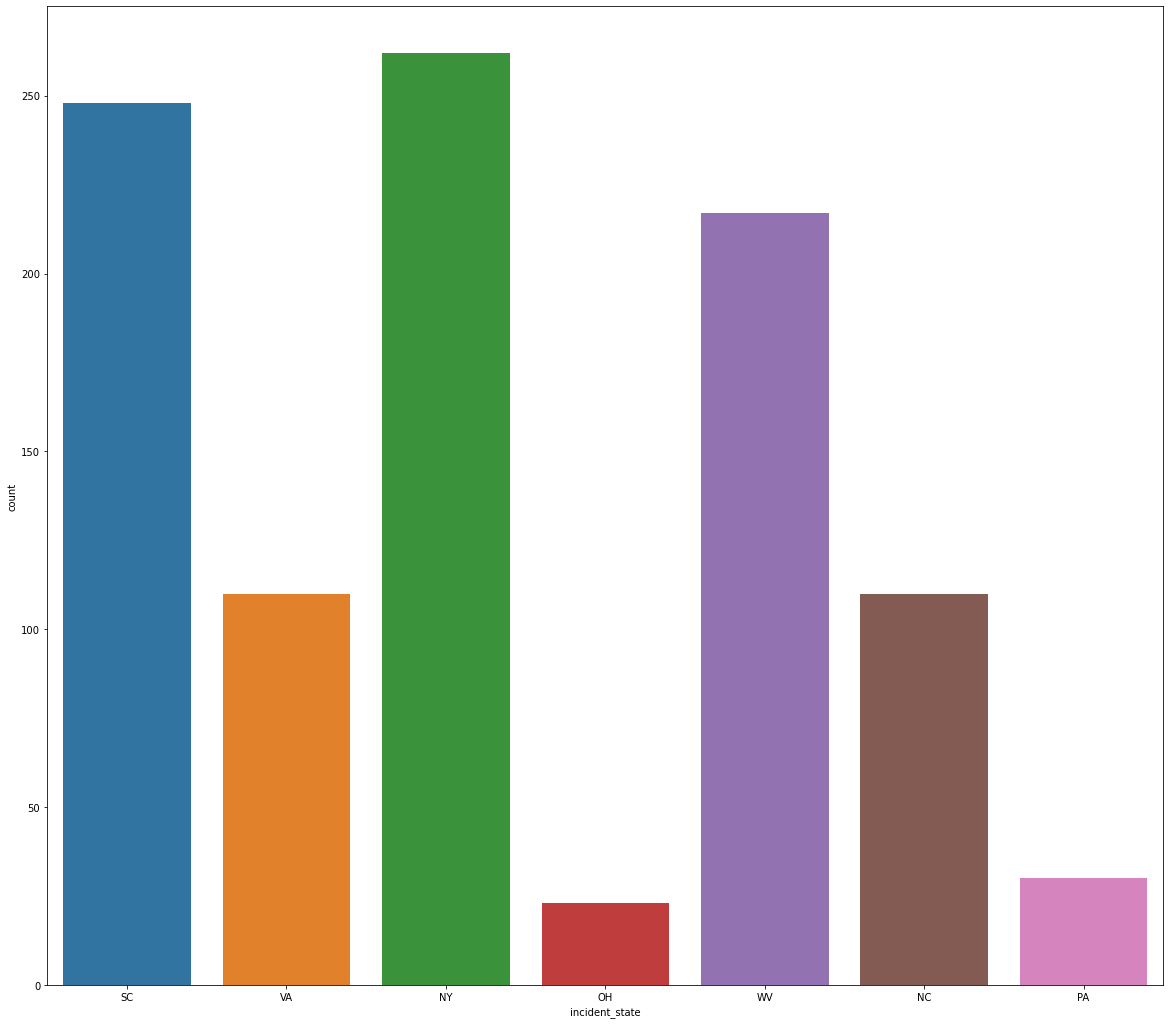

In [193]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['incident_state'])
print(df_cat['incident_state'].value_counts())

Maximum incidents have taken place in New York.

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


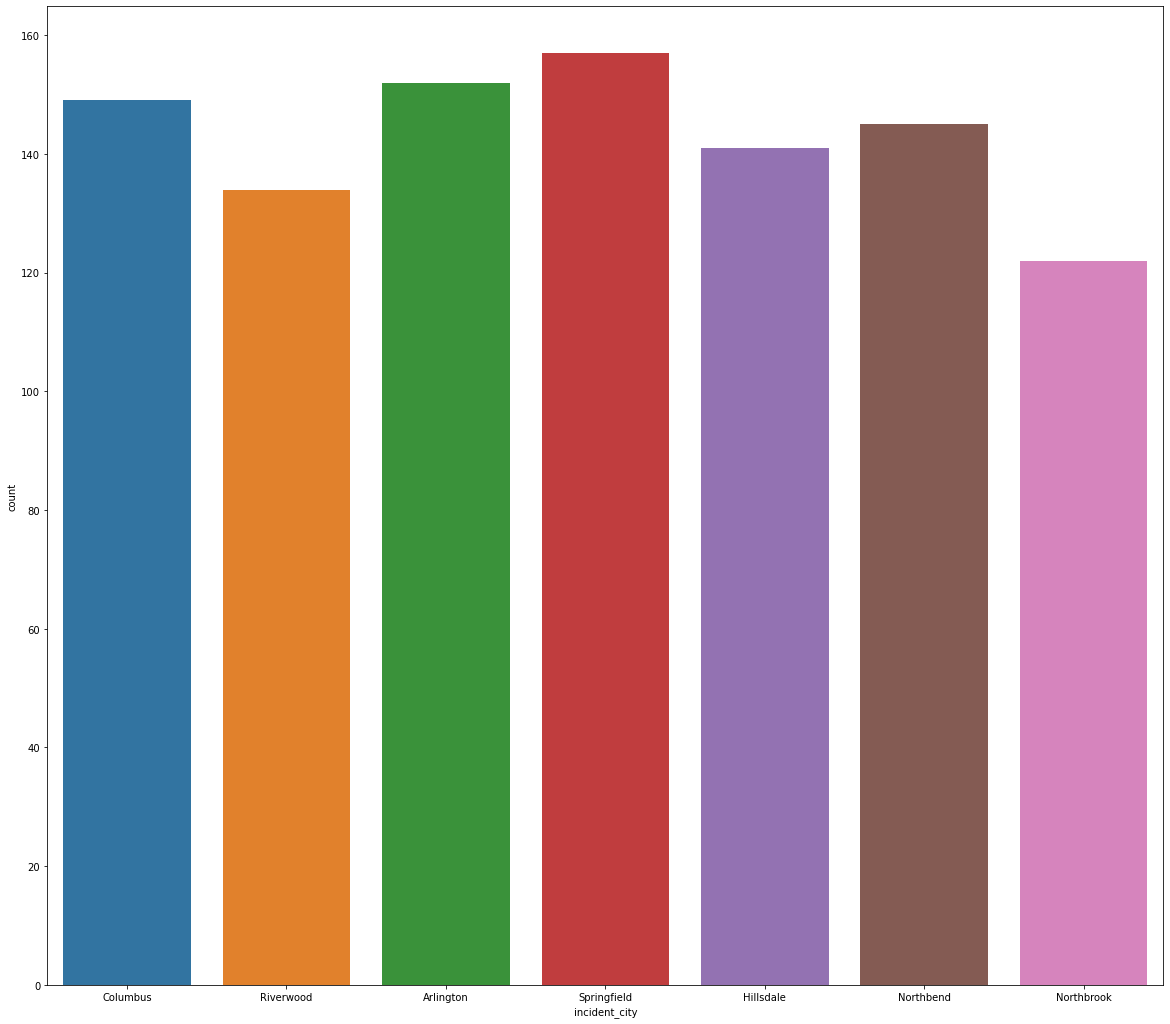

In [194]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['incident_city'])
print(df_cat['incident_city'].value_counts())

Maximum incidents have taken place in Springfield city

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


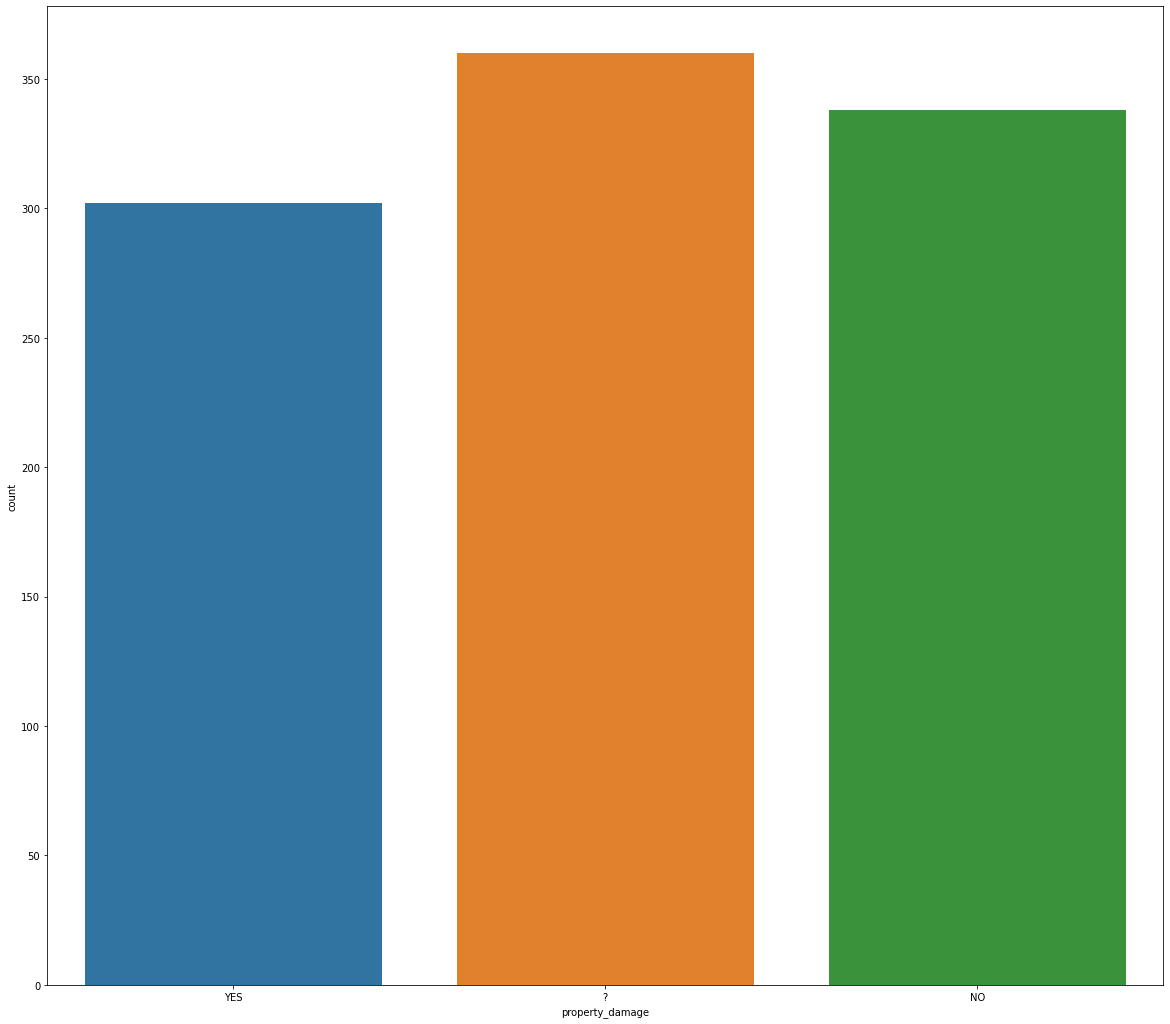

In [195]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['property_damage'])
print(df_cat['property_damage'].value_counts())

We have 360 '?' in the data. we need to treat this variable.

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


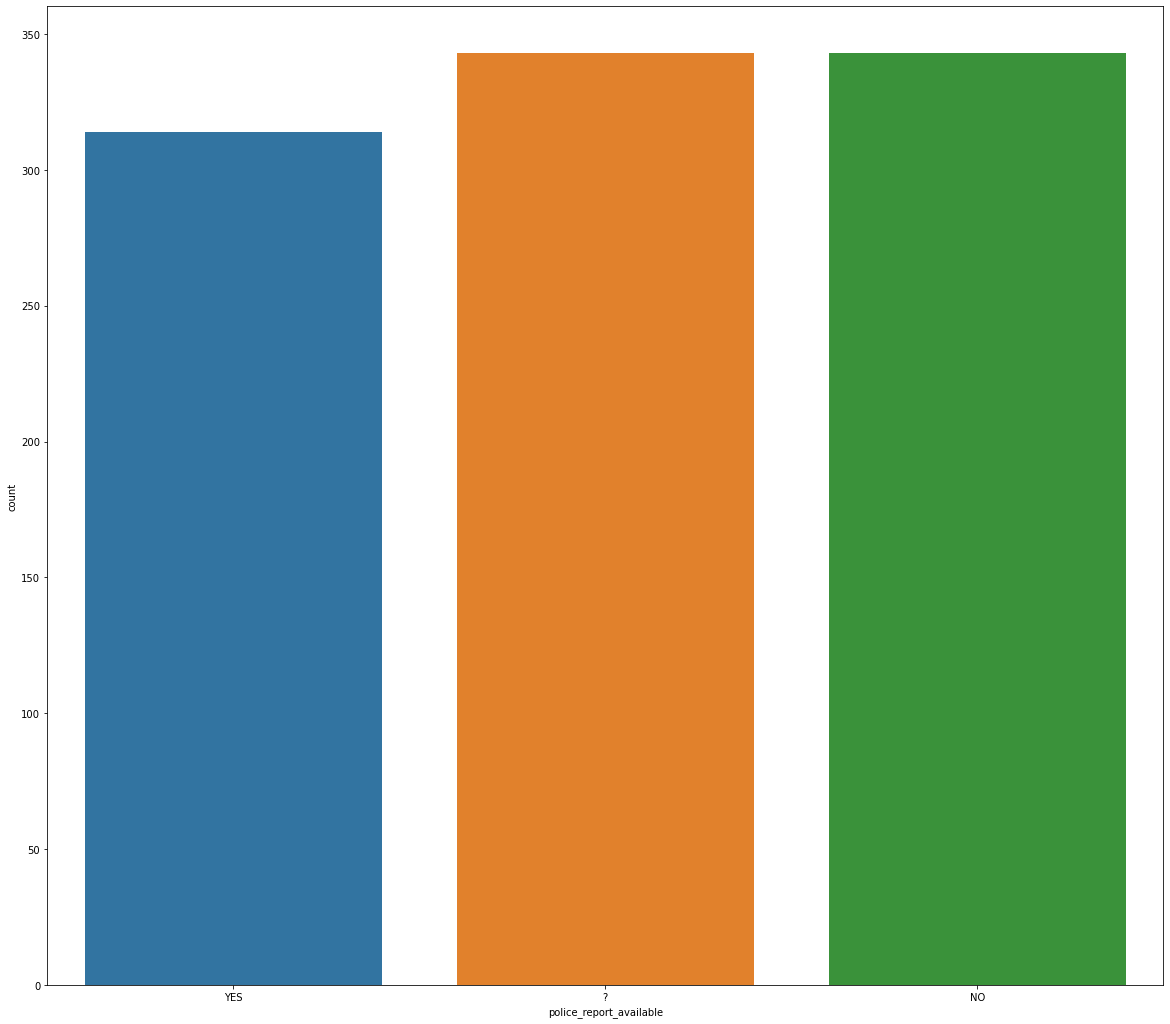

In [196]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['police_report_available'])
print(df_cat['police_report_available'].value_counts())

In this variable also, we can see the data with '?'. We need to treat this type of data.

Suburu        80
Dodge         80
Saab          80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


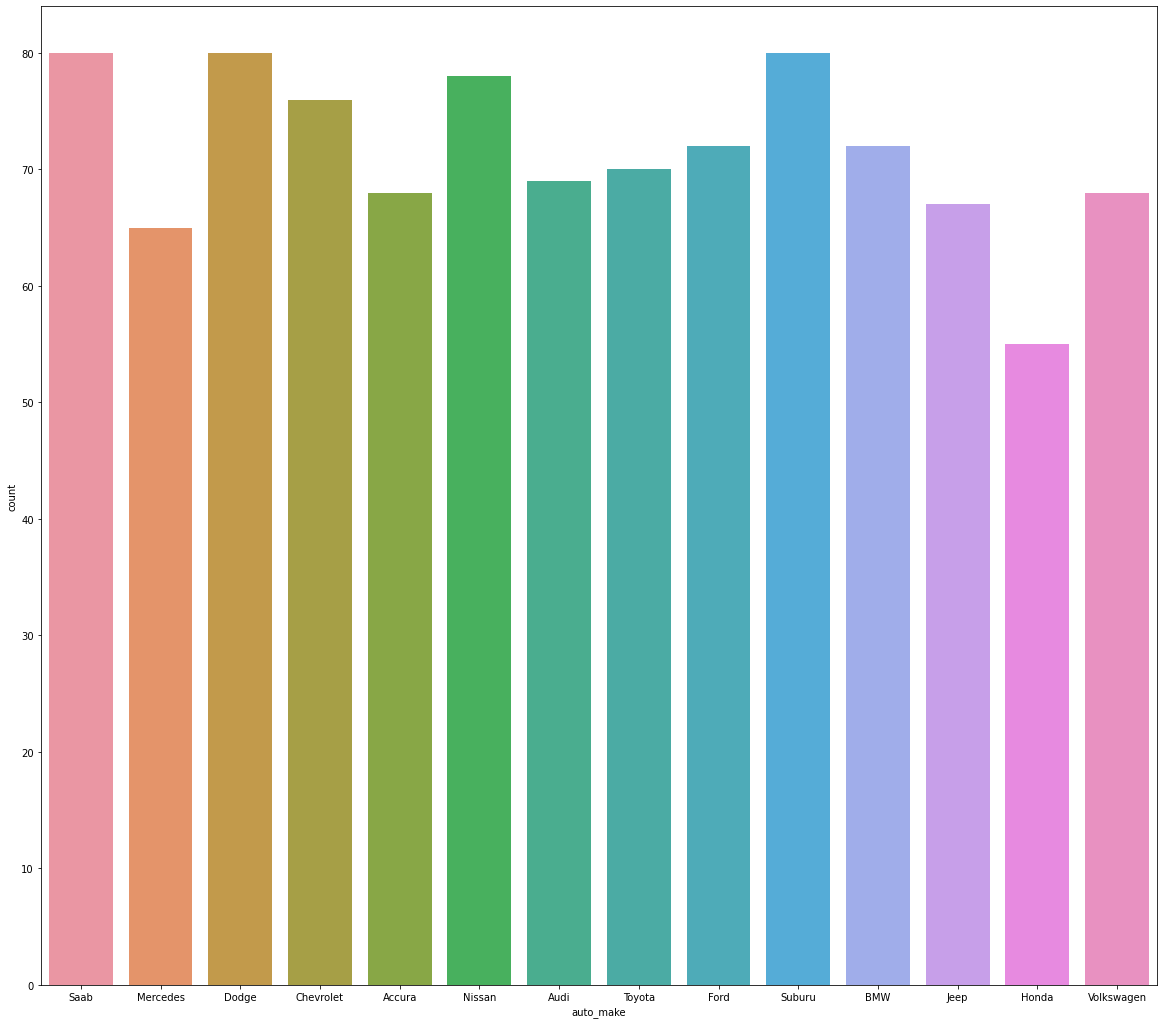

In [197]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['auto_make'])
print(df_cat['auto_make'].value_counts())

Maximum incidents have been reported on Saab,Dodge and Suburu.

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Forrestor         28
92x               28
Camry             28
E400              27
95                27
F150              27
93                25
Grand Cherokee    25
Tahoe             24
Maxima            24
Escape            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
TL                20
ML350             20
Impreza           20
Corolla           20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


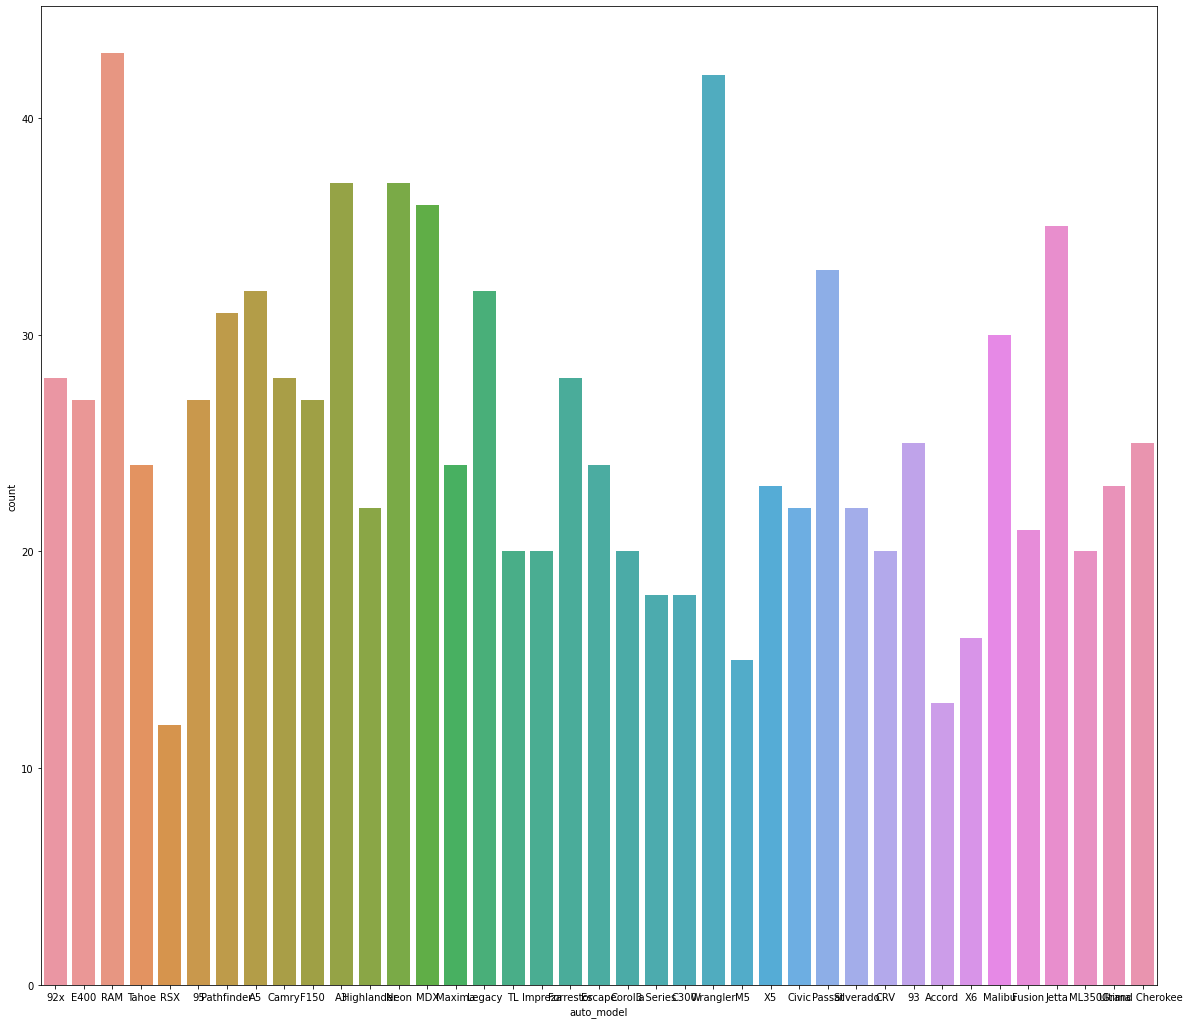

In [198]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['auto_model'])
print(df_cat['auto_model'].value_counts())

Maximum incidents have taken place in RAM.

N    753
Y    247
Name: fraud_reported, dtype: int64


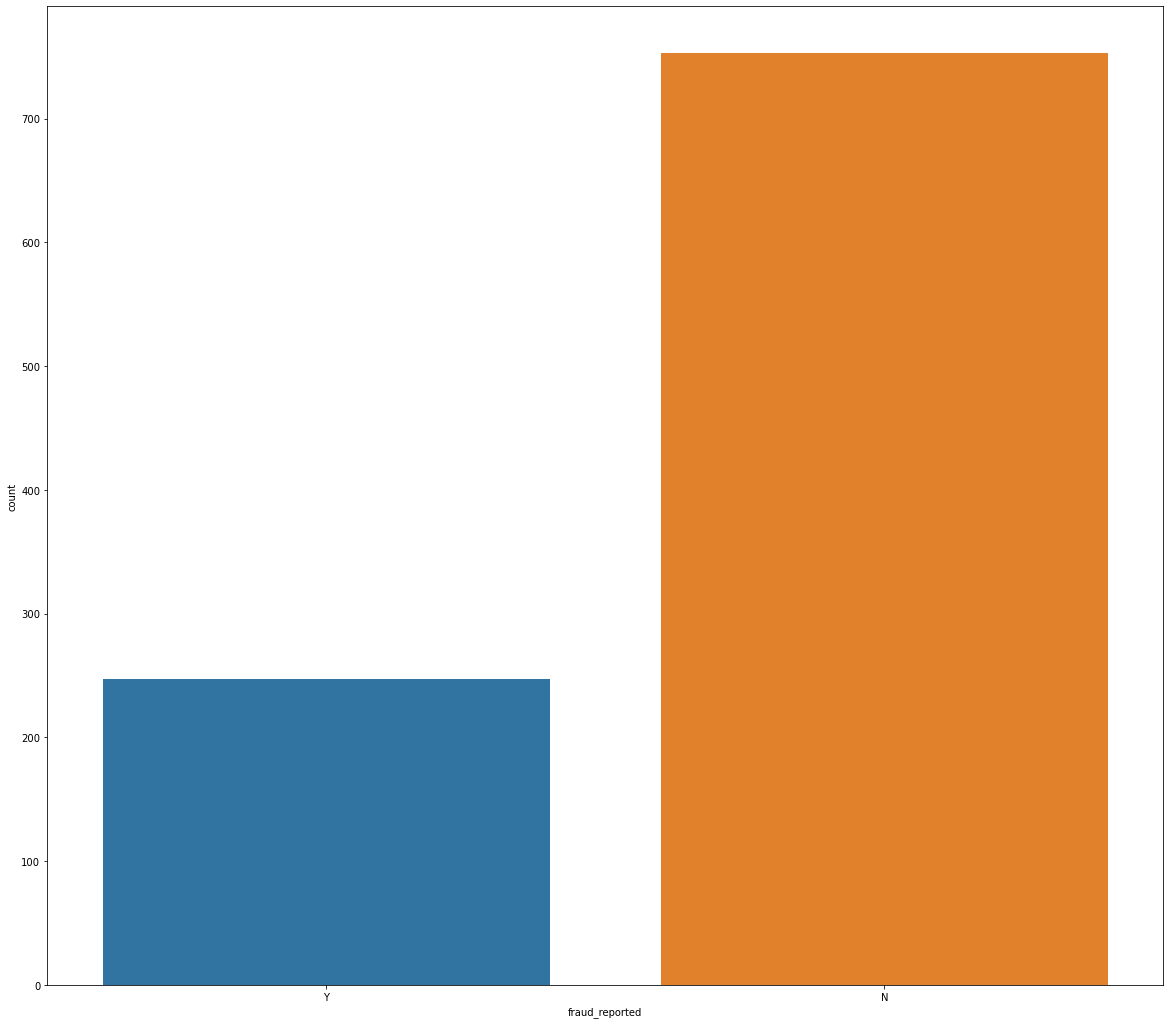

In [199]:
plt.figure(figsize=[20,18])
sns.countplot(df_cat['fraud_reported'])
print(df_cat['fraud_reported'].value_counts())

743 fruads are not reported and 247 frauds are reported.

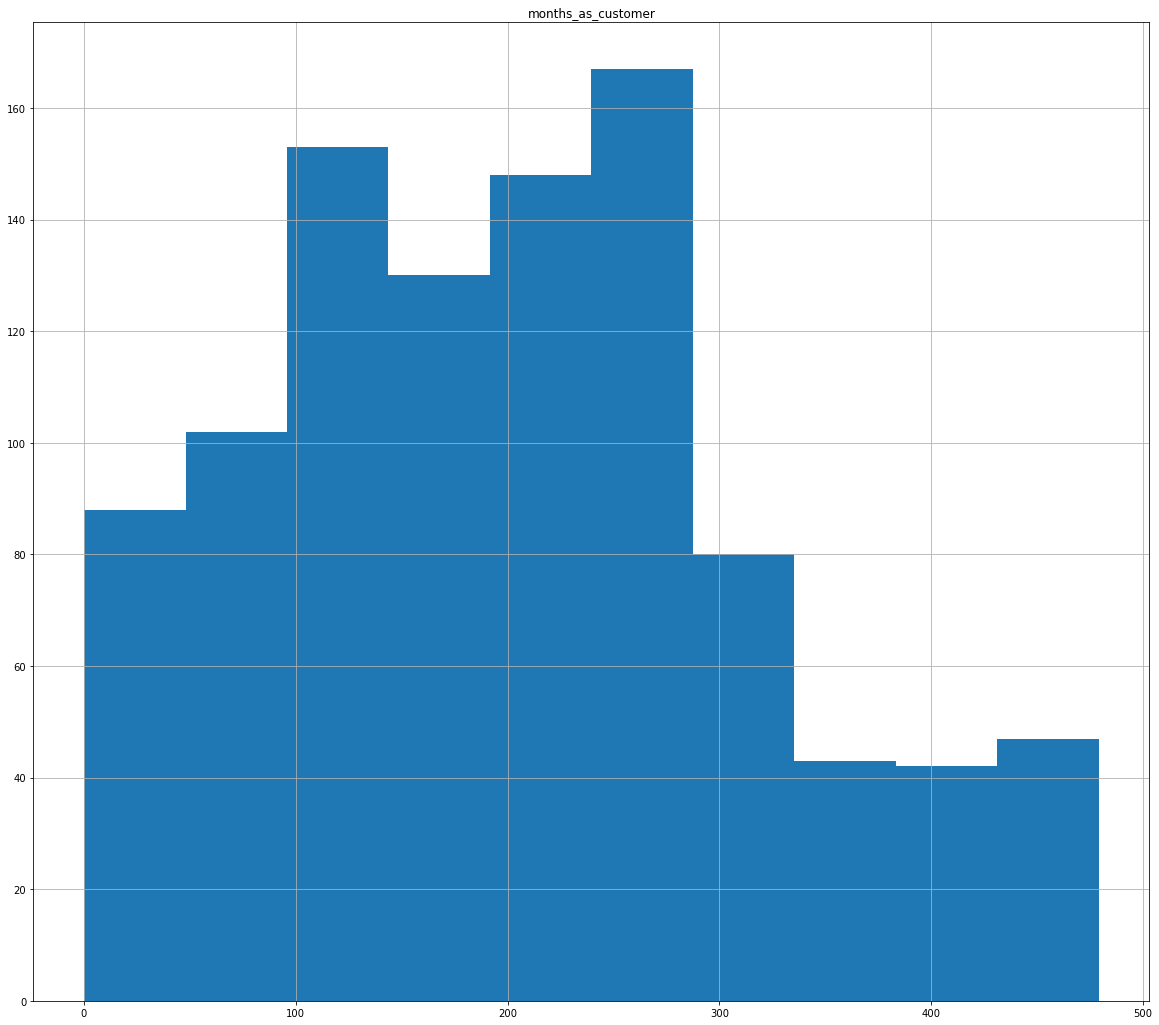

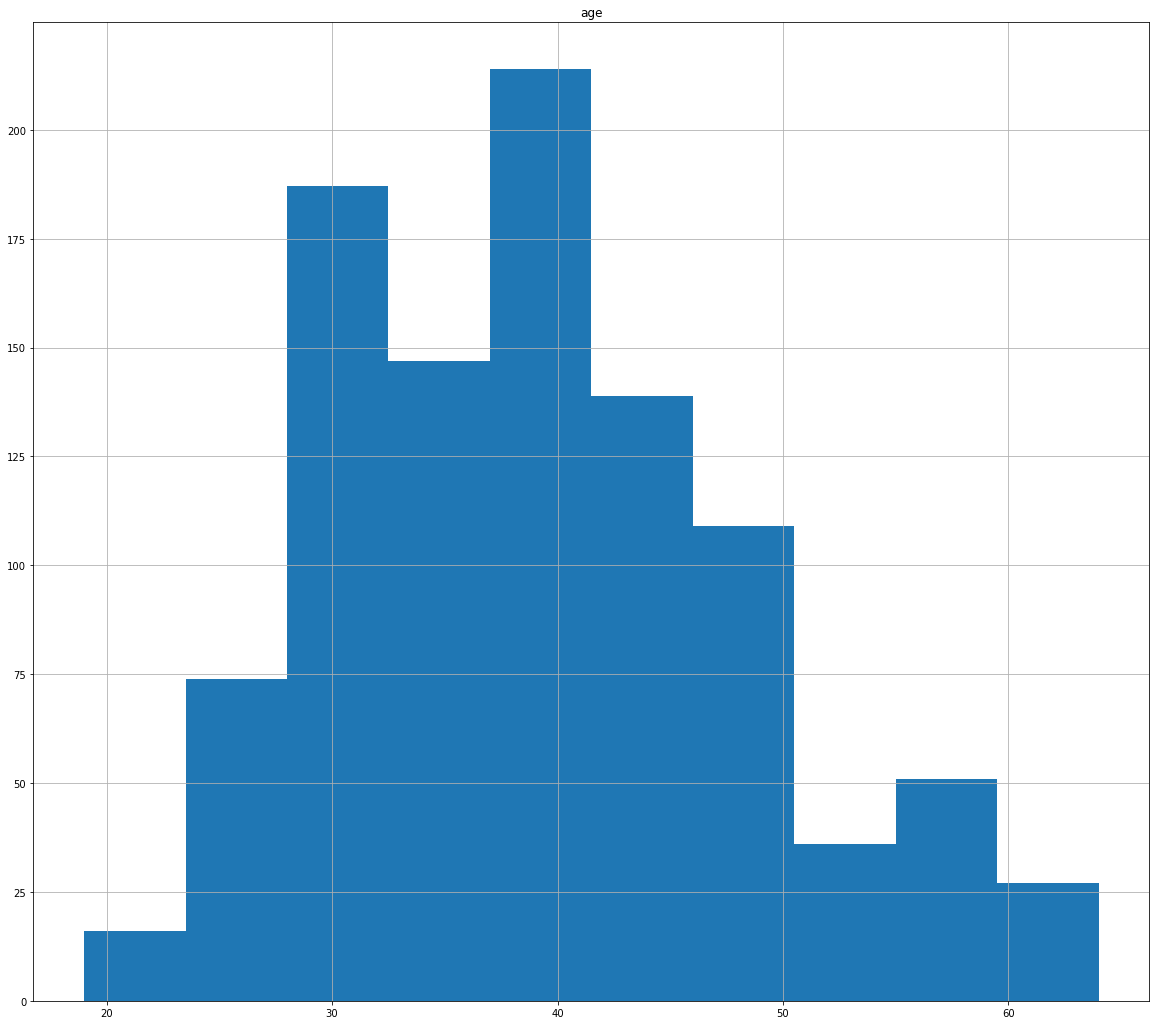

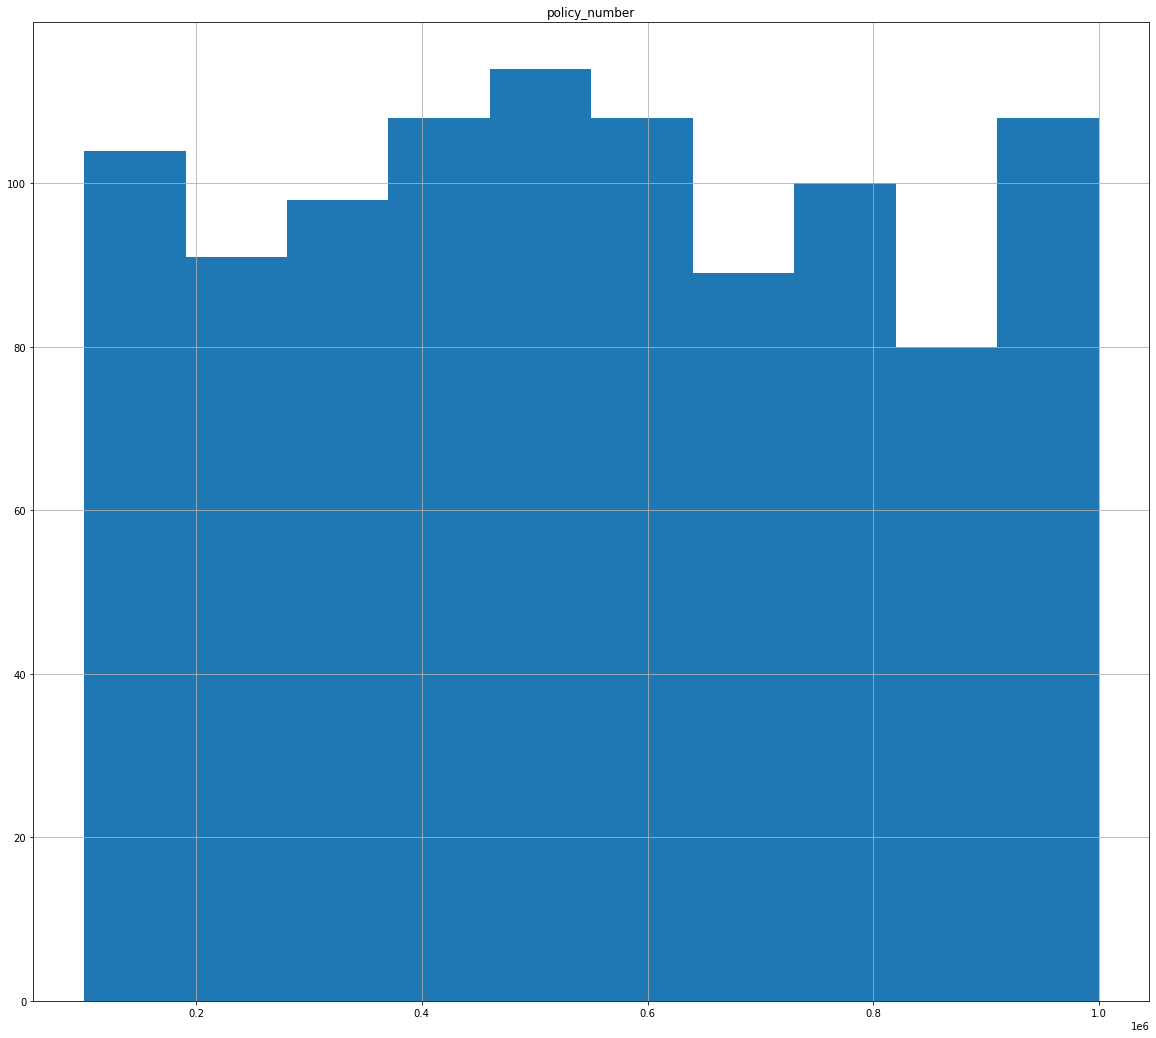

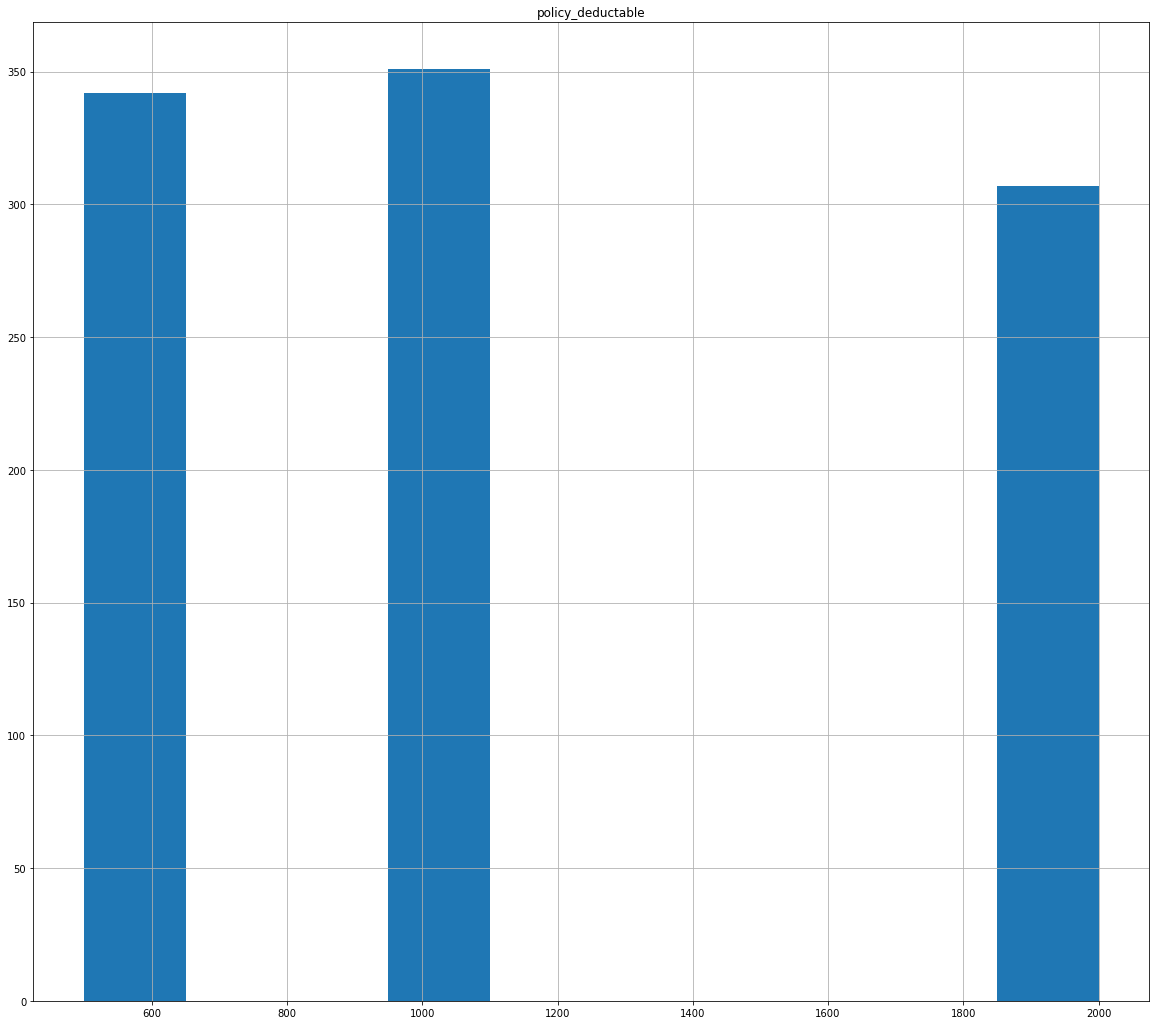

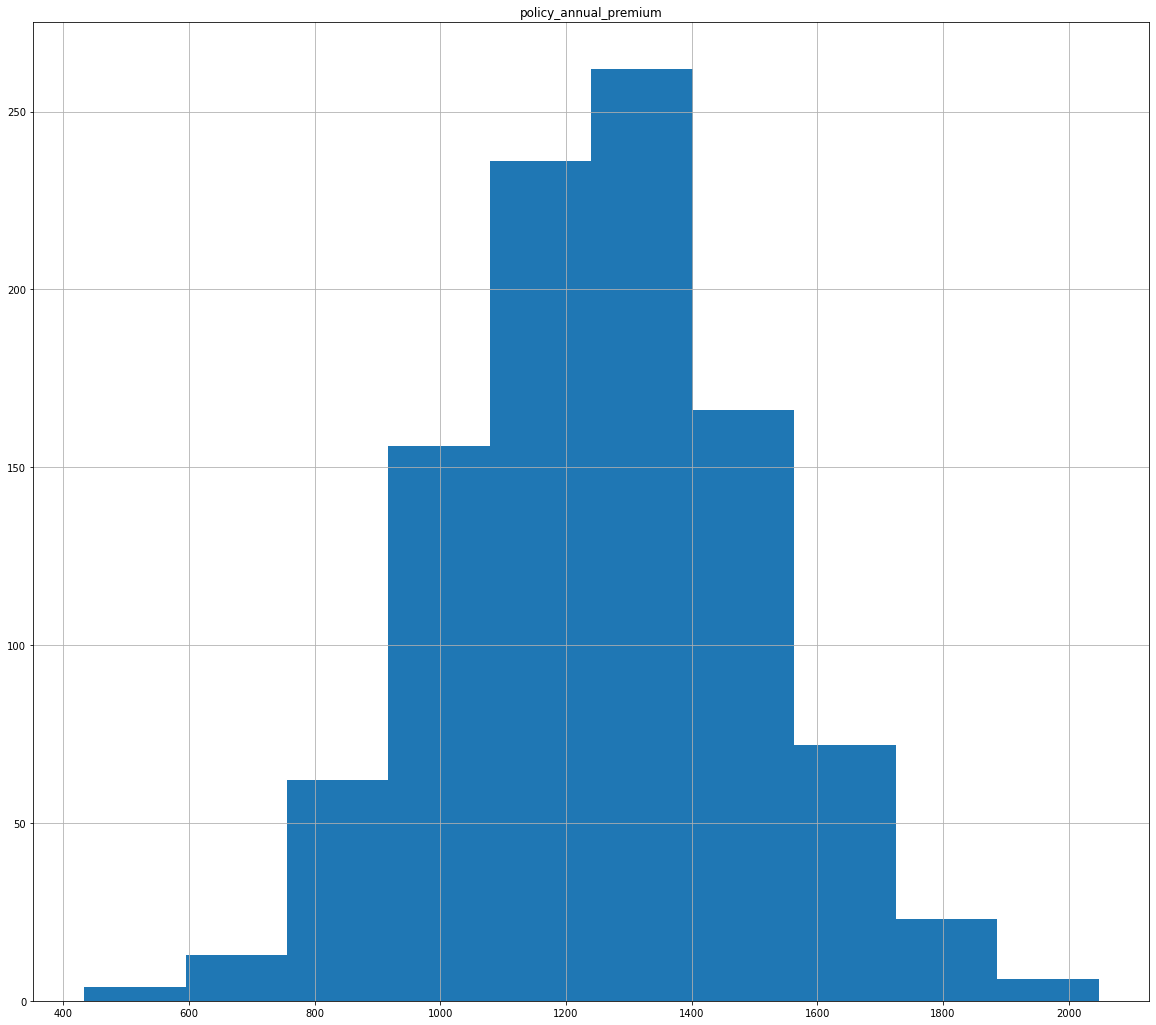

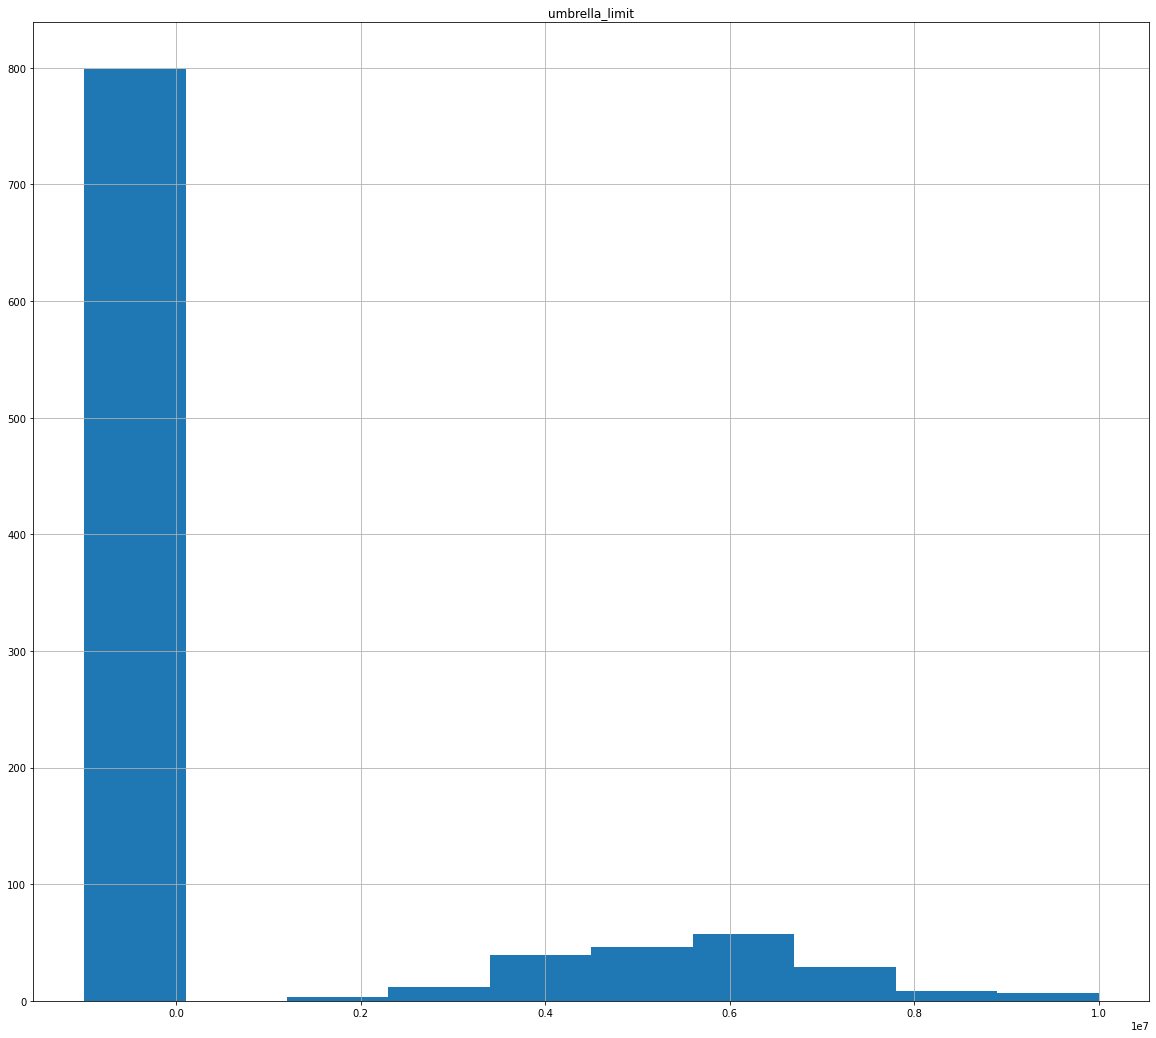

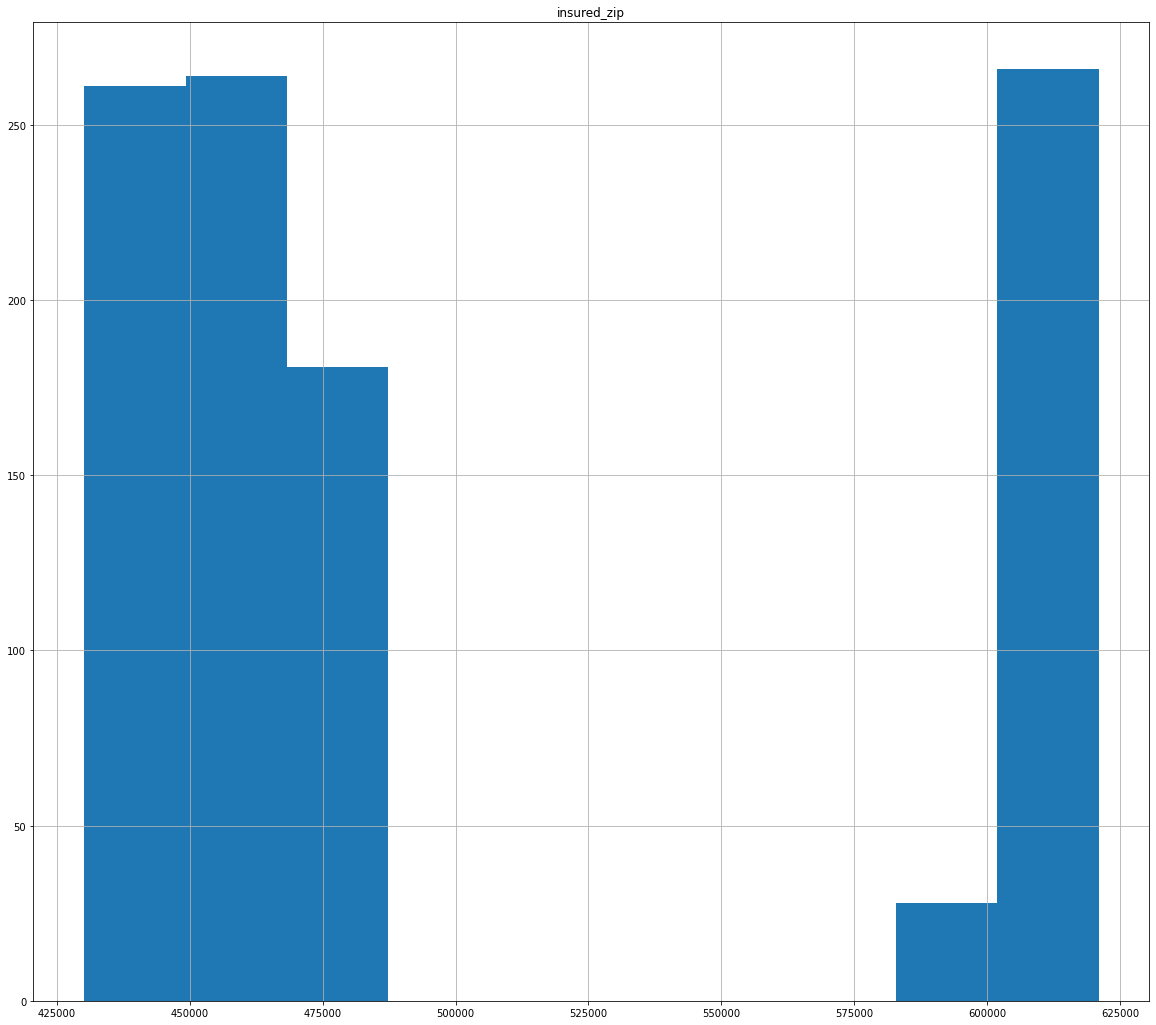

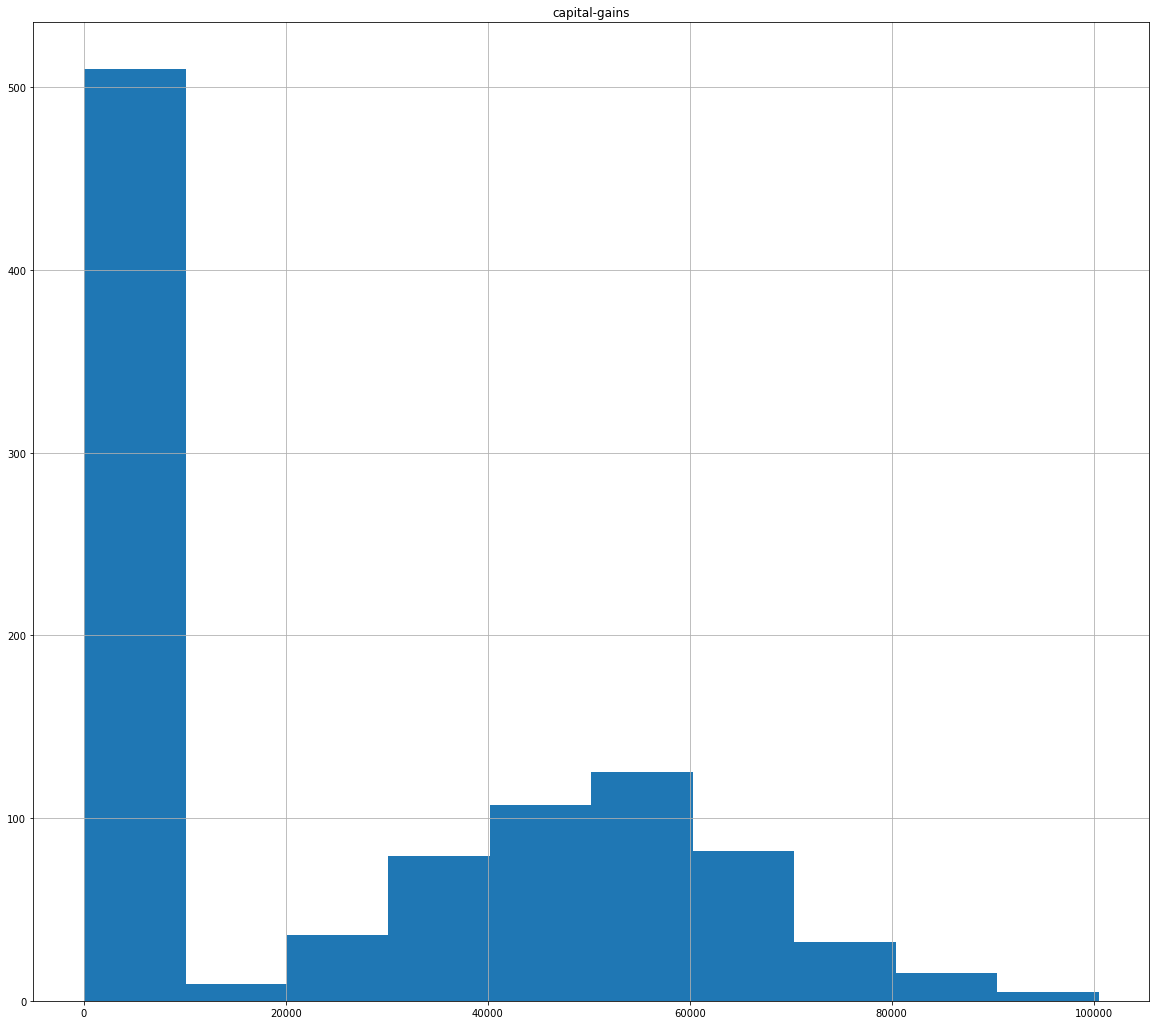

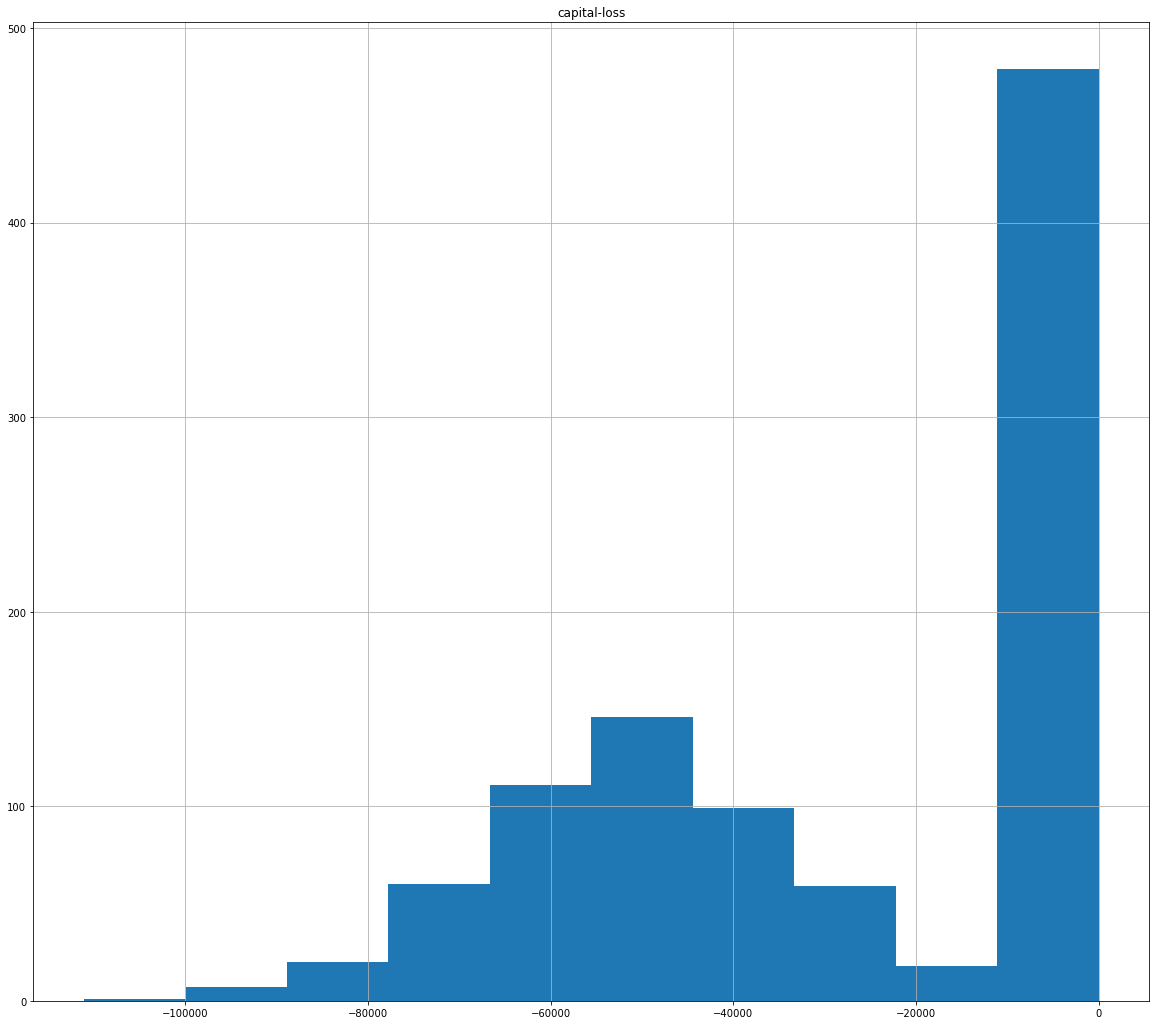

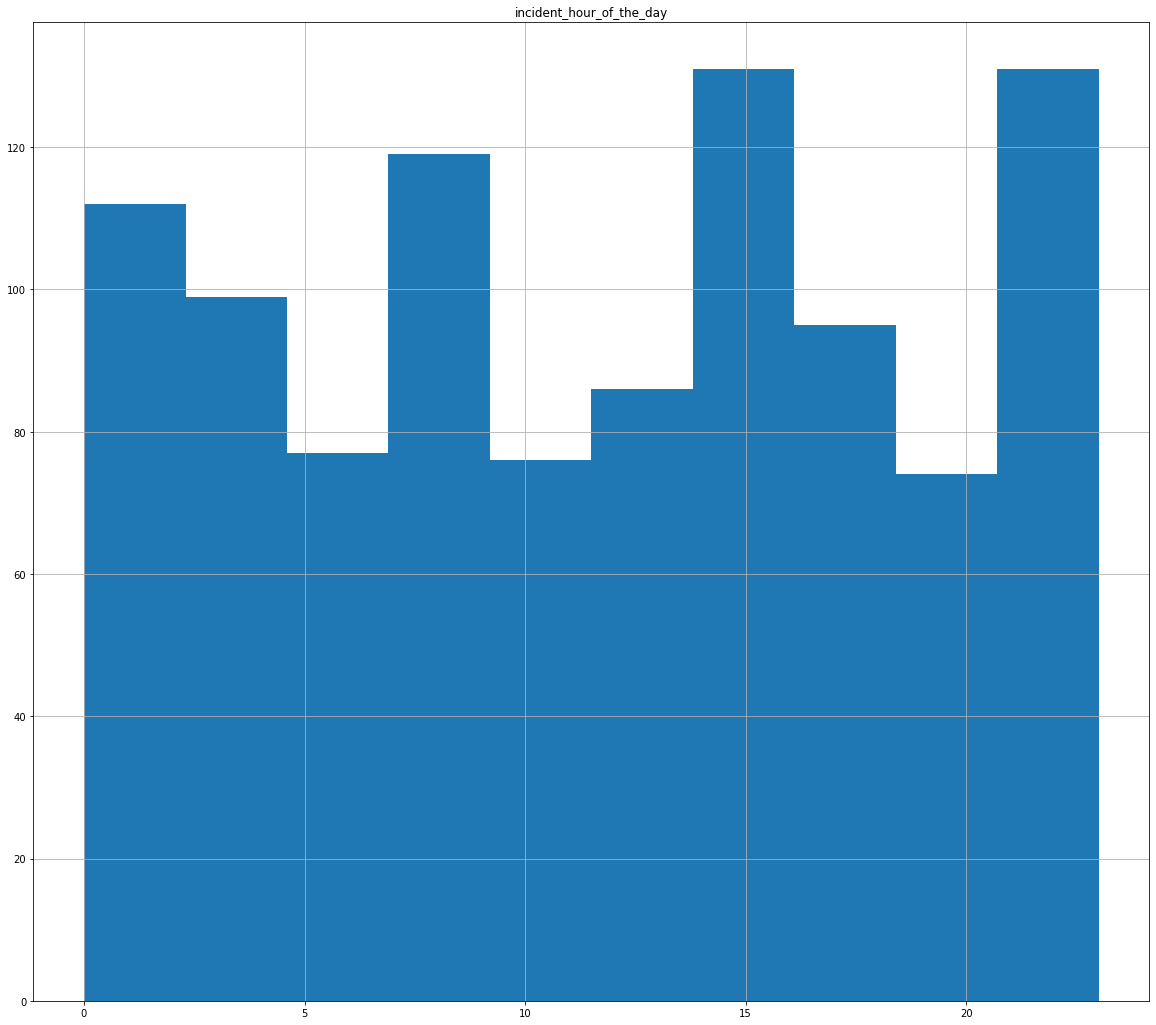

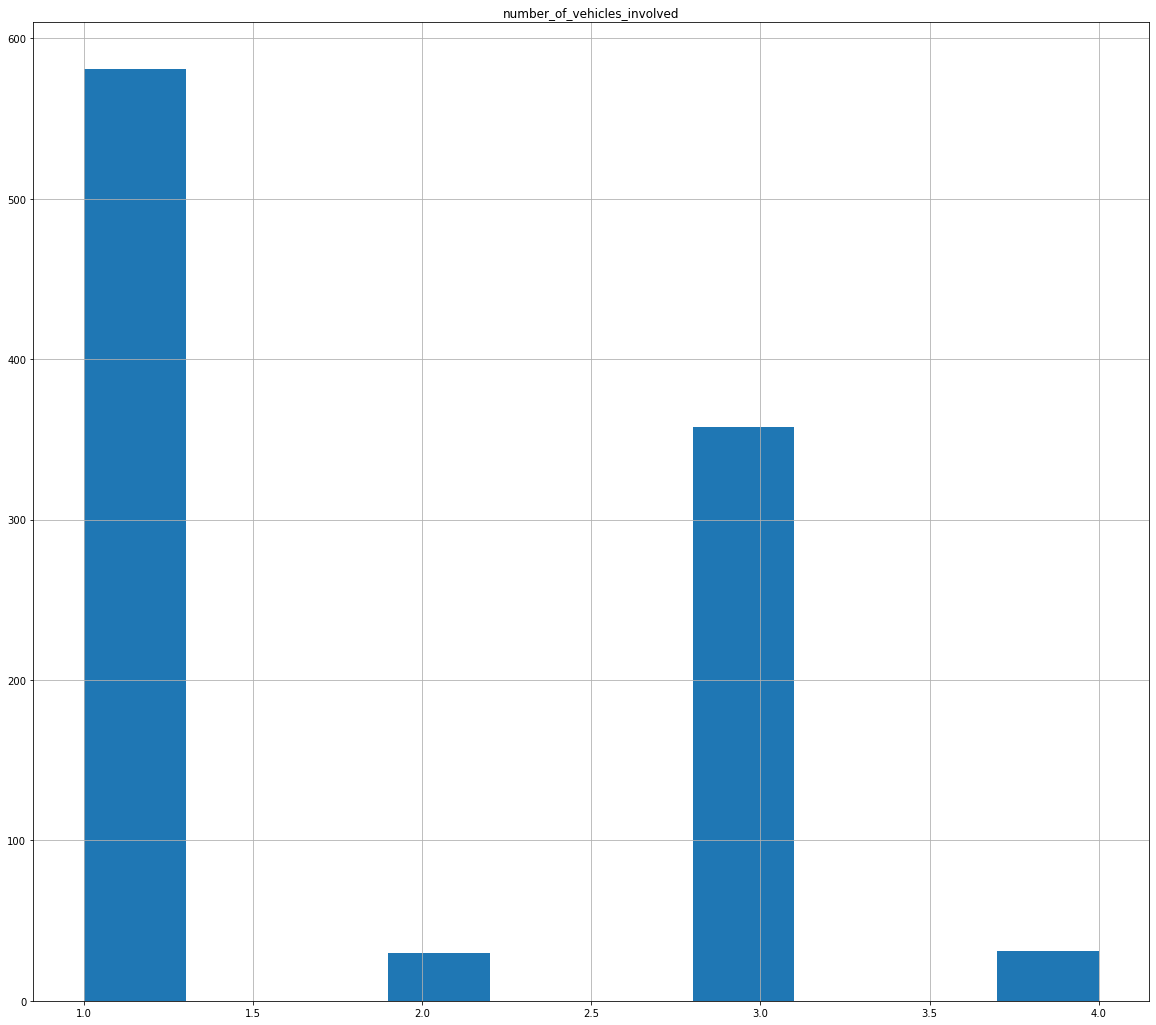

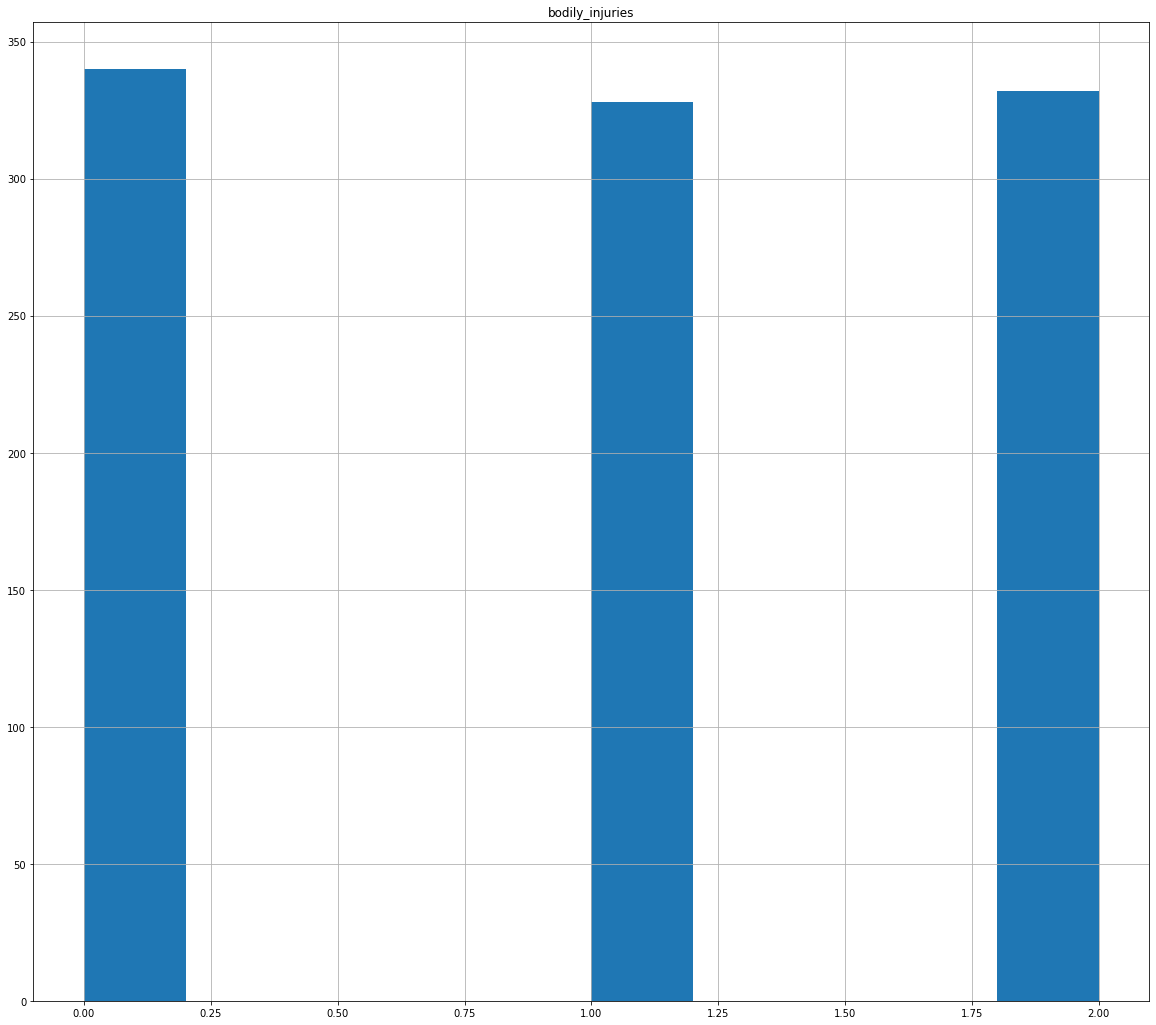

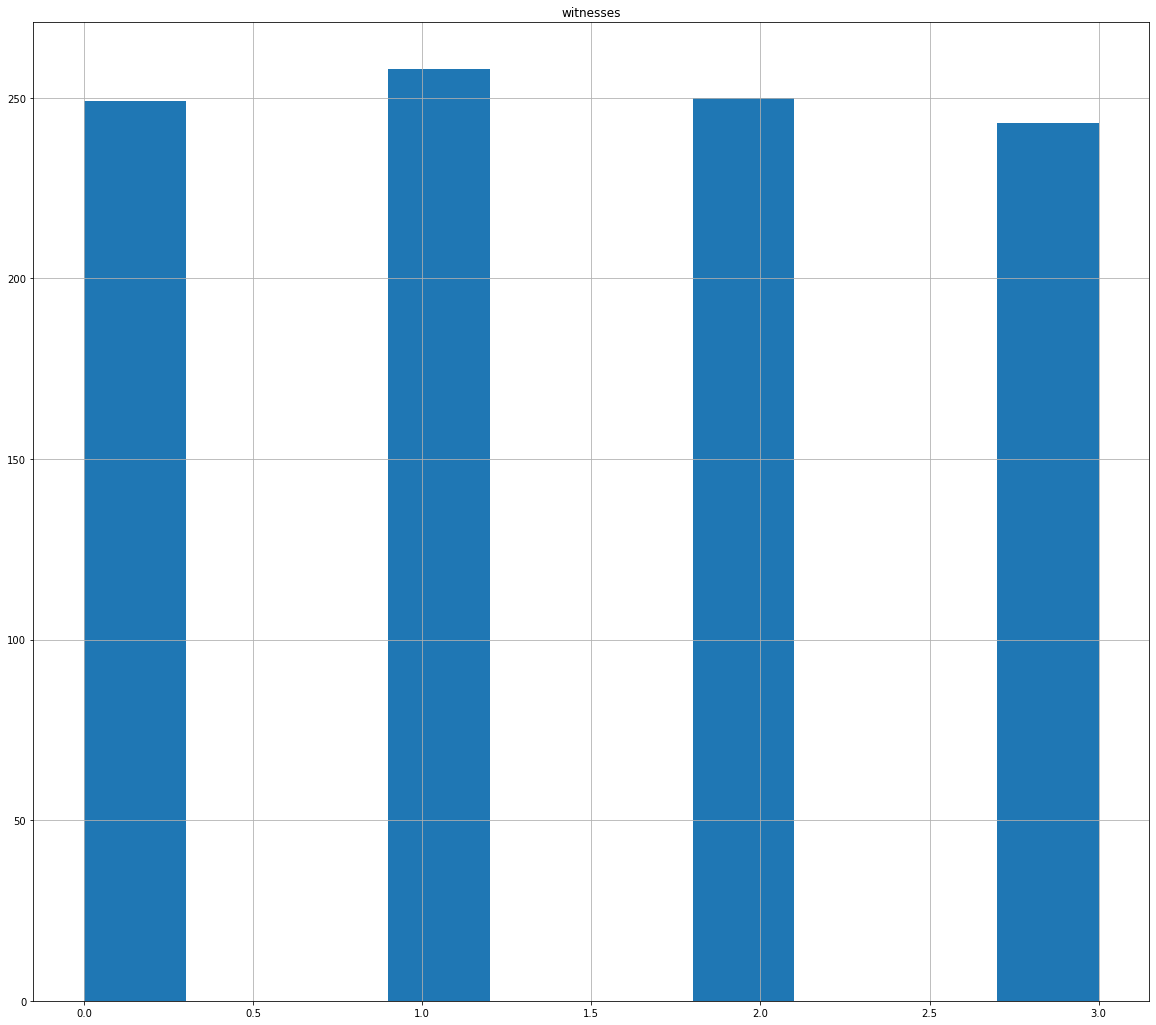

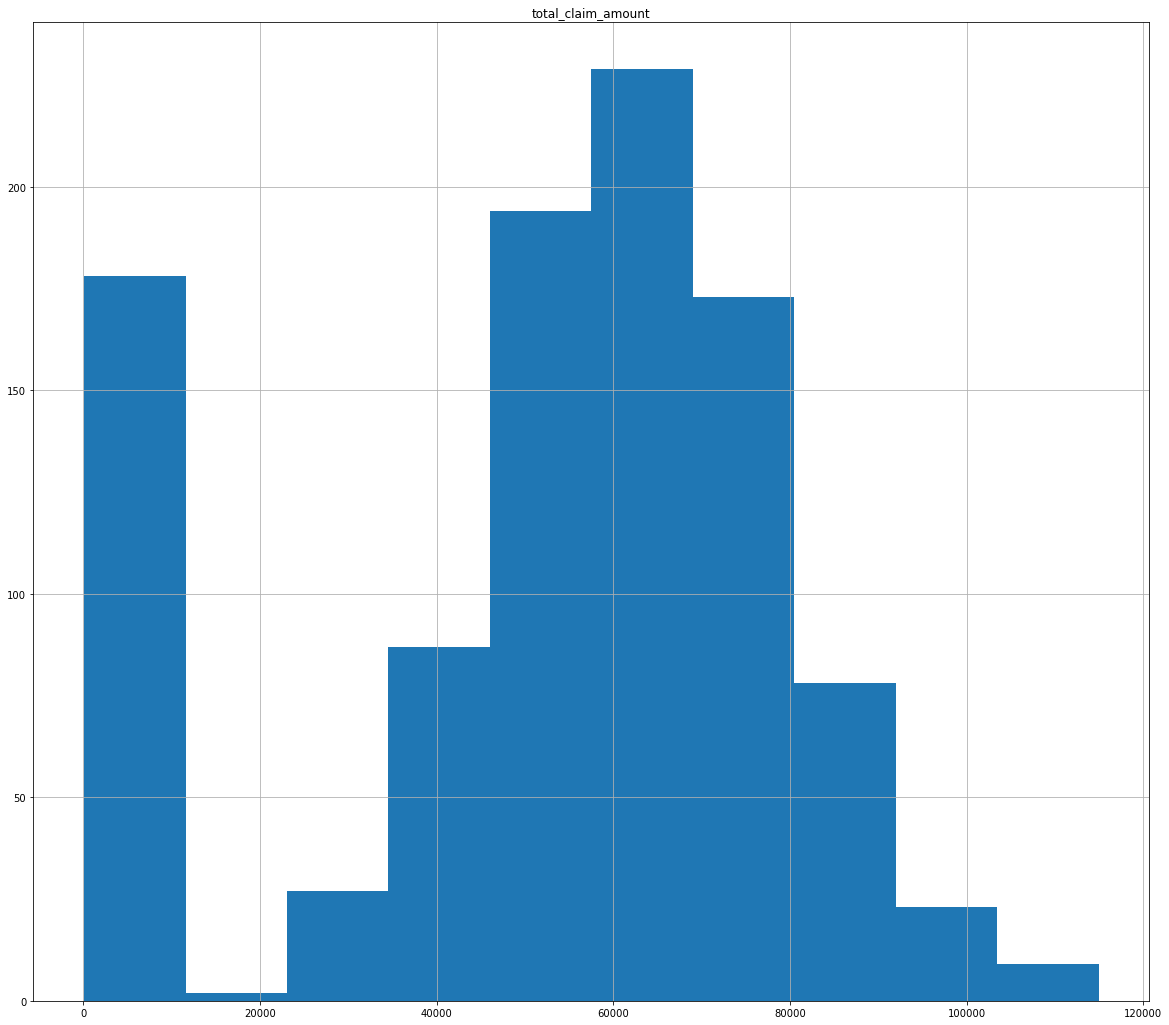

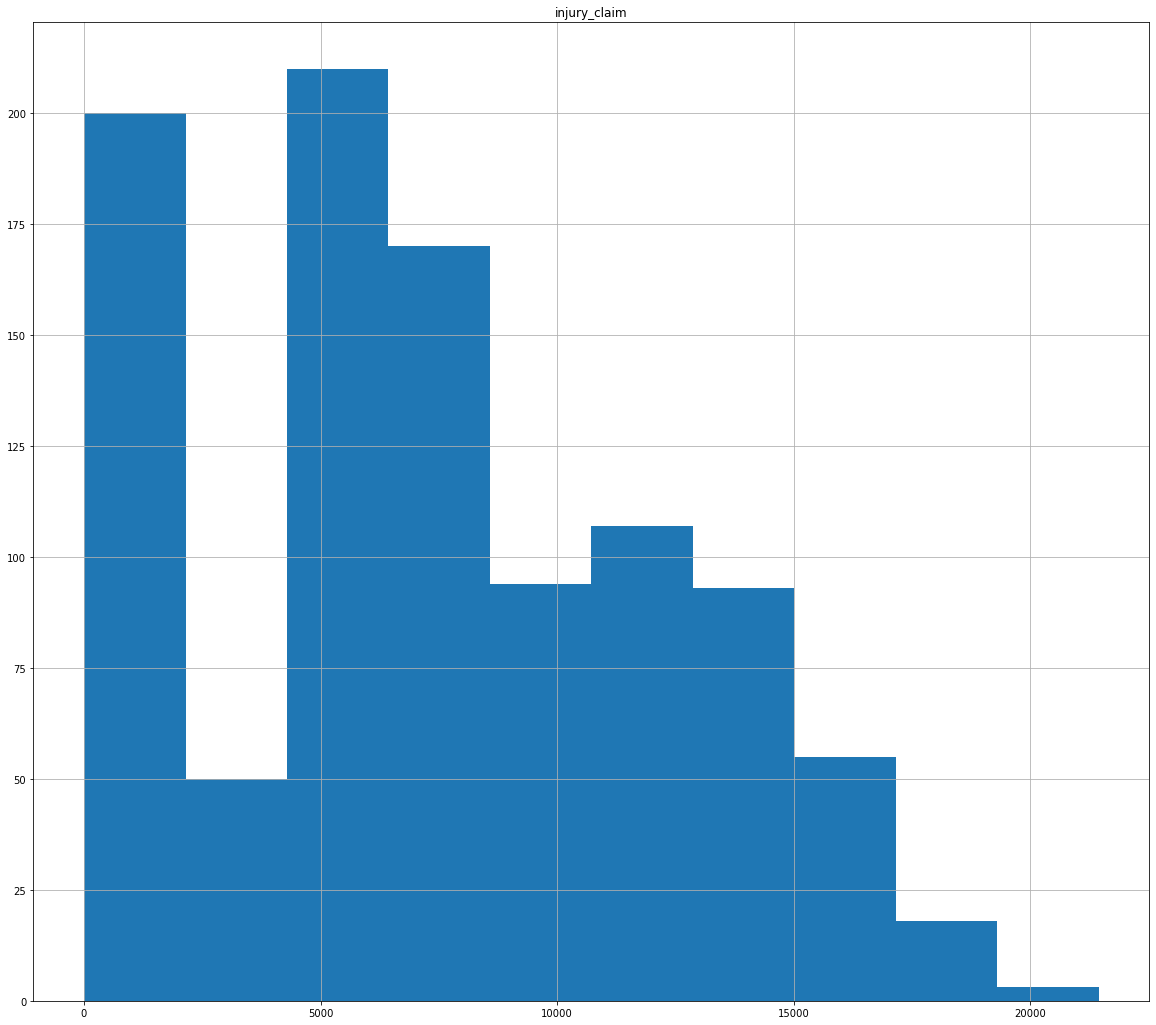

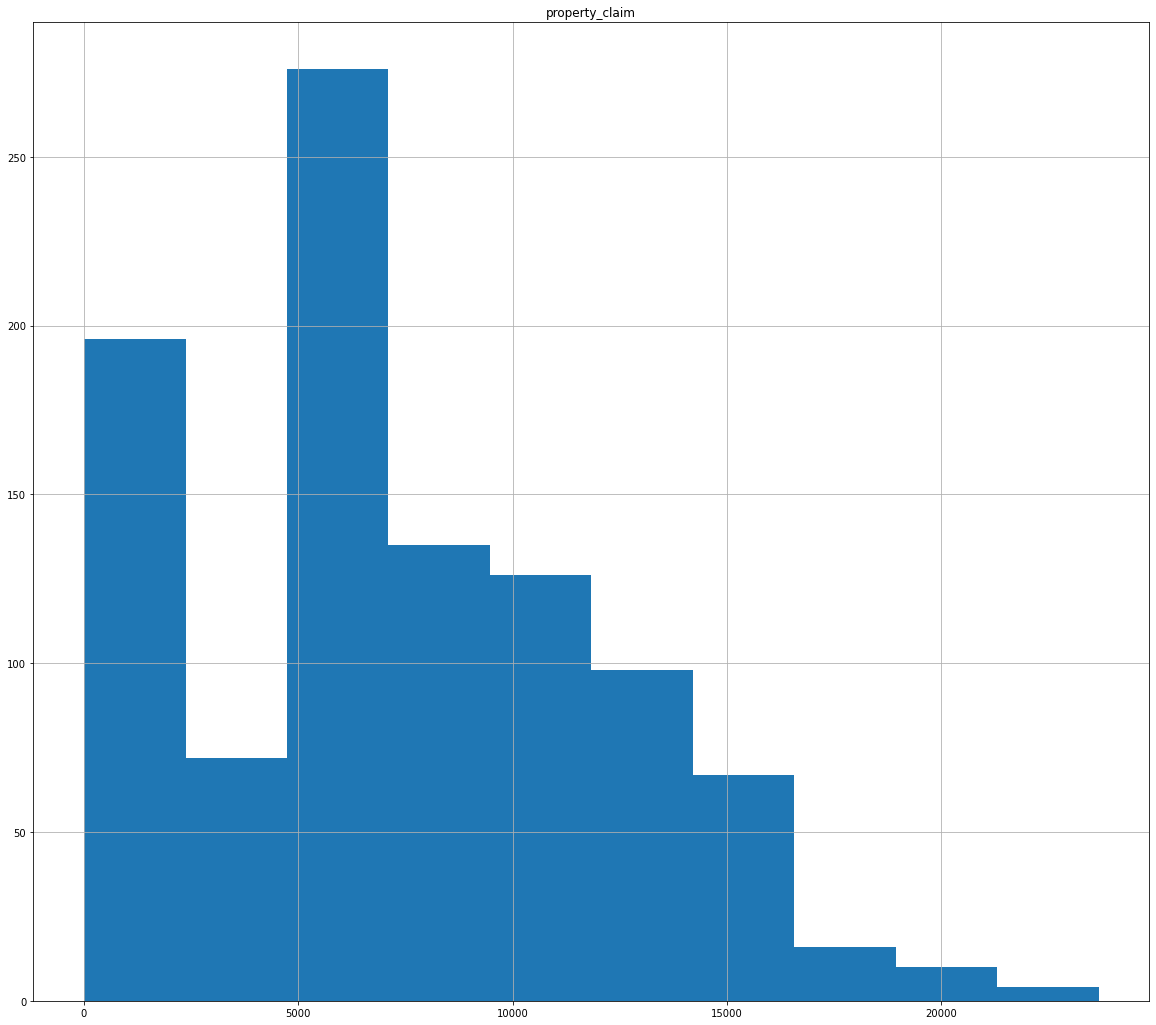

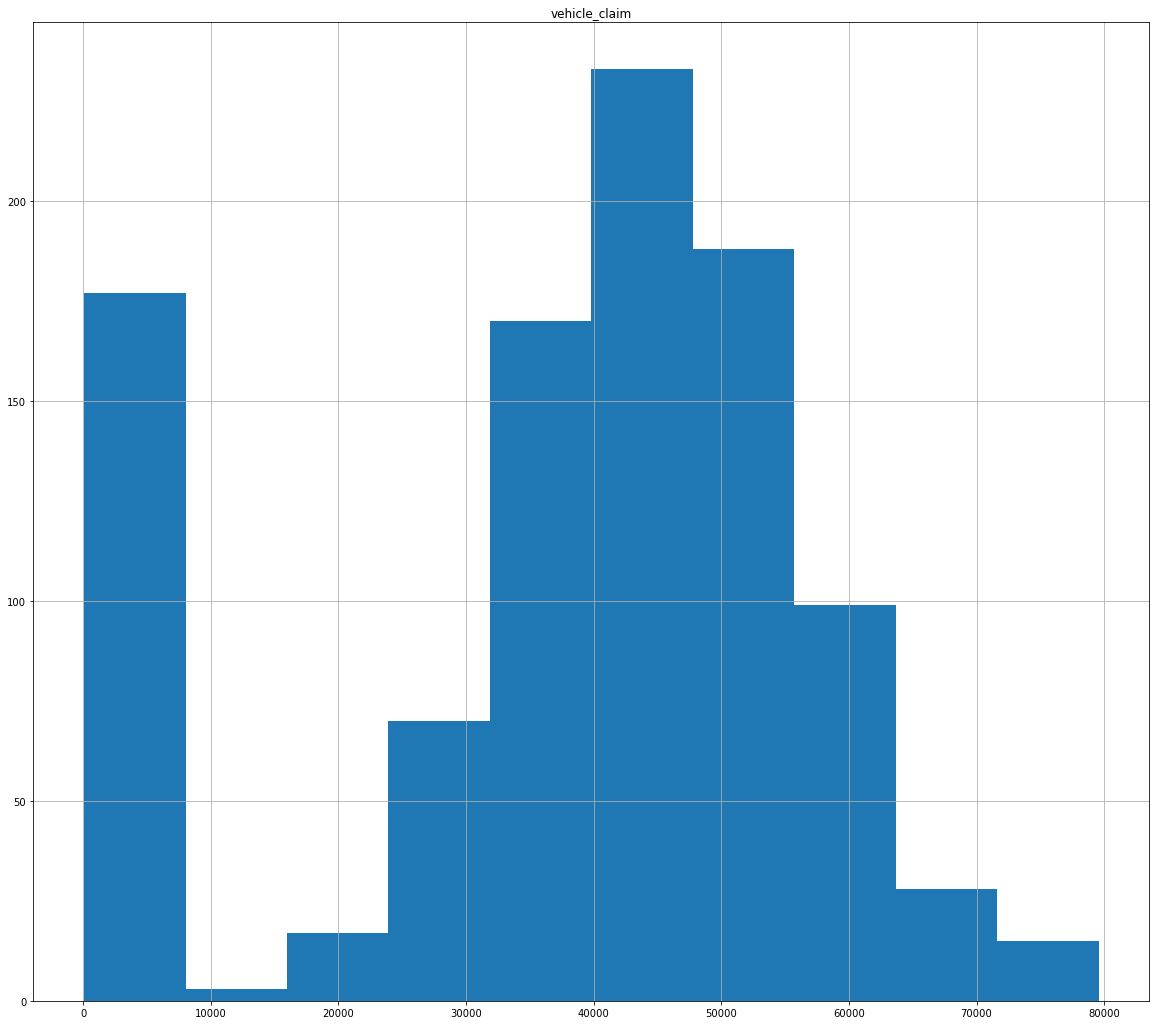

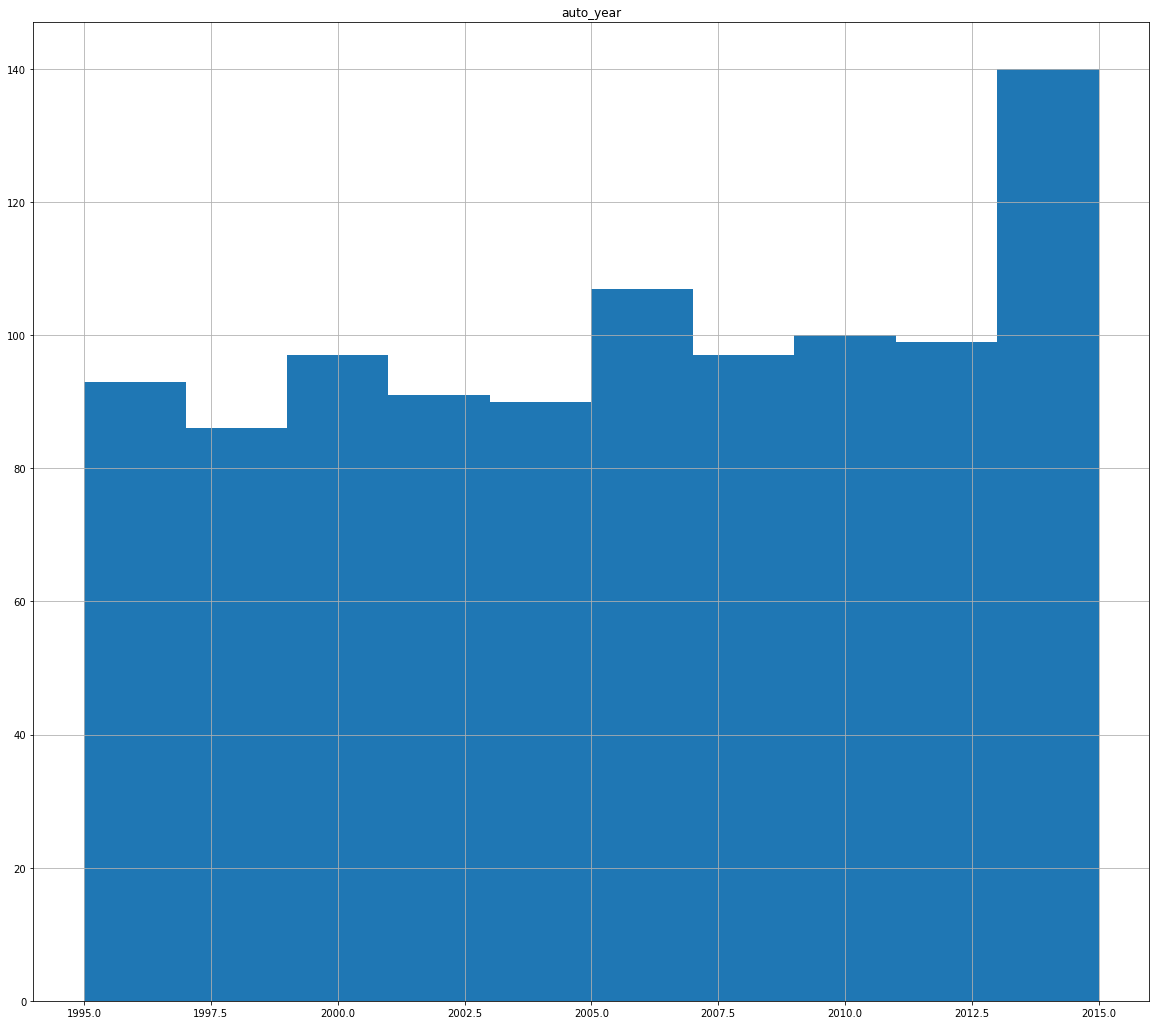

In [200]:
for i in df_num:
    plt.figure(figsize=[20,18])
    df_num[i].hist(grid=True)
    plt.title(i)
    plt.show()

We can see that there are few columns, which are having numeric data type but are categorical in nature.

In [201]:
df['property_damage'] = df['property_damage'].replace('?','Unidentified')

In [202]:
print(df['property_damage'].value_counts())

Unidentified    360
NO              338
YES             302
Name: property_damage, dtype: int64


In [203]:
df['police_report_available'] = df['police_report_available'].replace('?','Unidentified')

In [204]:
print(df['police_report_available'].value_counts())

NO              343
Unidentified    343
YES             314
Name: police_report_available, dtype: int64


In [205]:
df['collision_type'] = df['collision_type'].replace('?','Unidentified')

In [206]:
print(df['collision_type'].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
Unidentified       178
Name: collision_type, dtype: int64


# Checking the correlation

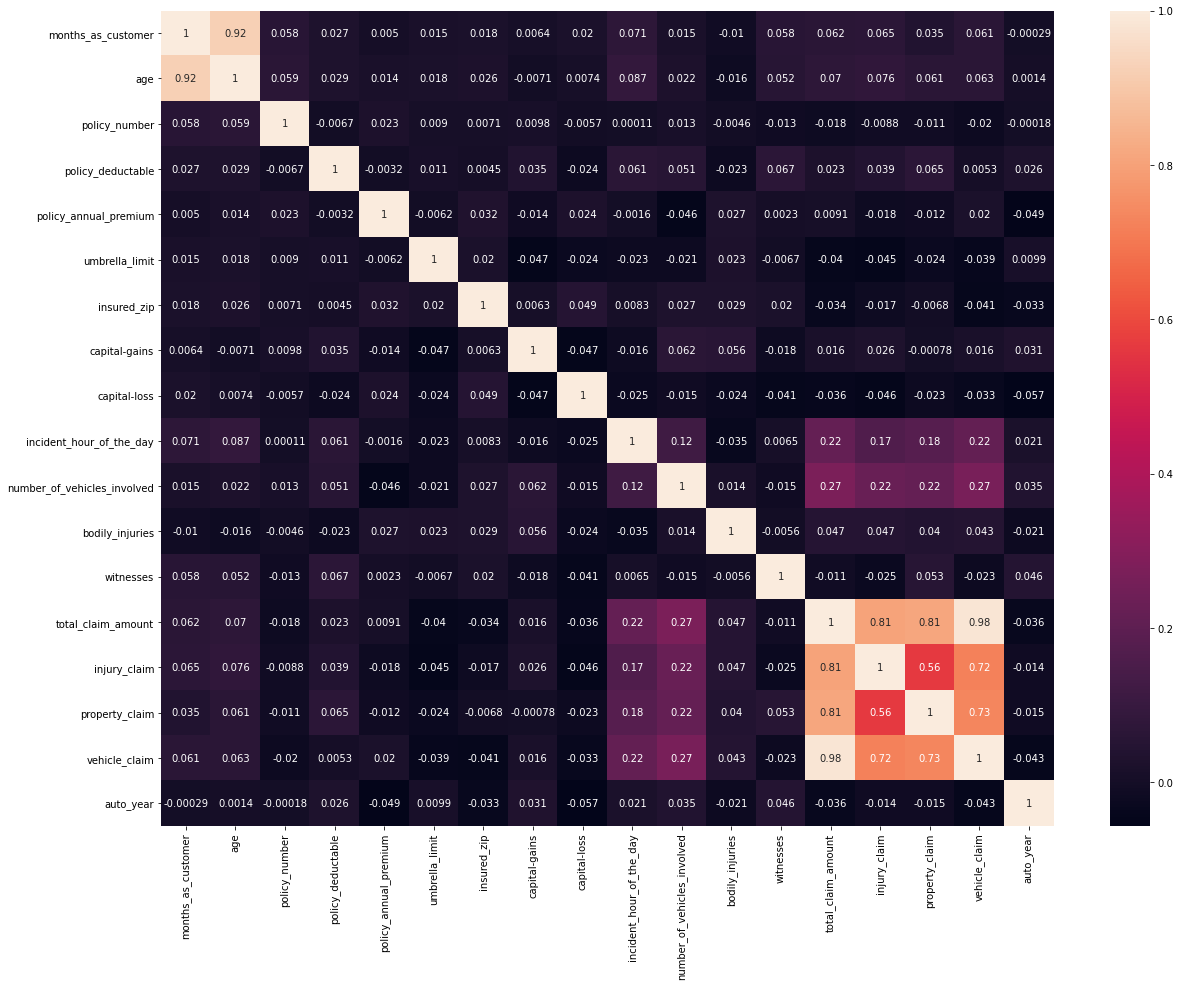

In [207]:
plt.figure(figsize = [20, 15])                             
sns.heatmap(df.corr(), annot = True)
plt.show()

Observations:
- months_as_customer and age are positively correlated to each other.
- Incident_hour_of_the_day and number_of_vehicles_involved are positively correlated to total_claim_amount,injury_claim,
  property_claim,vehicle_claim.
- total_claim_amount, vehicle_claim,property_claim,injury_claim are positively correlated to each other.

# Encoding the DataFrame

In [208]:
from sklearn.preprocessing import LabelEncoder

In [209]:
le=LabelEncoder()

In [210]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [211]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,1,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,1,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,1,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [212]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


Observation:
- There are no null values.
- In some columns, there is difference between mean and median, which indicates there are chances of outliers and skewness in 
  the data.

In [213]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

Dropping 'policy_number','policy_bind_date','incident_date',incident_location
as it does not make any impact on the data analysis

In [214]:
df.drop('policy_number',axis=1,inplace=True)

In [215]:
df.drop('policy_bind_date',axis=1,inplace=True)
df.drop('incident_date',axis=1,inplace=True)
df.drop('incident_location',axis=1,inplace=True)

# Checking the Outliers

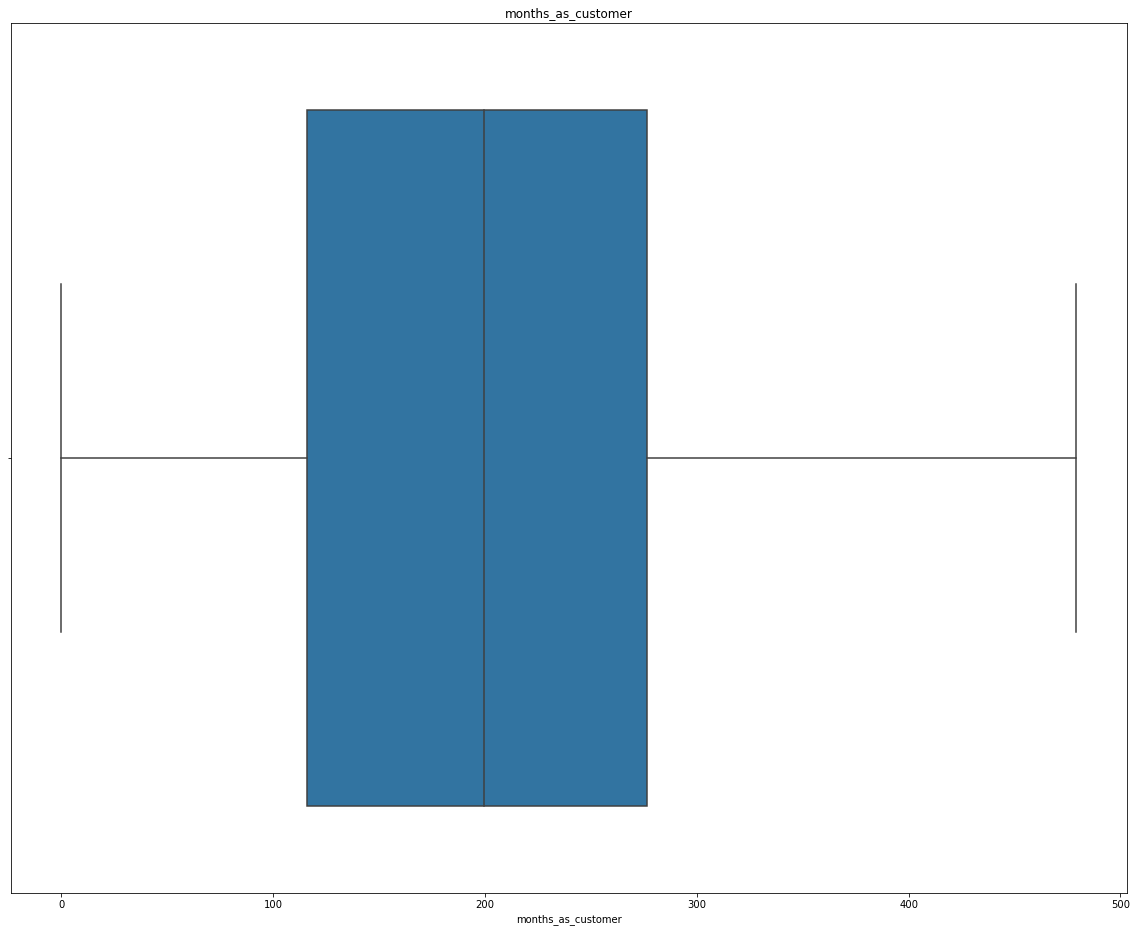

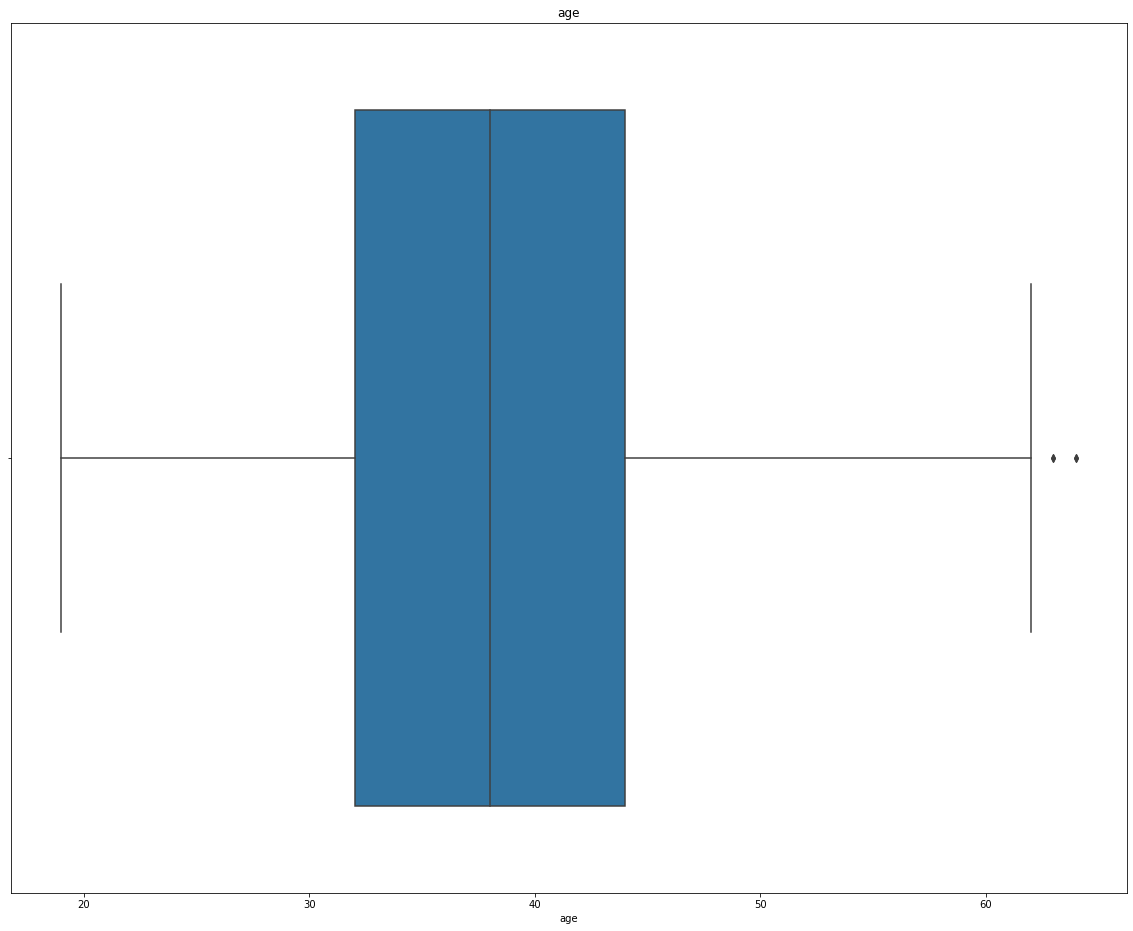

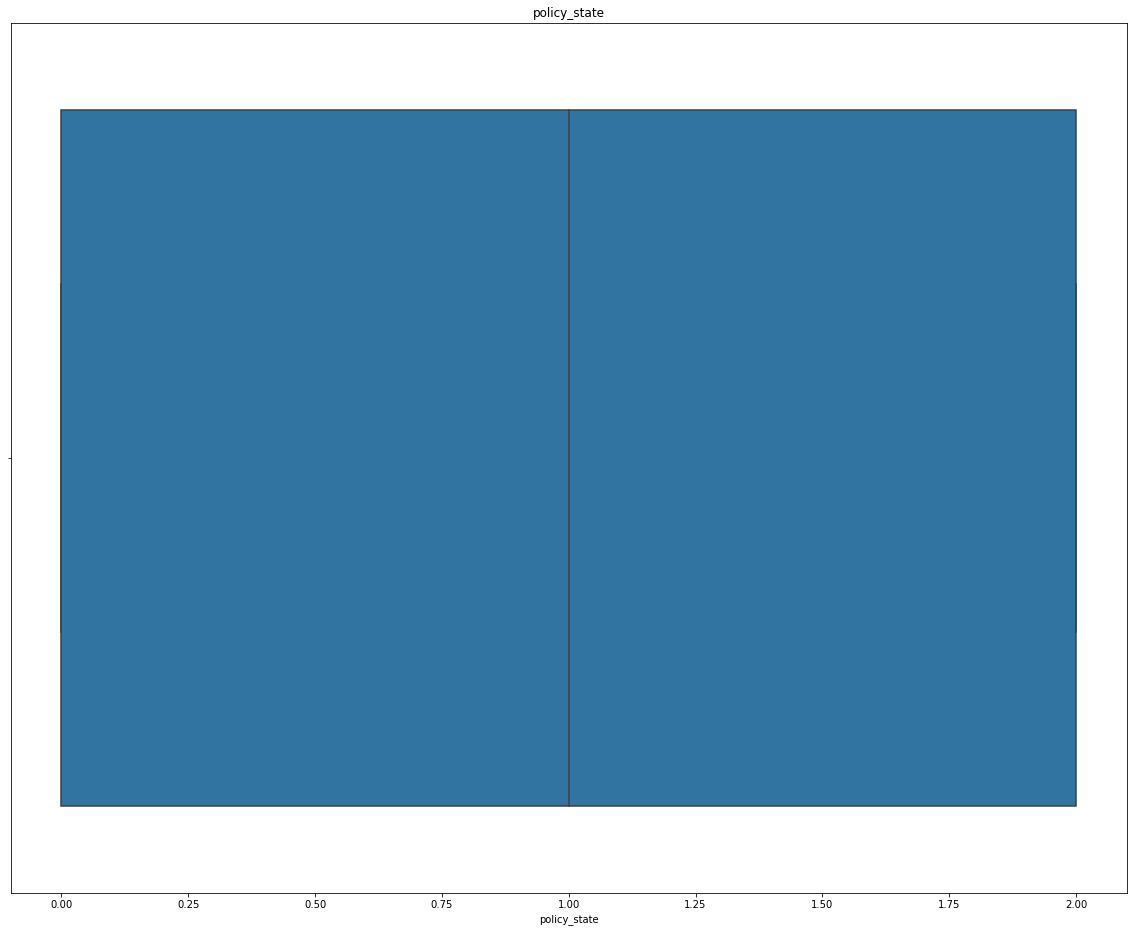

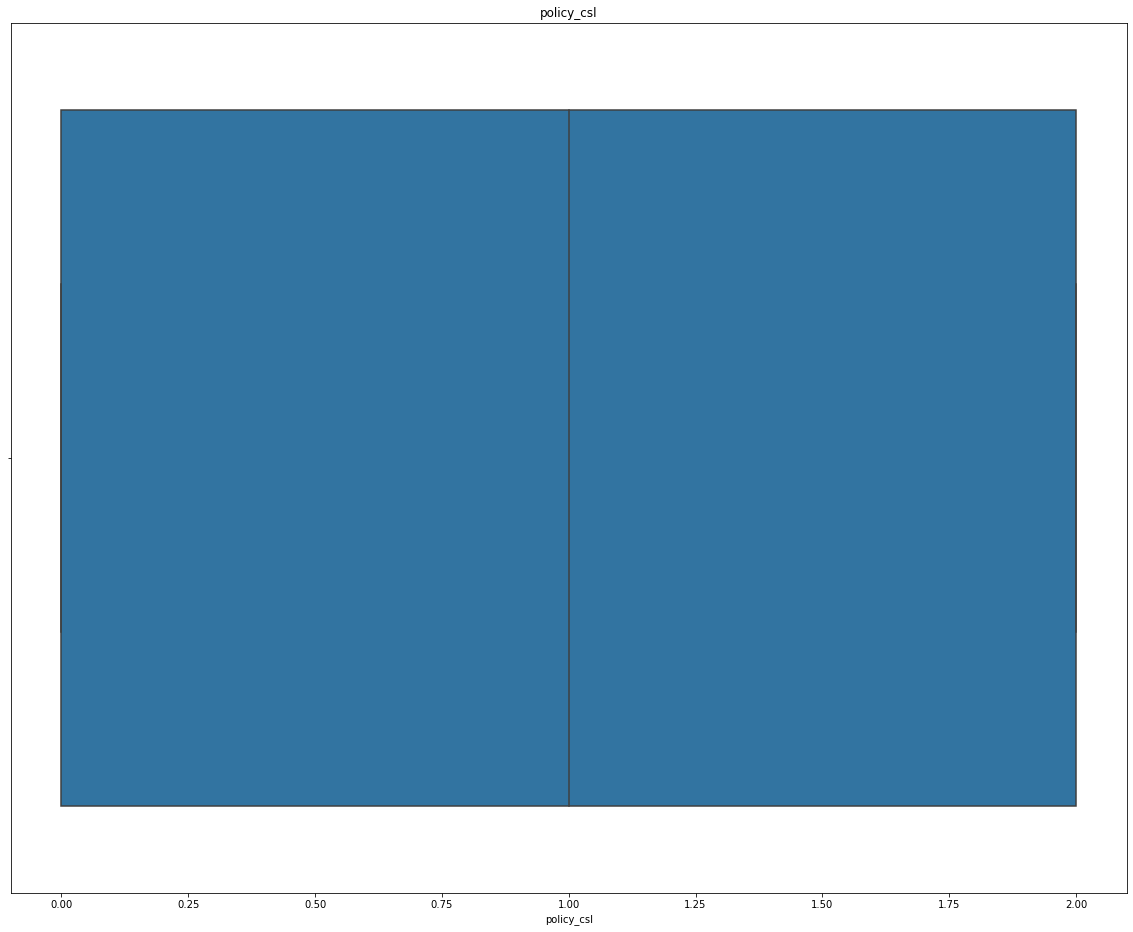

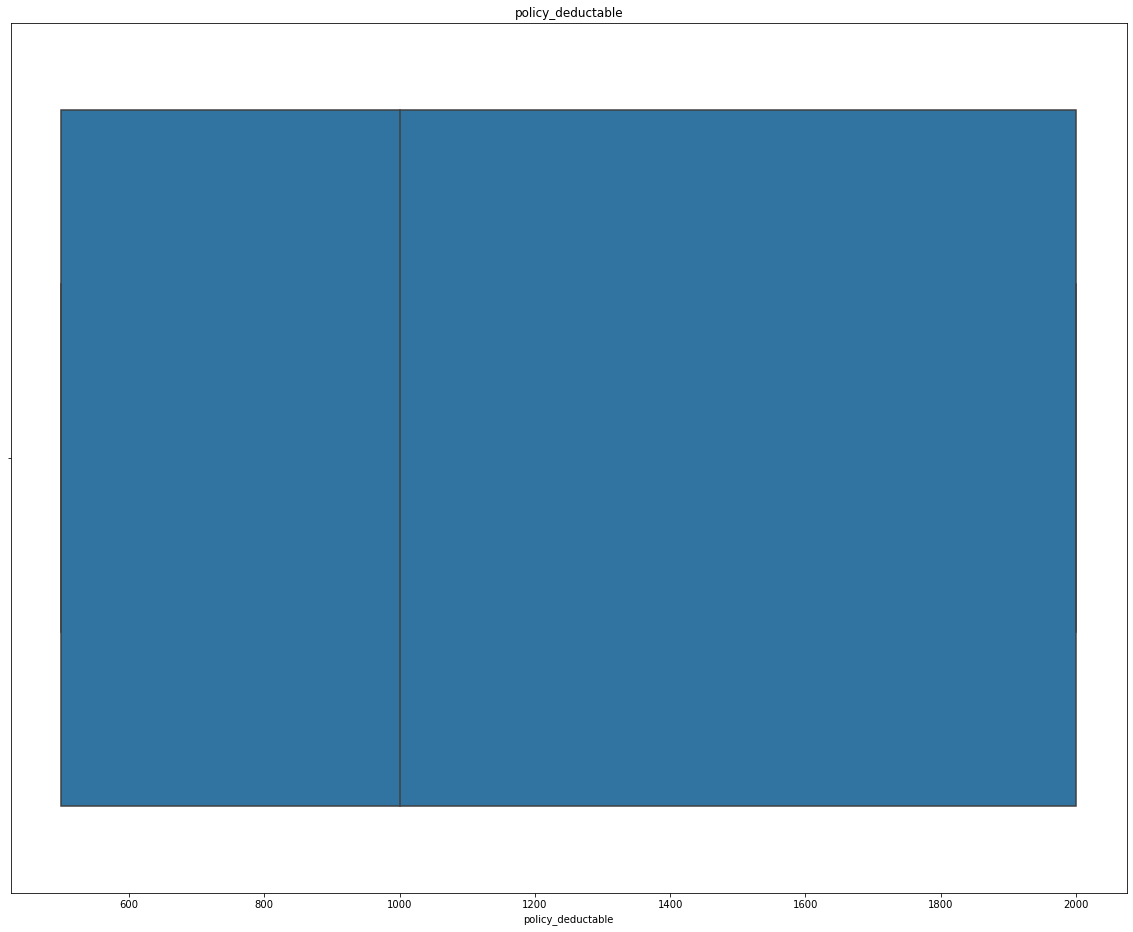

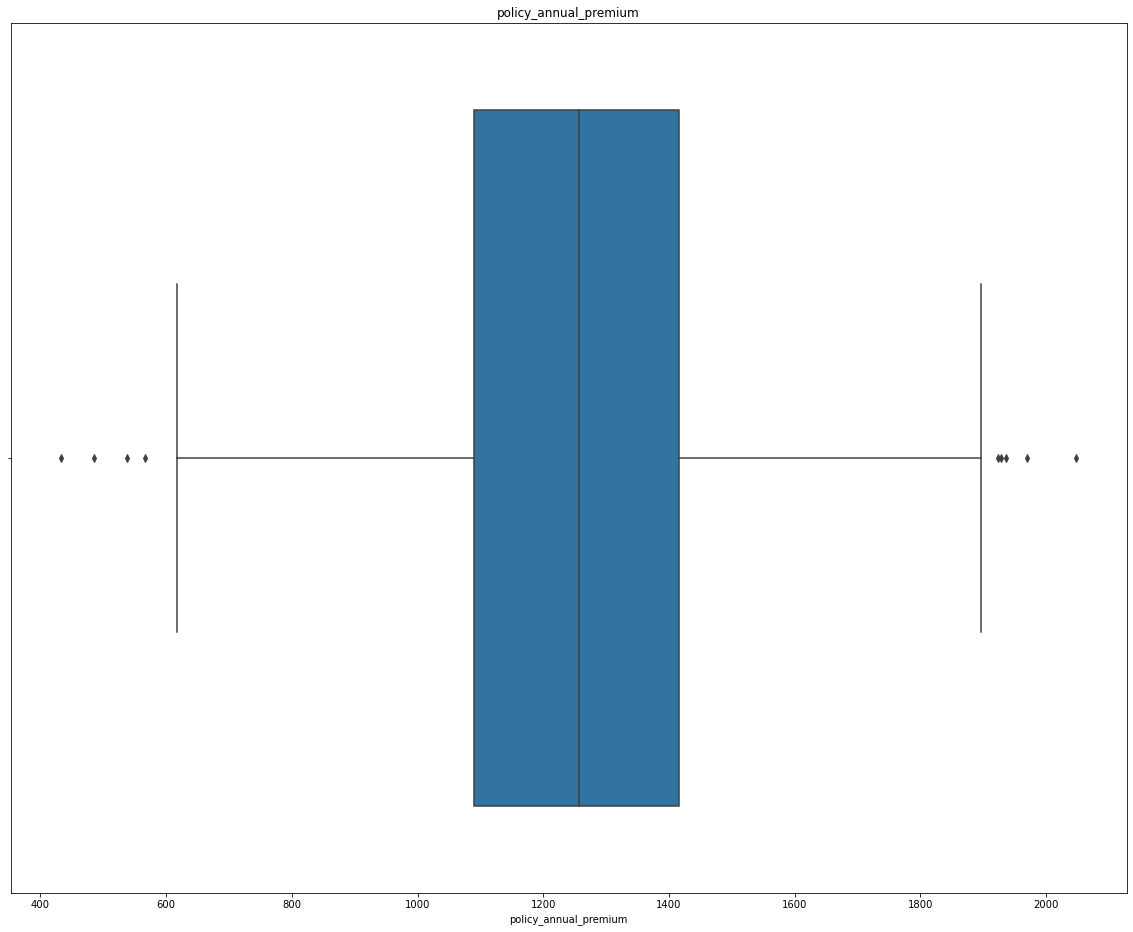

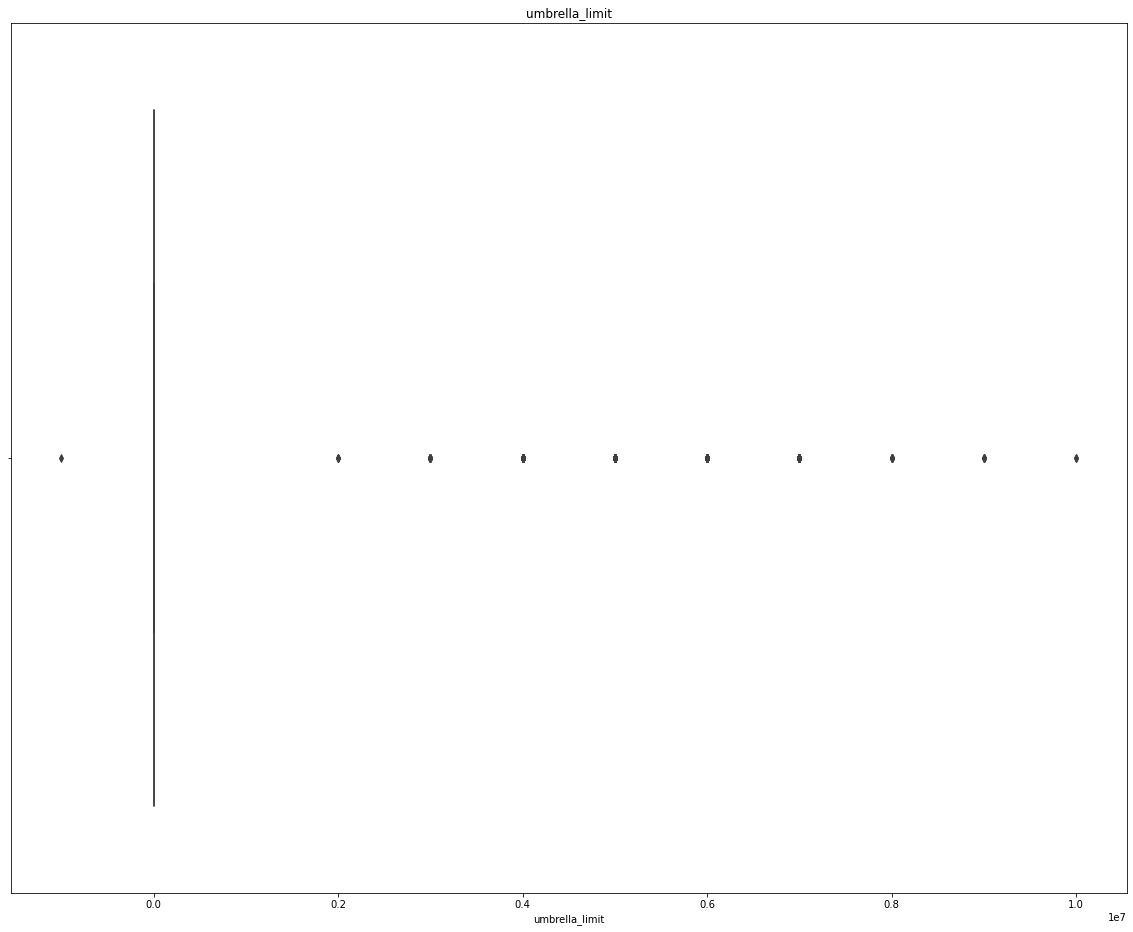

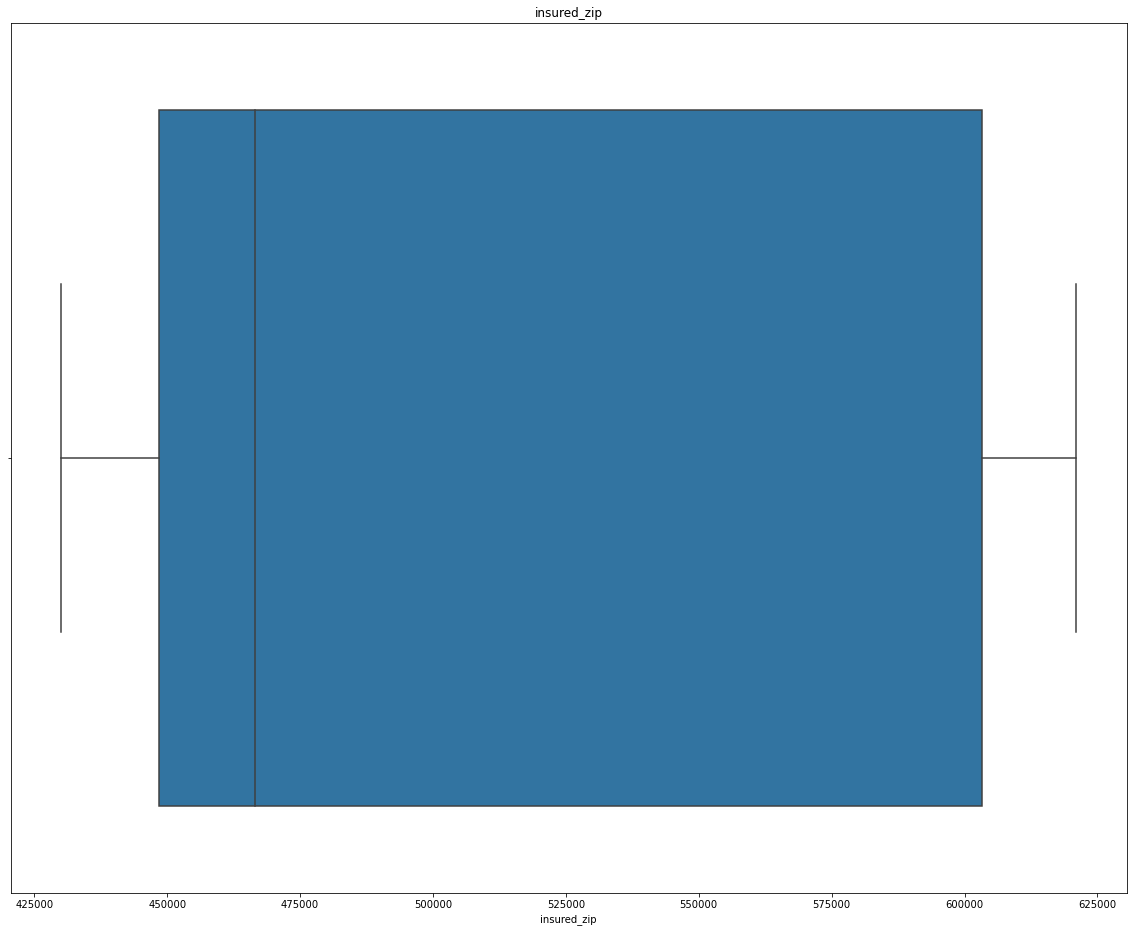

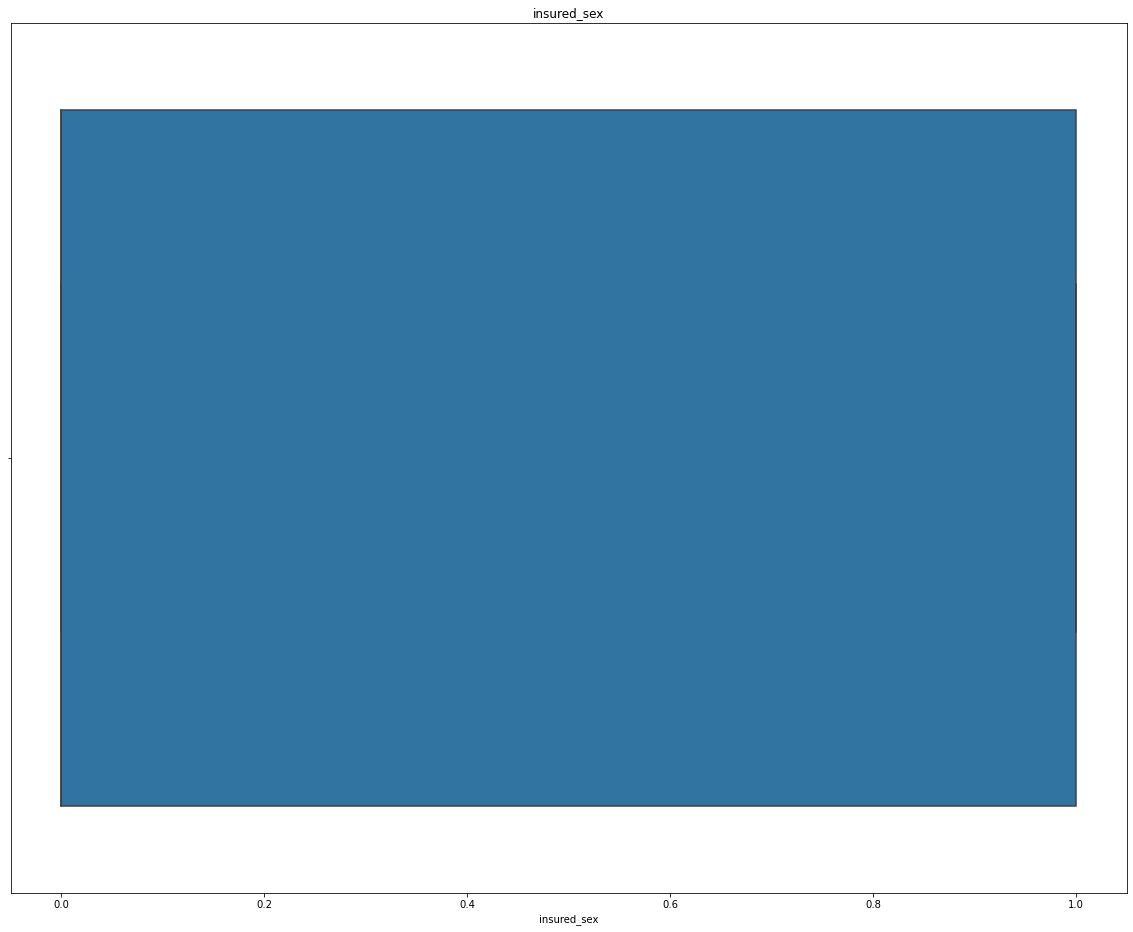

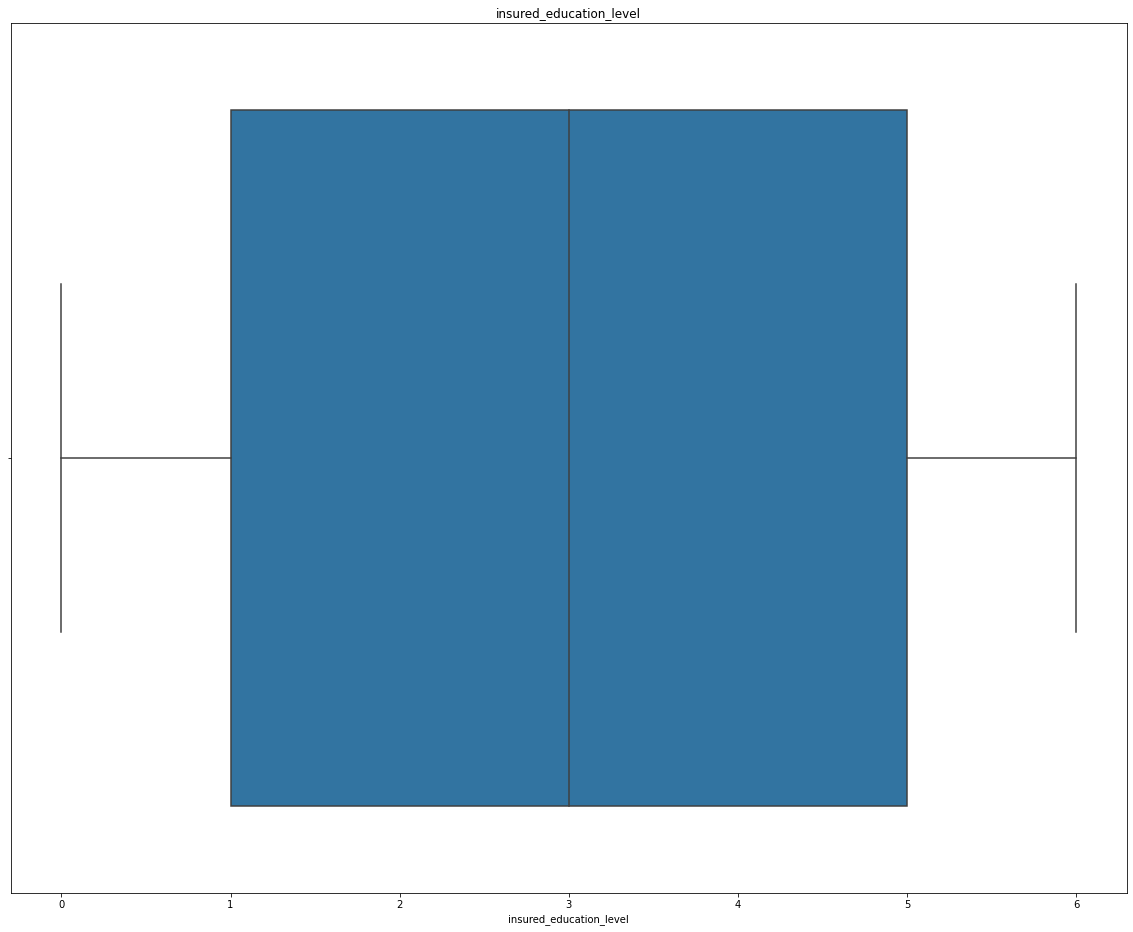

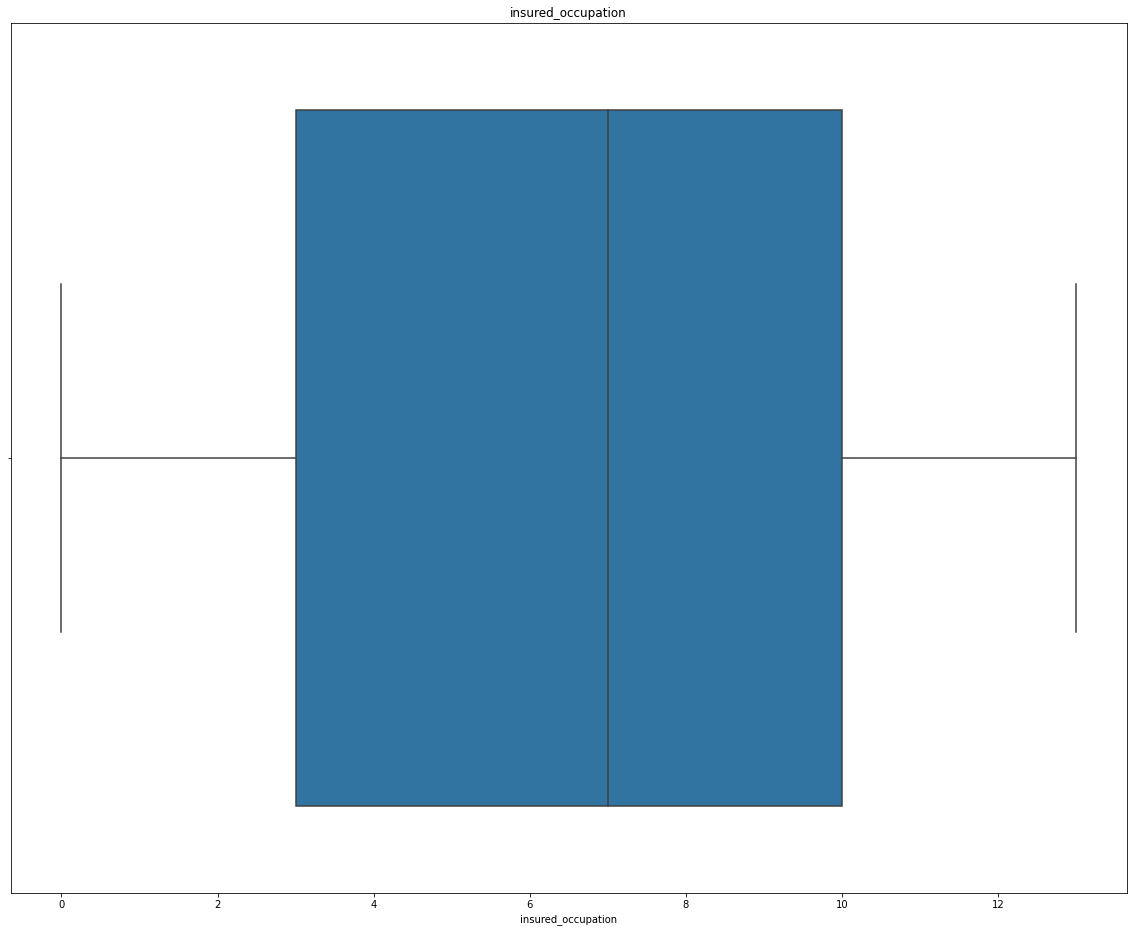

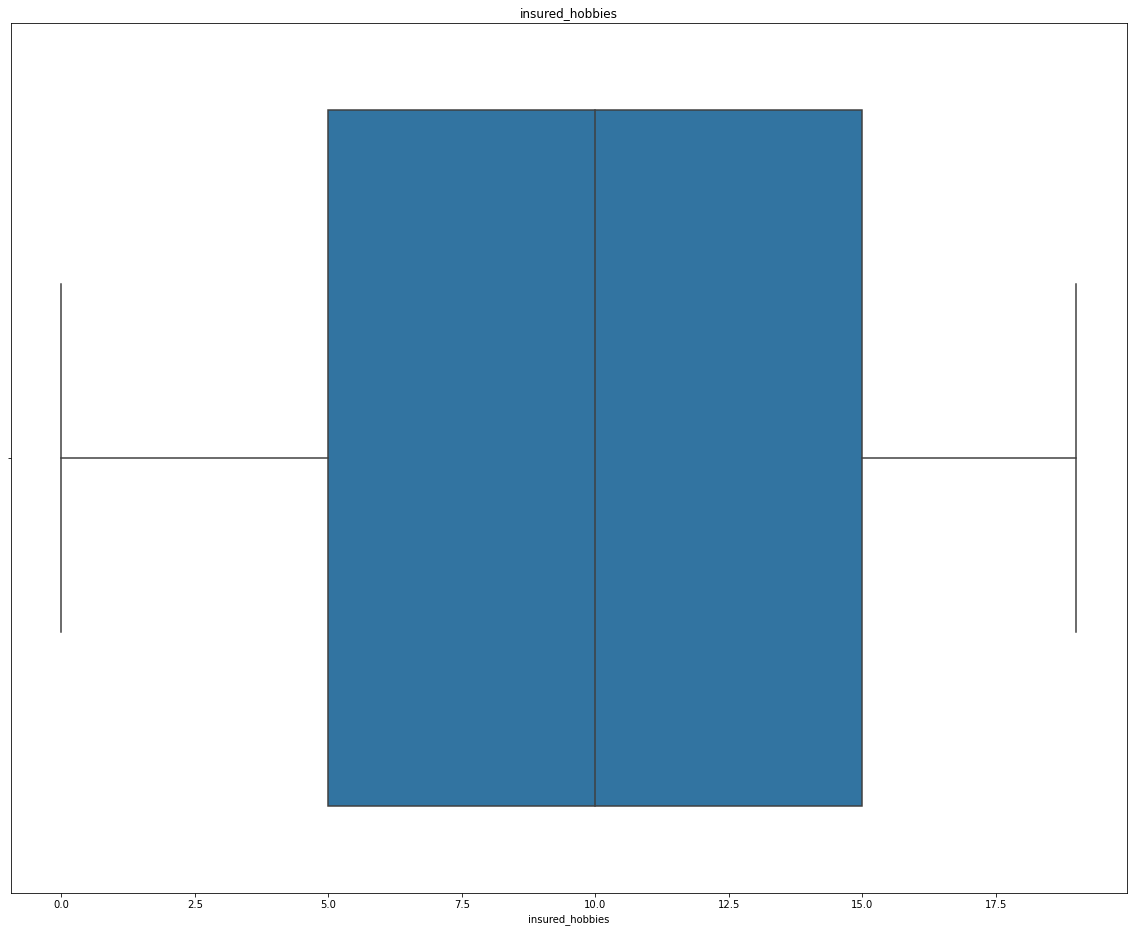

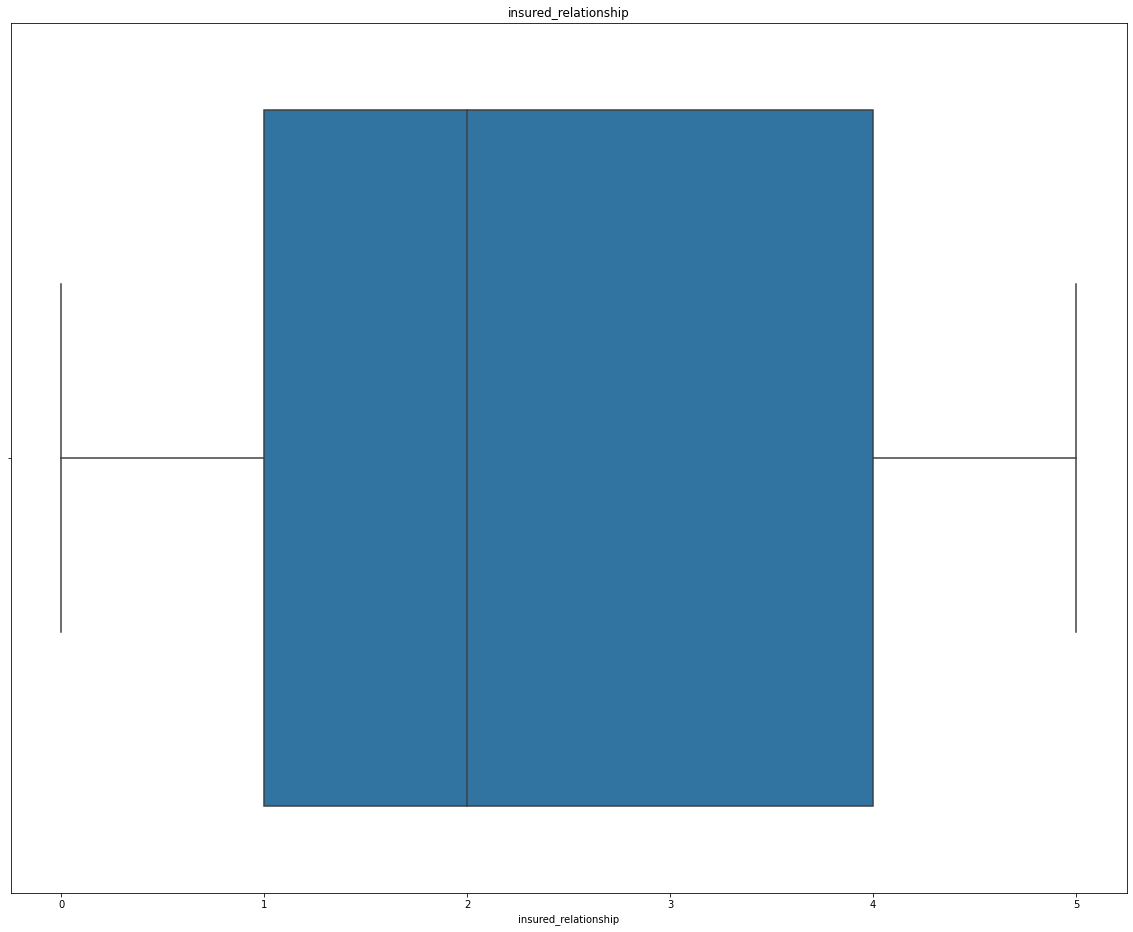

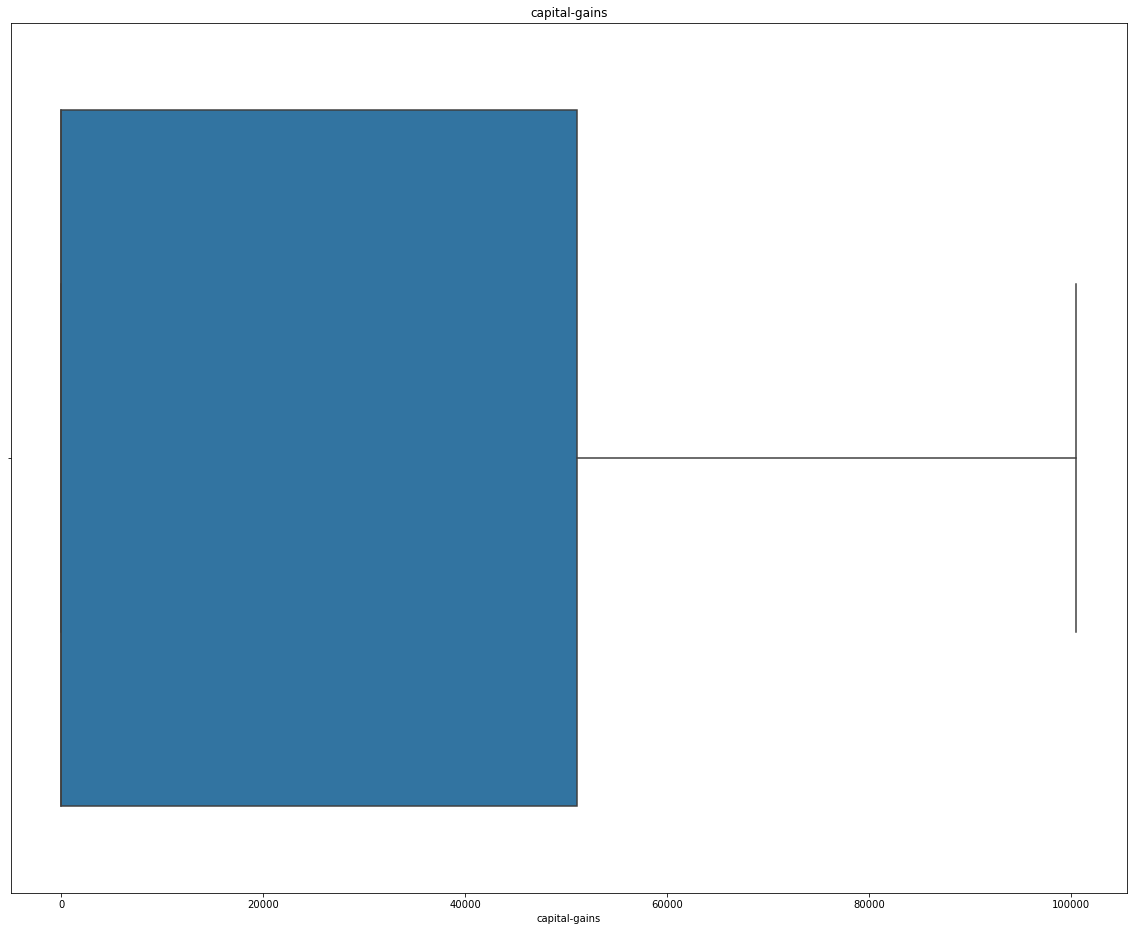

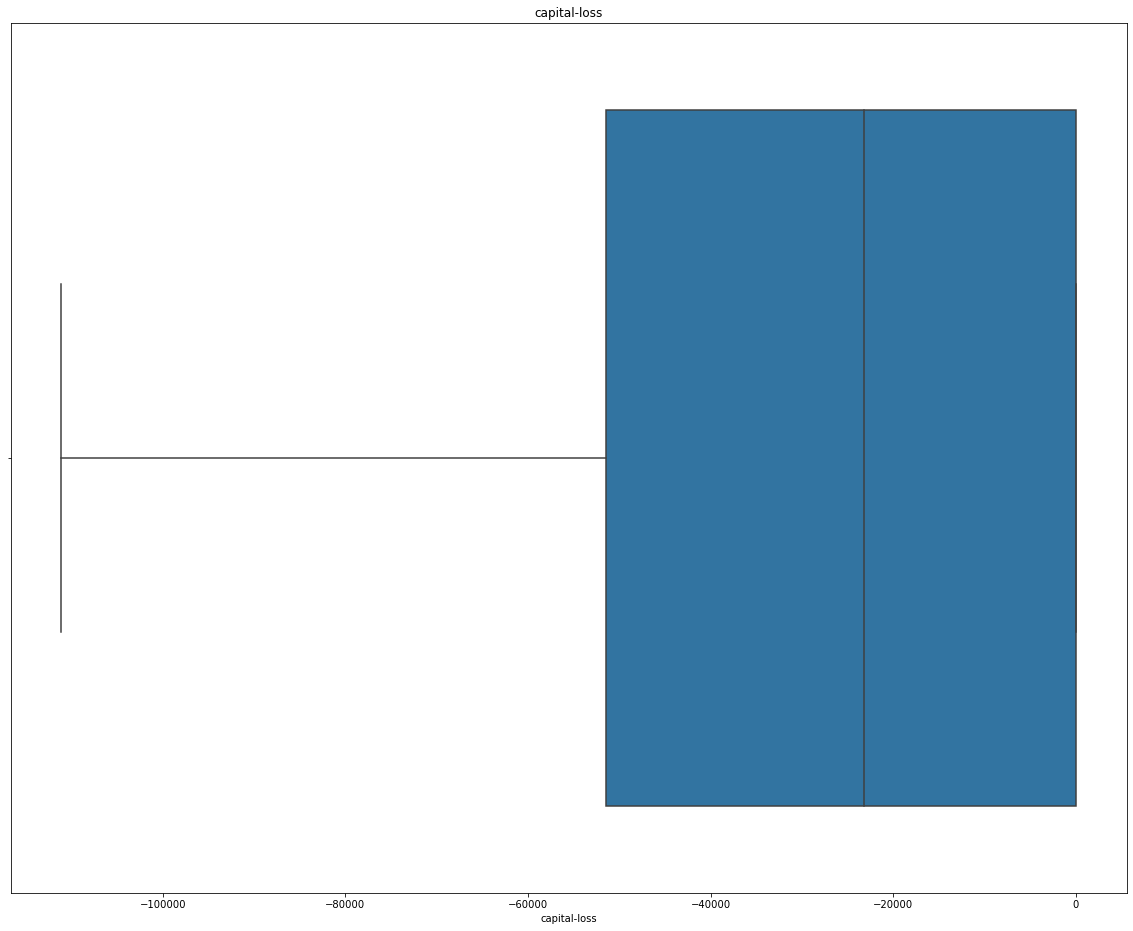

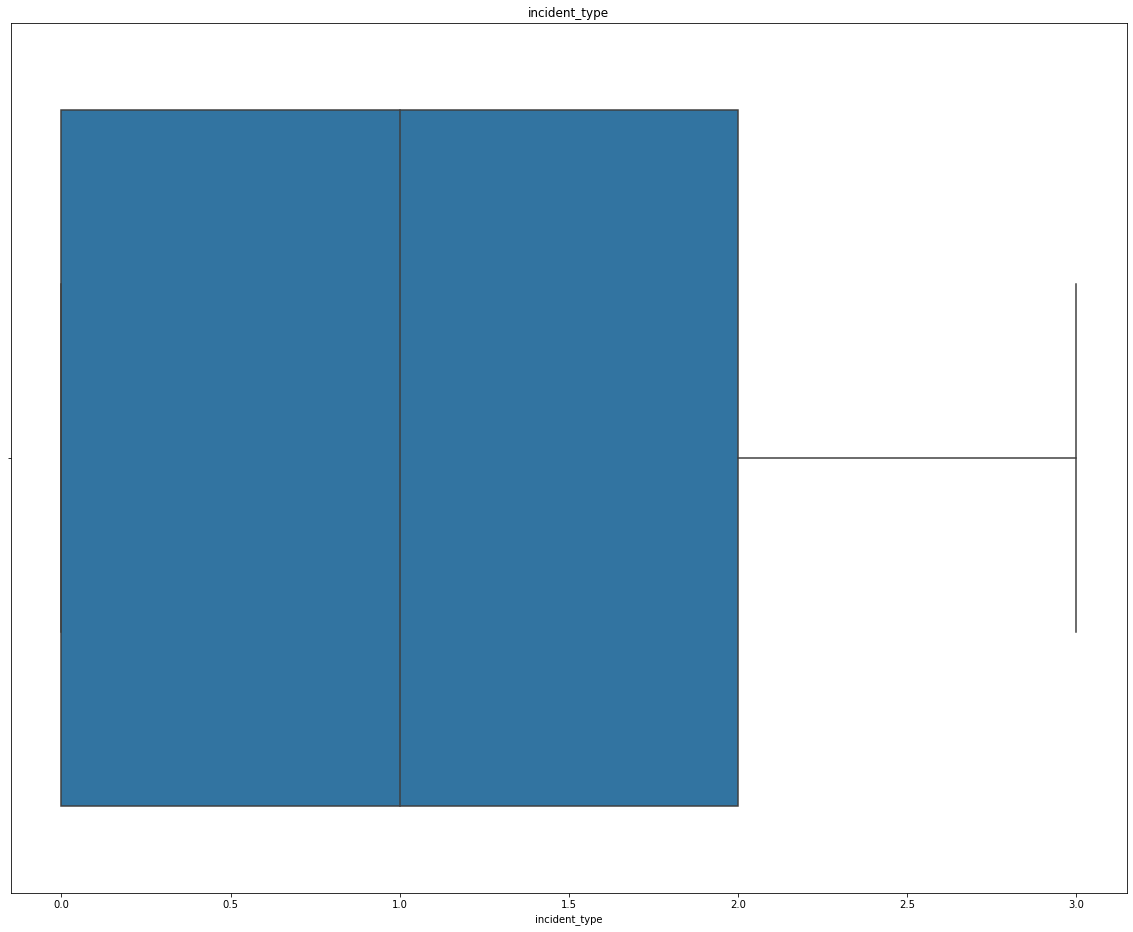

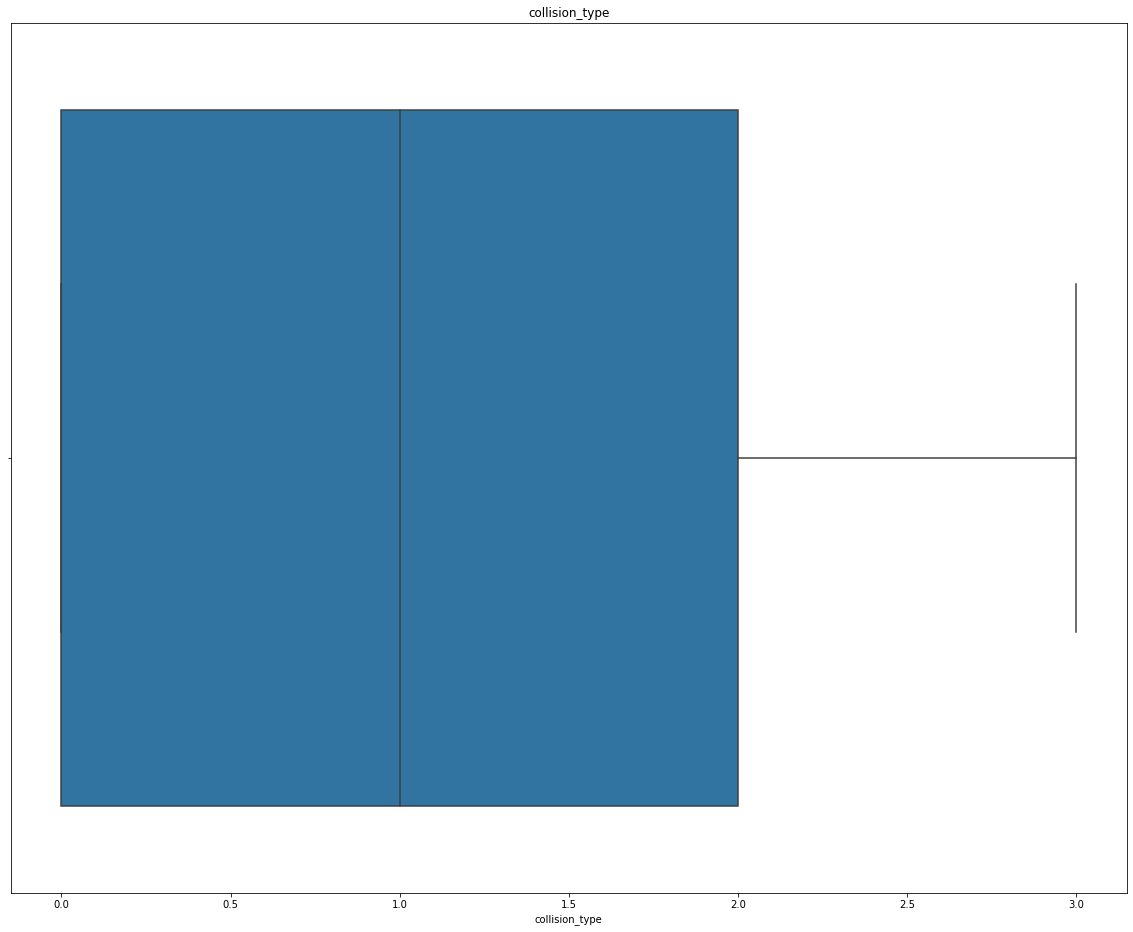

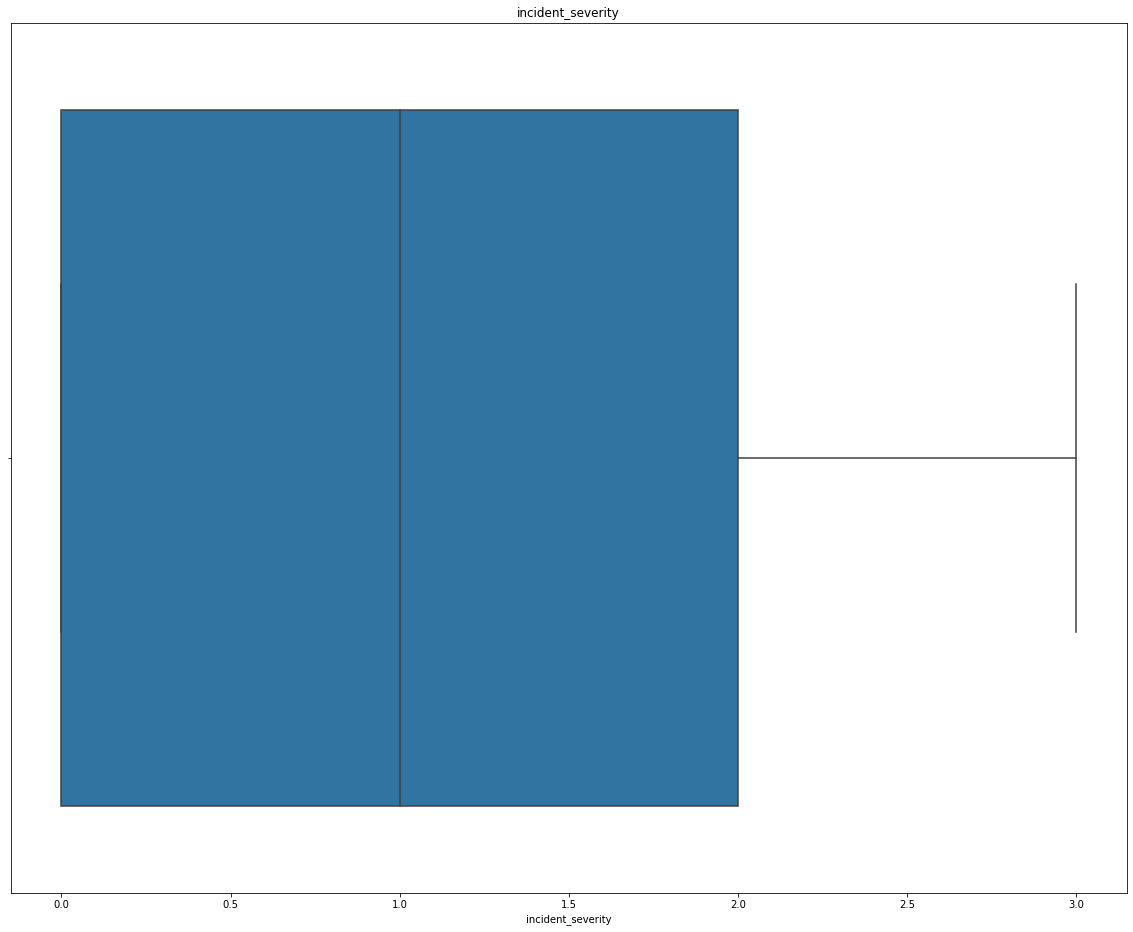

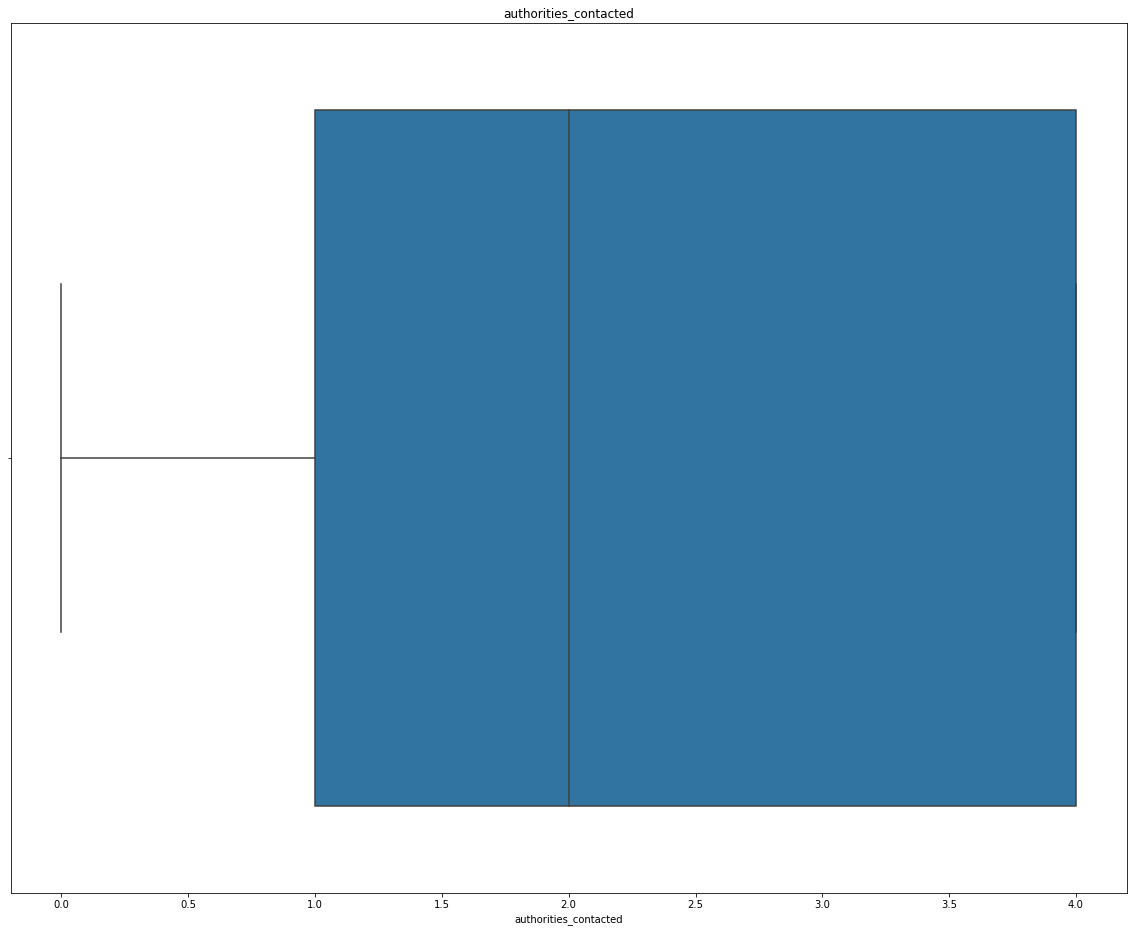

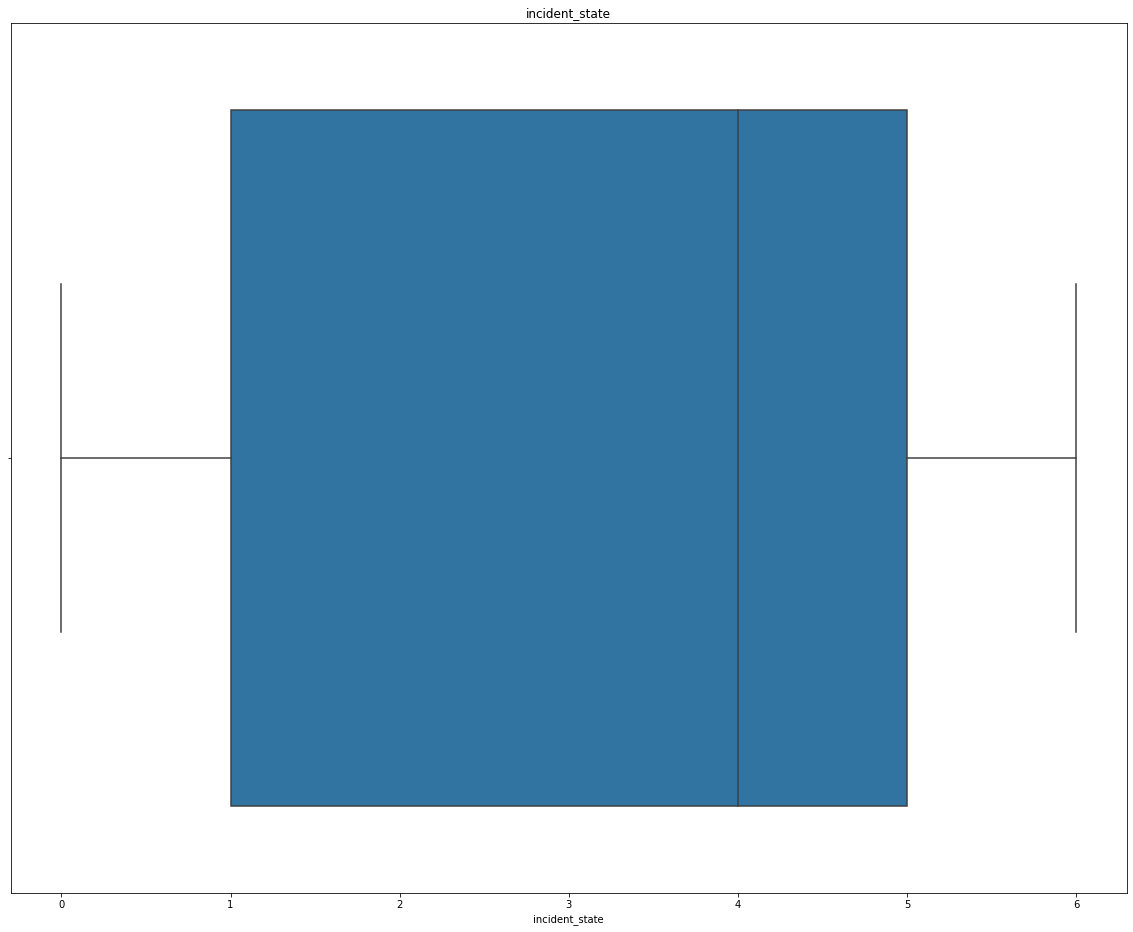

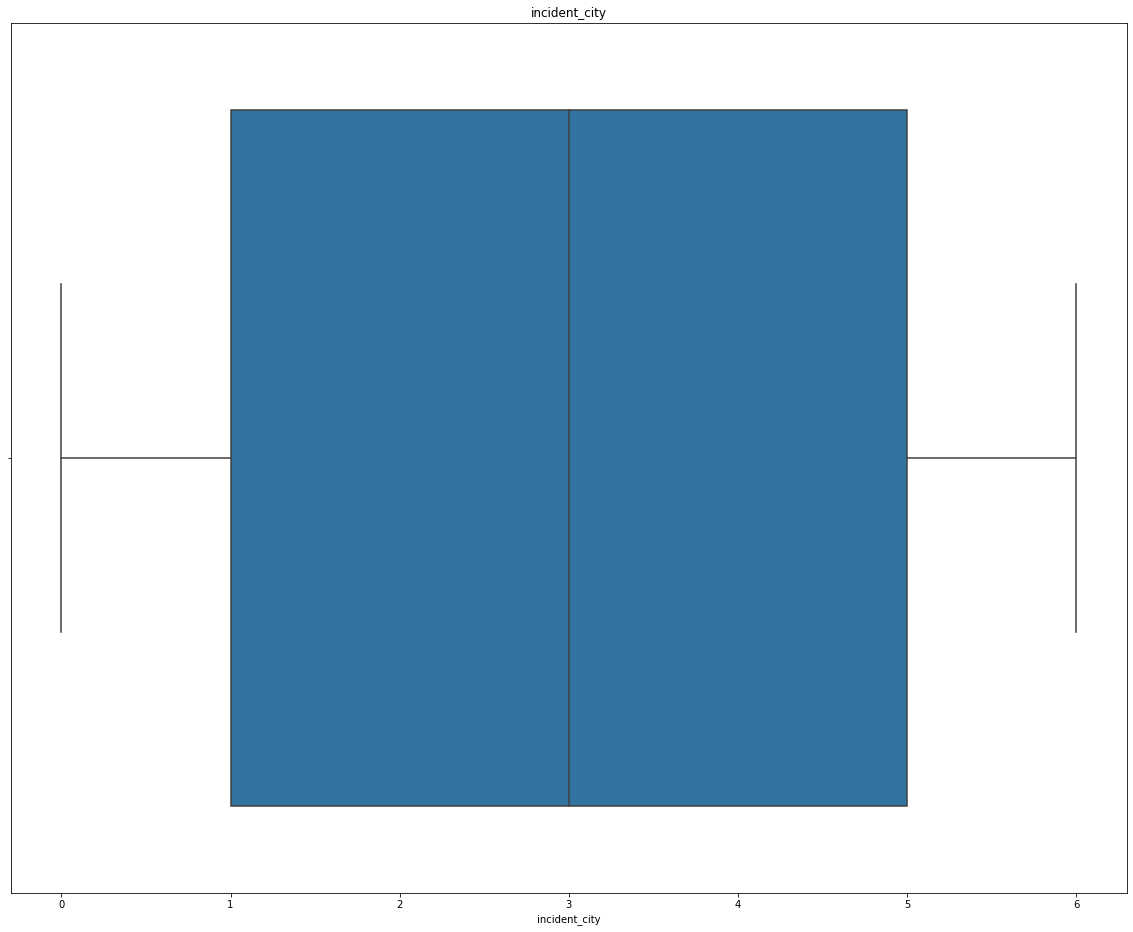

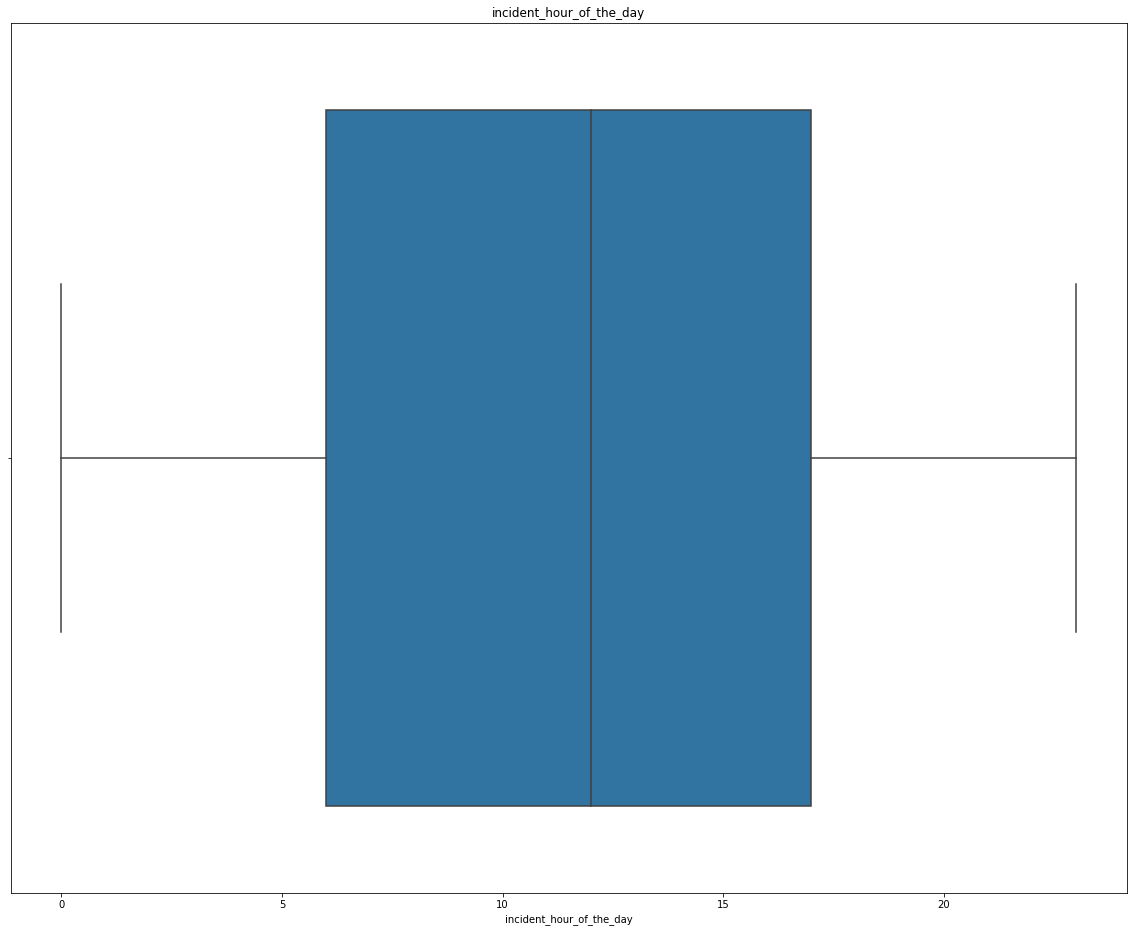

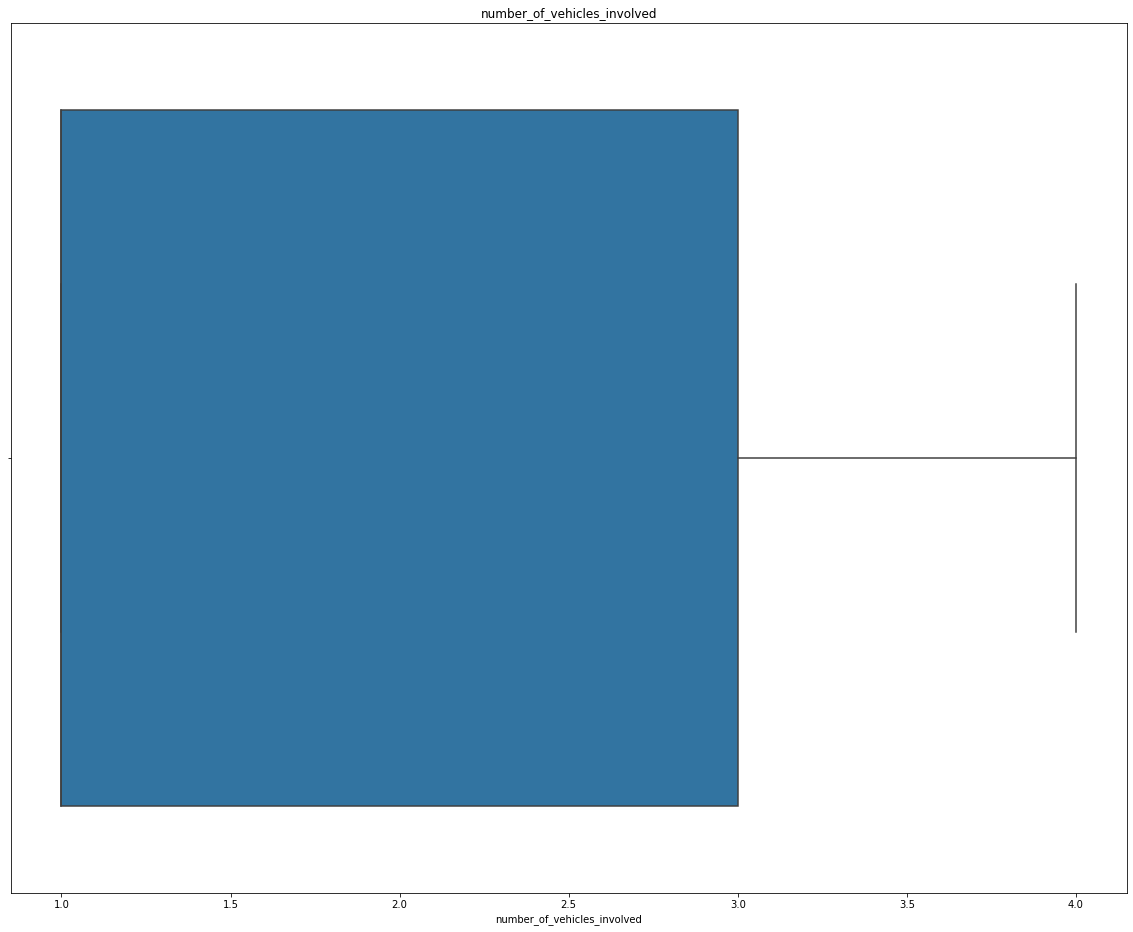

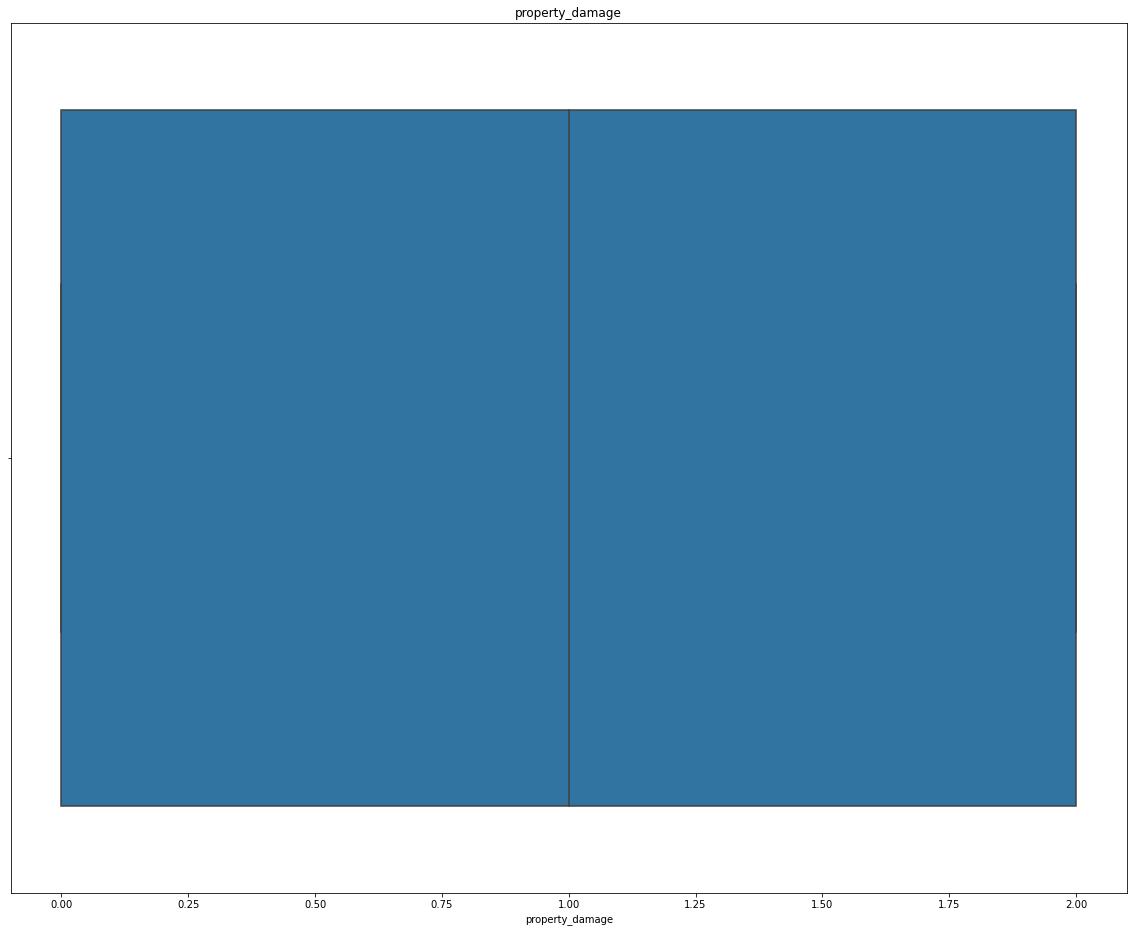

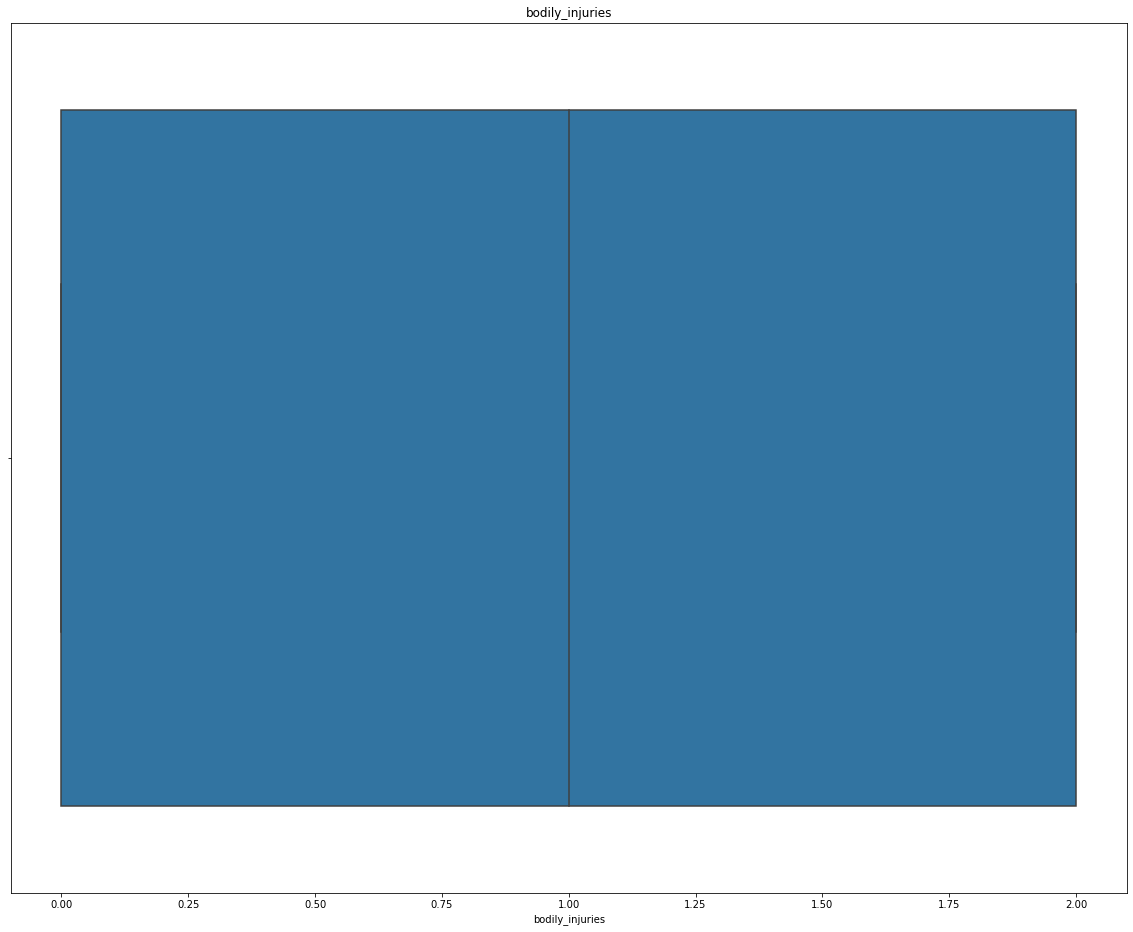

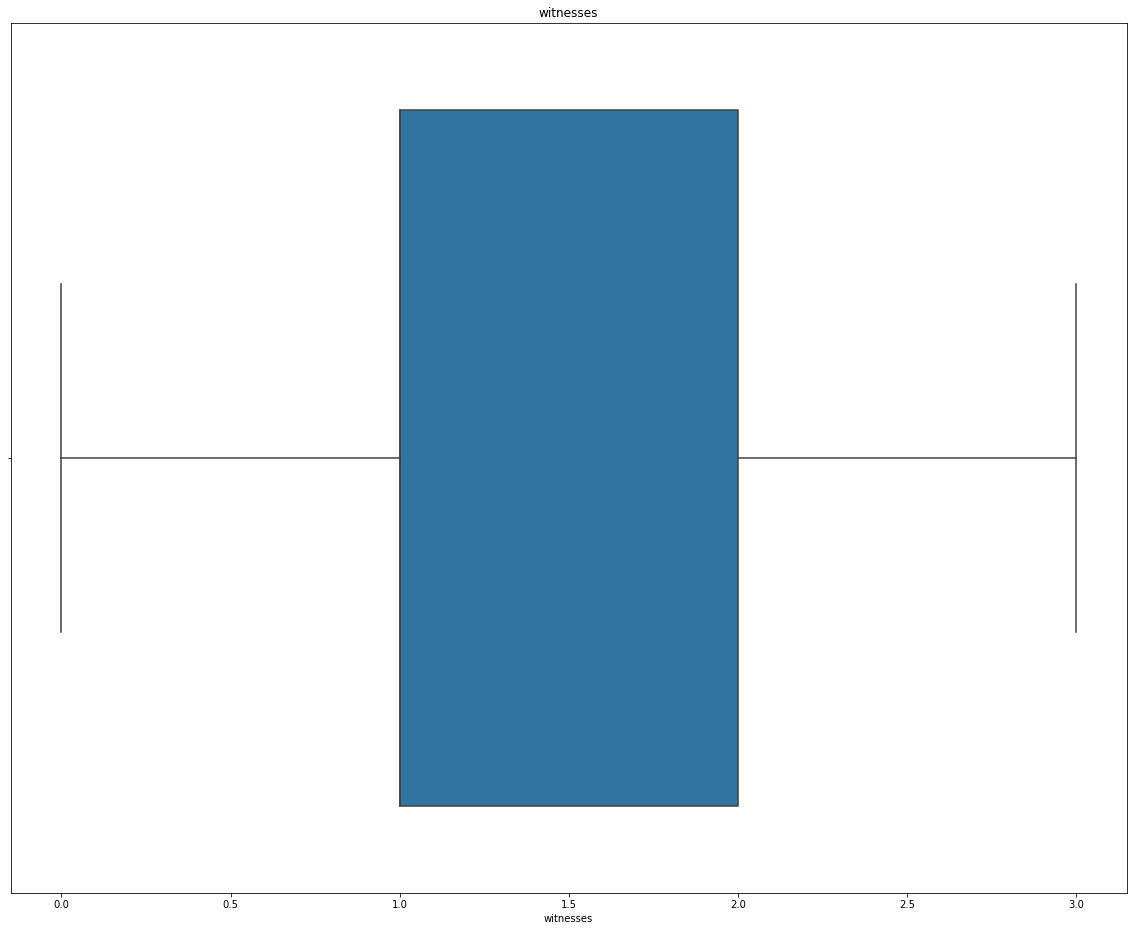

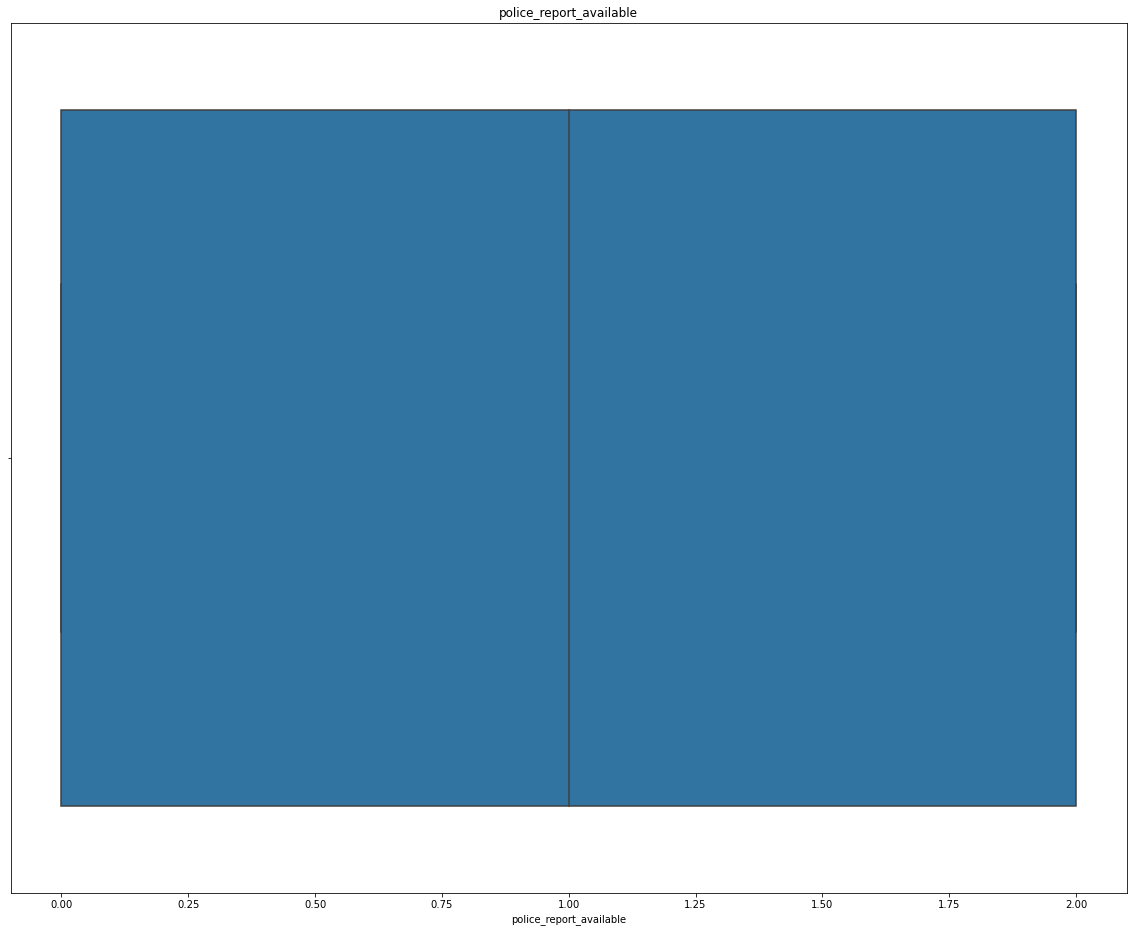

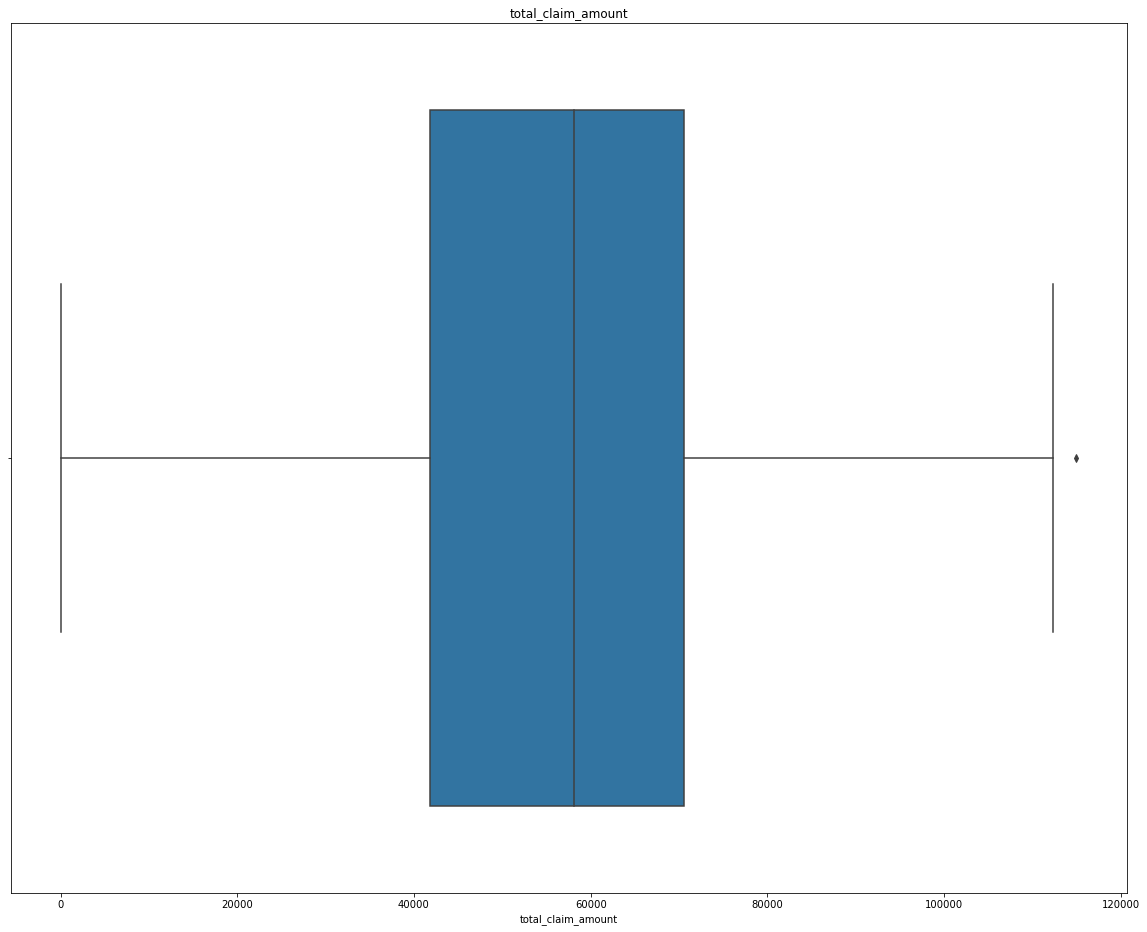

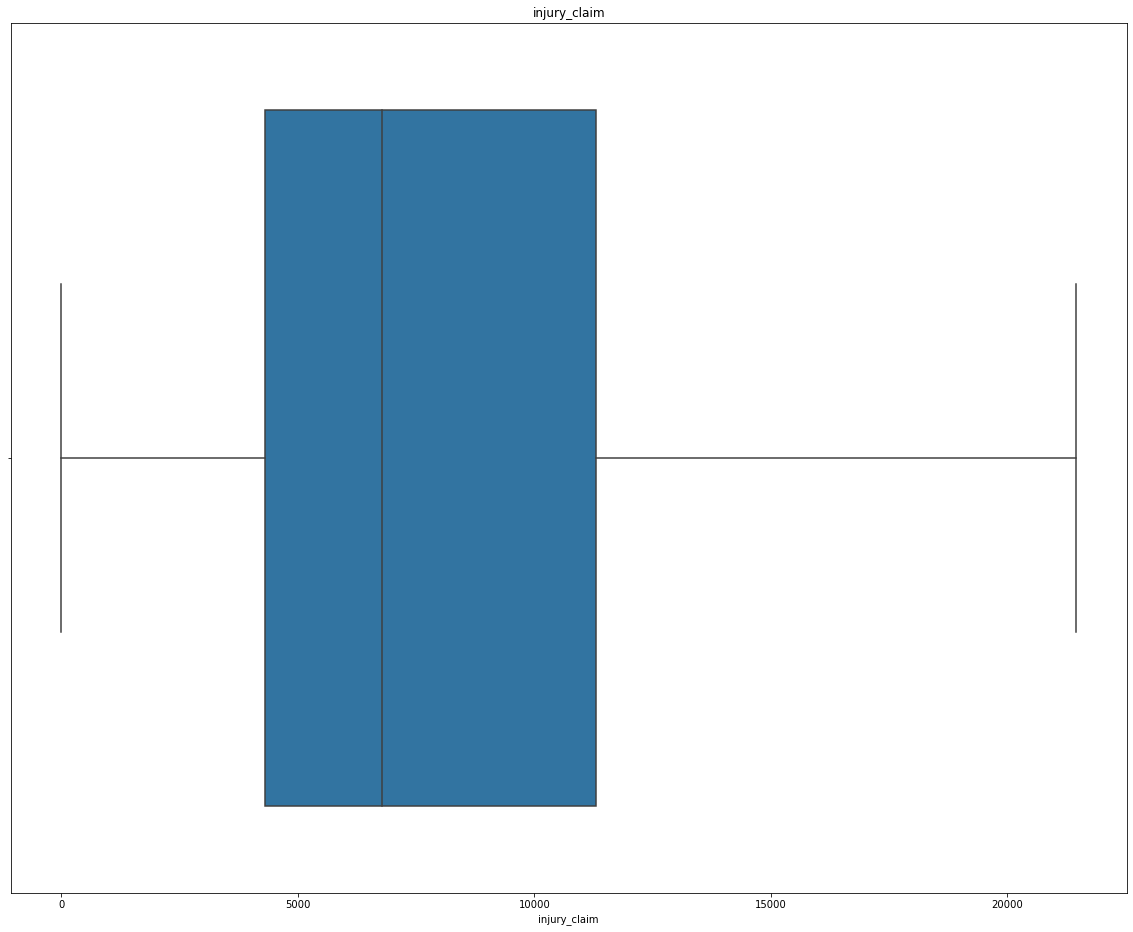

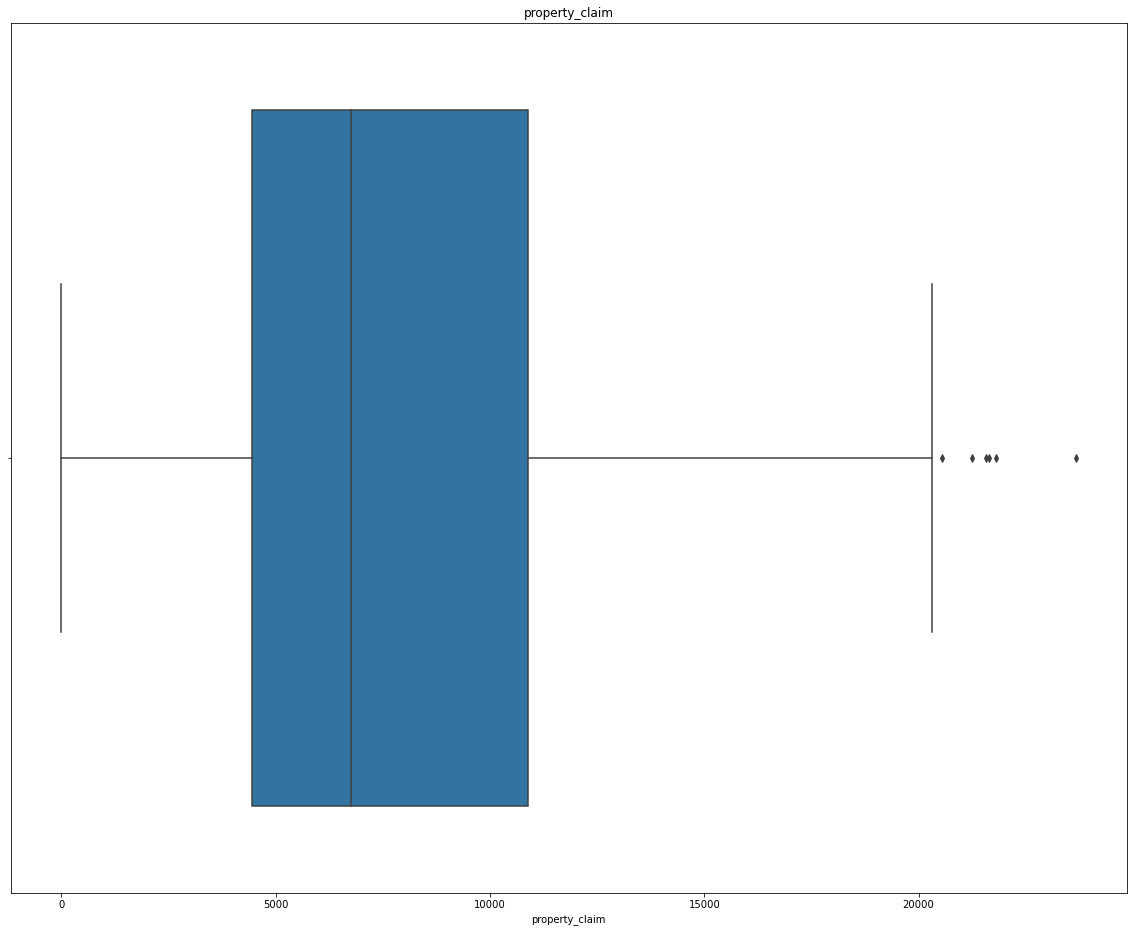

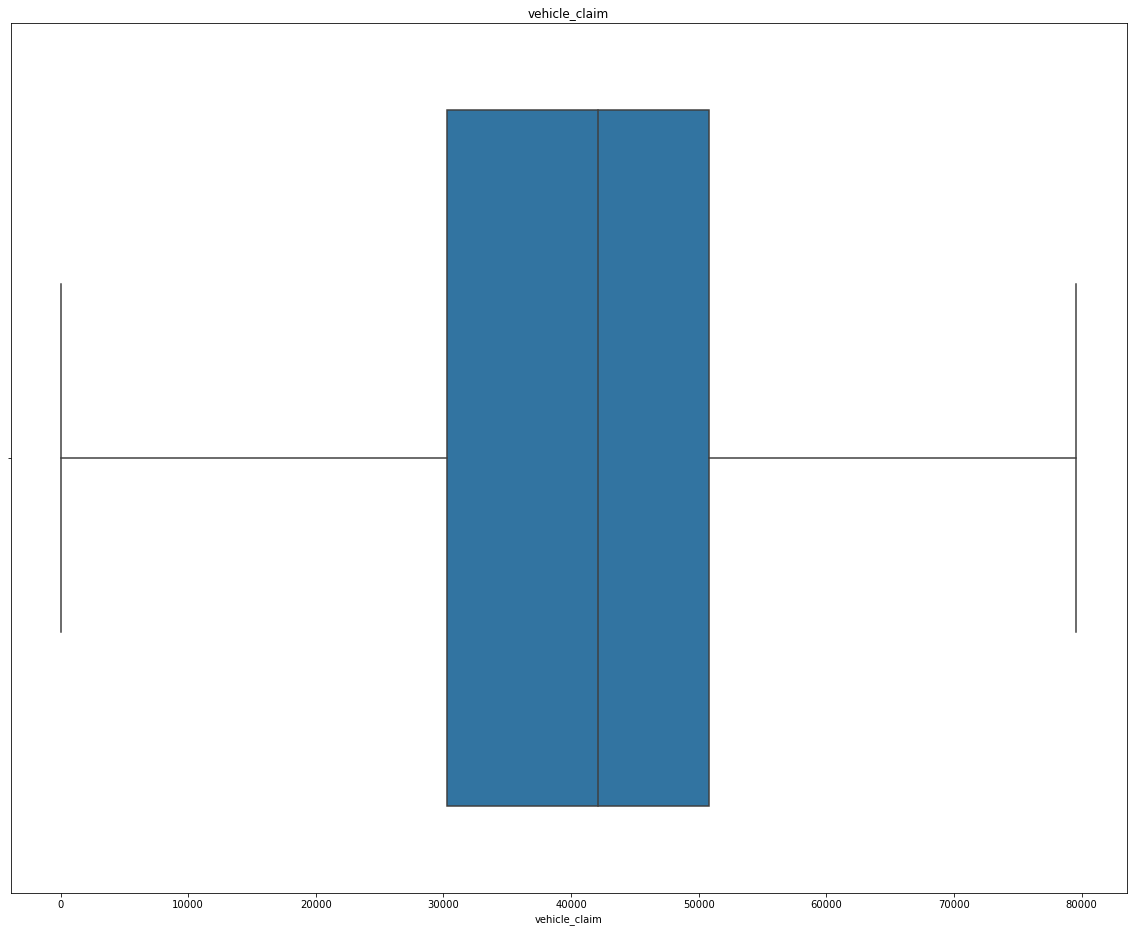

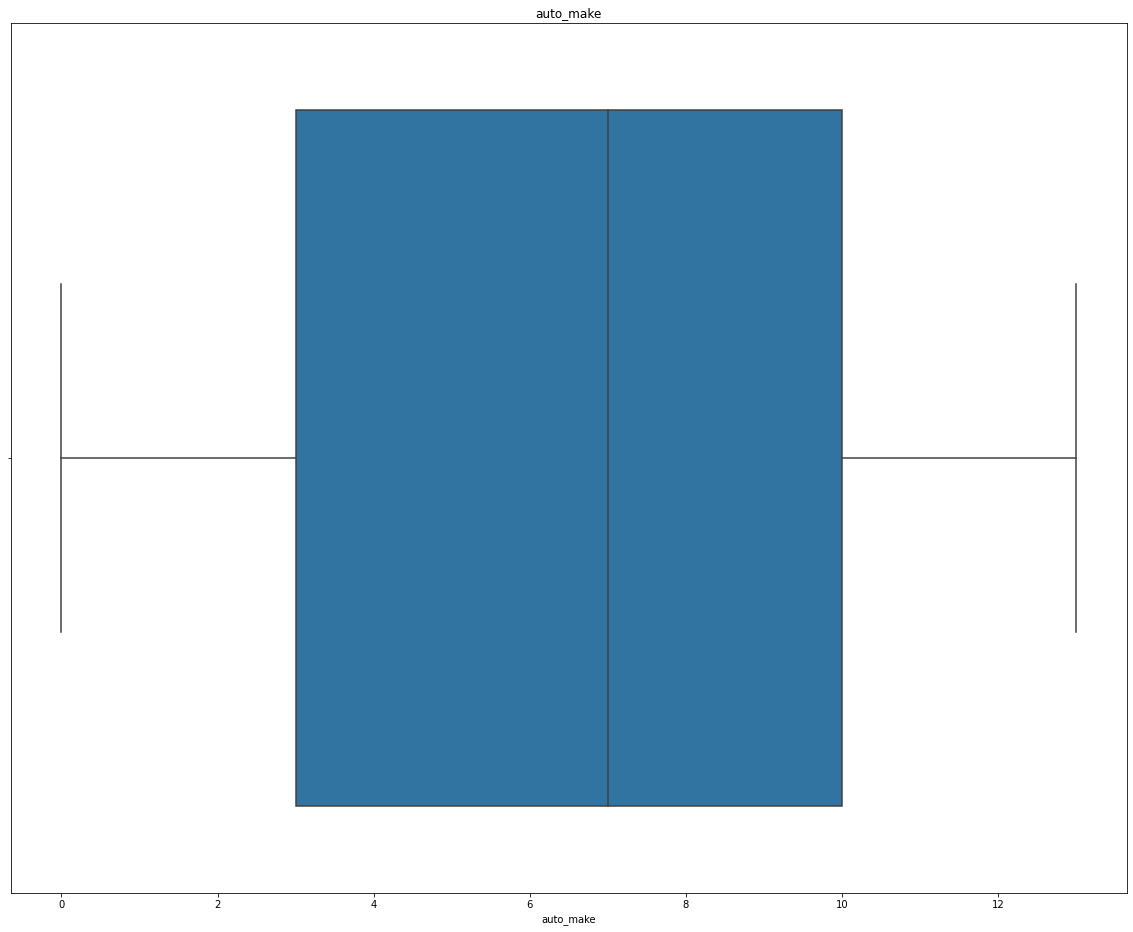

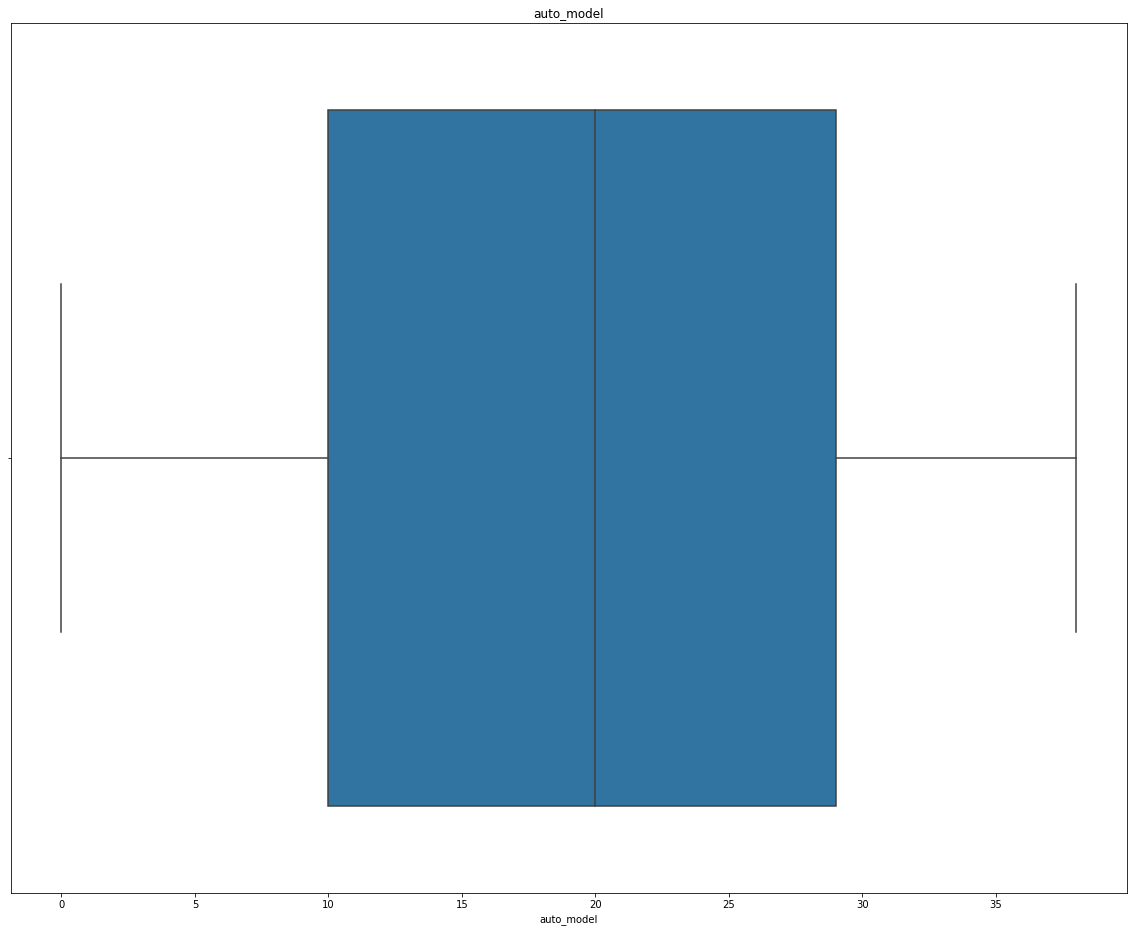

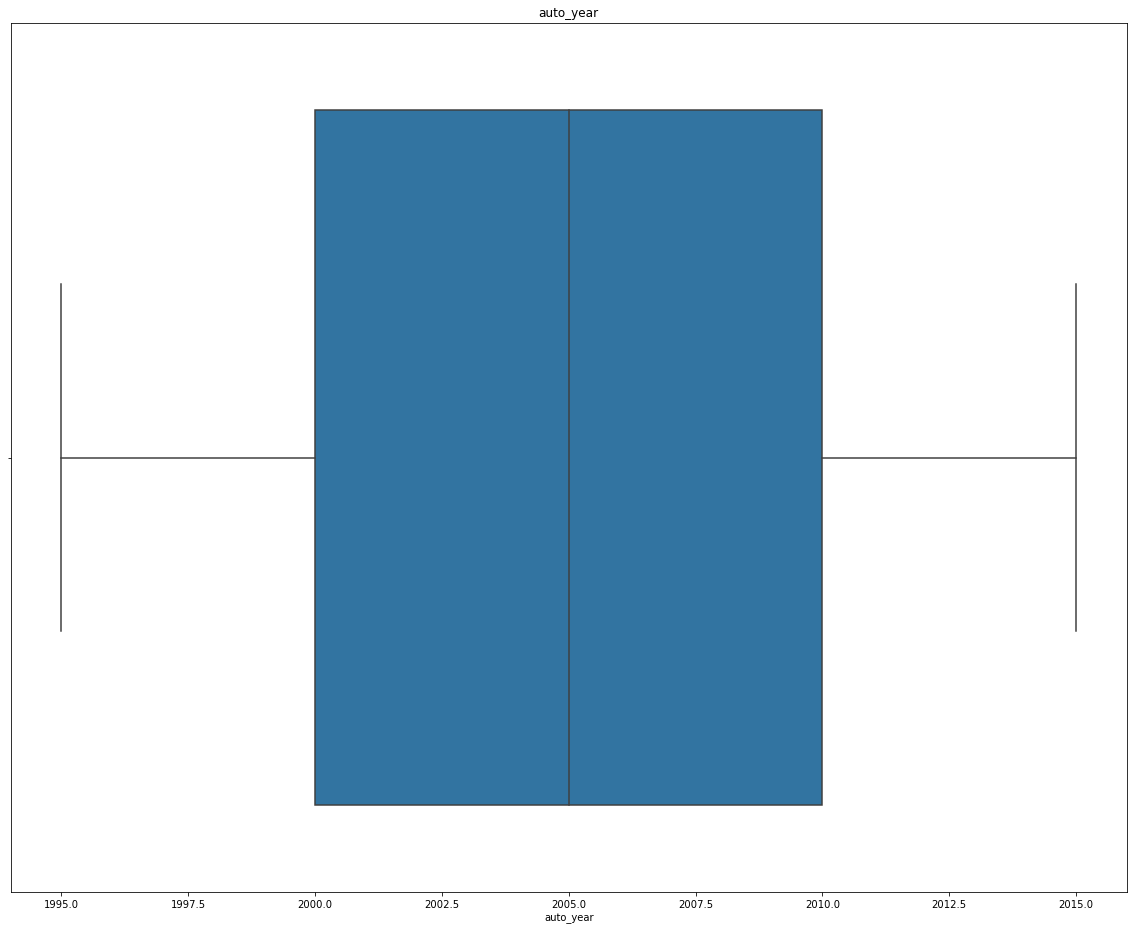

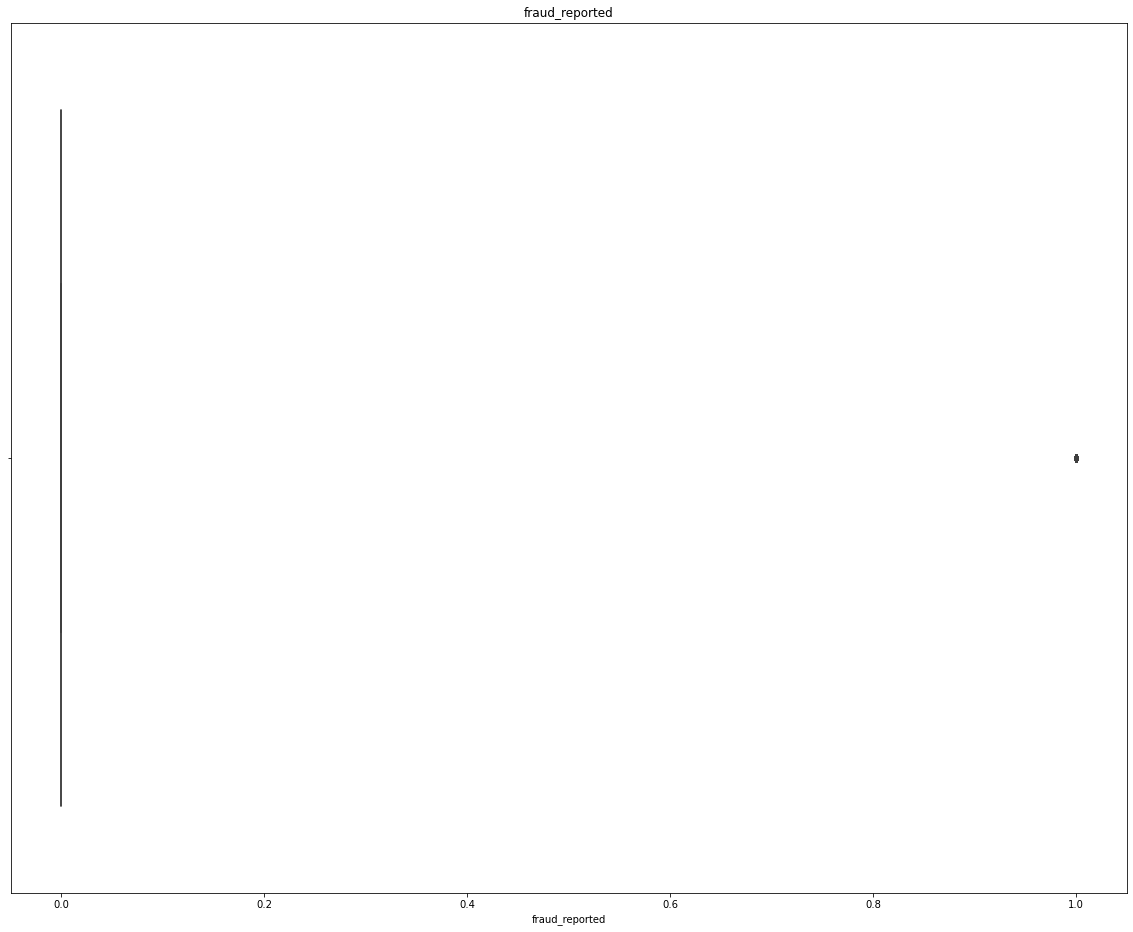

In [216]:
for i in df.columns:
    plt.figure(figsize=[20,16])
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

We can see outliers in age,policy_annual_premium,umbrella_unit,total_claim_amount,property_claim,fraud_reported.

# Removing the Outliers

In [227]:
IQR=df.age.quantile(0.75) - df.age.quantile(0.25)
lowerbridge = df['age'].quantile(0.25)-(IQR*1.5)
upperbridge = df['age'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lowerbridge)
print('Upper bridge is',upperbridge)

Lower bridge is 14.0
Upper bridge is 62.0


In [228]:
data = df.copy()

In [229]:
data.loc[df['age']>62,'age'] = 62
data.loc[df['age']<14,'age'] = 14

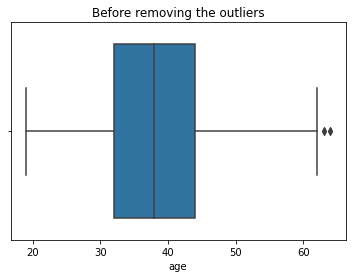

In [230]:
sns.boxplot(df['age'])
plt.title('Before removing the outliers')
plt.show()

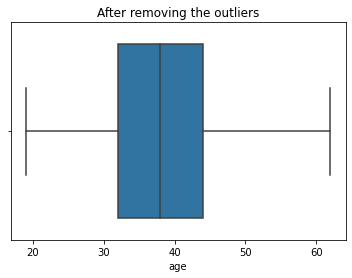

In [231]:
sns.boxplot(data['age'])
plt.title('After removing the outliers')
plt.show()

In [232]:
IQR=df.policy_annual_premium.quantile(0.75) - df.policy_annual_premium.quantile(0.25)
lowerbridge = df['policy_annual_premium'].quantile(0.25)-(IQR*1.5)
upperbridge = df['policy_annual_premium'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lowerbridge)
print('Upper bridge is',upperbridge)

Lower bridge is 600.4762500000003
Upper bridge is 1904.8262499999996


In [233]:
data.loc[df['policy_annual_premium']>1904.8262499999996,'policy_annual_premium'] = 1904.8262499999996
data.loc[df['policy_annual_premium']<600.4762500000003,'policy_annual_premium'] = 600.4762500000003

Text(0.5, 1.0, 'Before removing outliers')

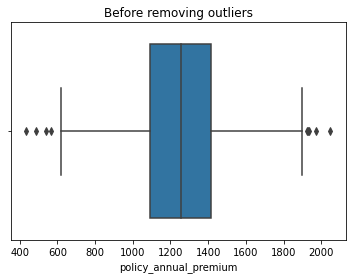

In [234]:
sns.boxplot(df['policy_annual_premium'])
plt.title('Before removing outliers')
plt.show()

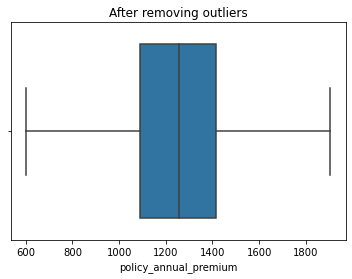

In [236]:
sns.boxplot(data['policy_annual_premium'])
plt.title('After removing outliers')
plt.show()

In [238]:
IQR = df.umbrella_limit.quantile(0.75) - df.umbrella_limit.quantile(0.25)
lowerbridge = df['umbrella_limit'].quantile(0.25) - (IQR*1.5)
upperbridge = df['umbrella_limit'].quantile(0.75) + (IQR*1.5)
print('Lowerbridge is',lowerbridge)
print('Upperbridge is',upperbridge)

Lowerbridge is 0.0
Upperbridge is 0.0


In [239]:
data.loc[df['umbrella_limit']>0,'umbrella_limit'] = 0
data.loc[df['umbrella_limit']<0,'umbrella_limit'] = 0

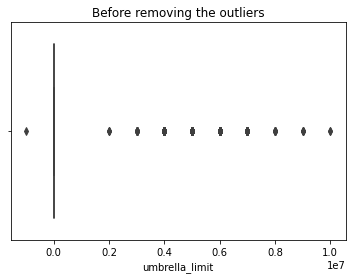

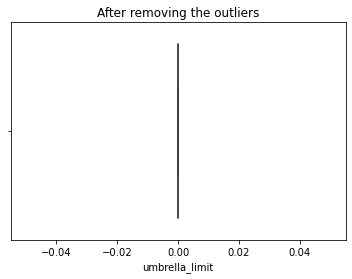

In [240]:
sns.boxplot(df['umbrella_limit'])
plt.title('Before removing the outliers')
plt.show()

sns.boxplot(data['umbrella_limit'])
plt.title('After removing the outliers')
plt.show()

In [241]:
IQR = df.total_claim_amount.quantile(0.75) - df.total_claim_amount.quantile(0.25)
lowerbridge=df['total_claim_amount'].quantile(0.25)-(IQR*1.5)
upperbridge=df['total_claim_amount'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lowerbridge)
print('Upper bridge is',upperbridge)

Lower bridge is -1357.5
Upper bridge is 113762.5


In [242]:
data.loc[df['total_claim_amount']>113762.5,'total_claim_amount'] =  113762.5

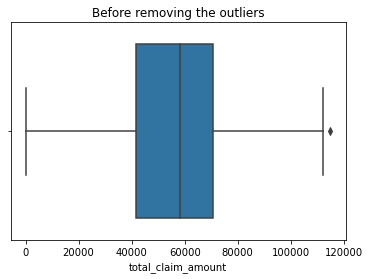

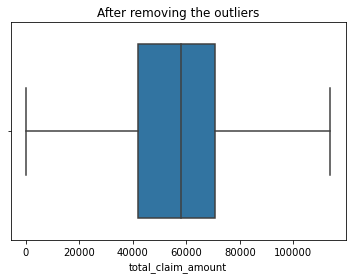

In [243]:
sns.boxplot(df['total_claim_amount'])
plt.title('Before removing the outliers')
plt.show()

sns.boxplot(data['total_claim_amount'])
plt.title('After removing the outliers')
plt.show()

In [244]:
IQR=df.property_claim.quantile(0.75) - df.property_claim.quantile(0.25)
lowerbridge = df['property_claim'].quantile(0.25)-(IQR*1.5)
upperbridge = df['property_claim'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lowerbridge)
print('Upper bridge is',upperbridge)

Lower bridge is -5215.0
Upper bridge is 20545.0


In [245]:
data.loc[df['property_claim']>20545,'property_claim'] = 20545

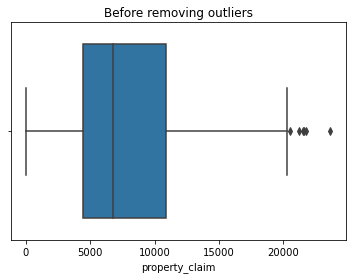

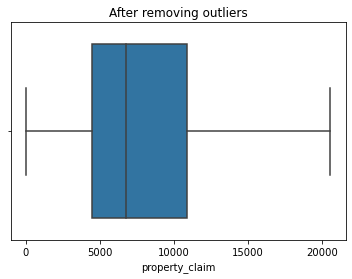

In [246]:
sns.boxplot(df['property_claim'])
plt.title('Before removing outliers')
plt.show()

sns.boxplot(data['property_claim'])
plt.title('After removing outliers')
plt.show()

In [247]:
df=data

# Splitting the dataset

In [260]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

# Checking the skewness

In [261]:
x.skew()

months_as_customer             0.362177
age                            0.469878
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.016003
umbrella_limit                 0.000000
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.064799
bodily_injuries                0.014777


In [262]:
x['insured_zip'] = np.cbrt(x['insured_zip'])

In [263]:
x.skew()

months_as_customer             0.362177
age                            0.469878
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.016003
umbrella_limit                 0.000000
insured_zip                    0.794586
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.064799
bodily_injuries                0.014777


# Scaling the data

In [266]:
from sklearn.preprocessing import StandardScaler

In [267]:
sc=StandardScaler()

In [268]:
df_x=sc.fit_transform(x)

In [269]:
df_x=pd.DataFrame(df_x,columns=x.columns)

In [270]:
x=df_x

# Finding the best random state

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB

In [273]:
maxaccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu = acc
        maxRS=i
print('Maximum Accuracy is',acc,'for Random State',maxRS)

Maximum Accuracy is 0.7909090909090909 for Random State 65


# Model Selection

In [276]:
lr=LogisticRegression()
svc=SVC()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gnb=GaussianNB()

In [279]:
model=[lr,svc,dtc,rfc,gnb]
for i in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=65)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('Accuracy score for',i,':')
    print(accuracy_score(pred,y_test))
    print(f1_score(pred,y_test))
    cvs=cross_val_score(i,x,y,cv=5)
    print('Cross validation score for',i,':',cvs.mean())
    print('Difference between Accuracy score and Cross Validation score :', accuracy_score(pred,y_test) - cvs.mean())
    print('\t')
    print('\t')

Accuracy score for LogisticRegression() :
0.8318181818181818
0.4788732394366198
Cross validation score for LogisticRegression() : 0.7710000000000001
Difference between Accuracy score and Cross Validation score : 0.06081818181818166
	
	
Accuracy score for SVC() :
0.8090909090909091
0.15999999999999998
Cross validation score for SVC() : 0.746
Difference between Accuracy score and Cross Validation score : 0.06309090909090909
	
	
Accuracy score for DecisionTreeClassifier() :
0.8409090909090909
0.6391752577319588
Cross validation score for DecisionTreeClassifier() : 0.772
Difference between Accuracy score and Cross Validation score : 0.06890909090909092
	
	
Accuracy score for RandomForestClassifier() :
0.8136363636363636
0.4225352112676057
Cross validation score for RandomForestClassifier() : 0.7689999999999999
Difference between Accuracy score and Cross Validation score : 0.044636363636363696
	
	
Accuracy score for GaussianNB() :
0.7818181818181819
0.5714285714285714
Cross validation score

We can see that Random Forest Classifier has got least difference between Accuracy score and Cross validation score

# Hyperparameter tuning for Random Forest Classifier

In [280]:
from sklearn.model_selection import GridSearchCV

In [281]:
parameters = {'n_estimators':[100],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy']}

In [282]:
GCV_RF=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV_RF.fit(x_train,y_train)
GCV_RF.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 100}

In [283]:
RF_mod=RandomForestClassifier(criterion = 'gini',max_depth = 7,n_estimators=100)
RF_mod.fit(x_train,y_train)
pred=RF_mod.predict(x_test)
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

0.8181818181818182
0.3333333333333333


# AUC ROC Curve

In [288]:
from sklearn.metrics import plot_roc_curve

In [289]:
from sklearn.metrics import roc_auc_score,roc_curve

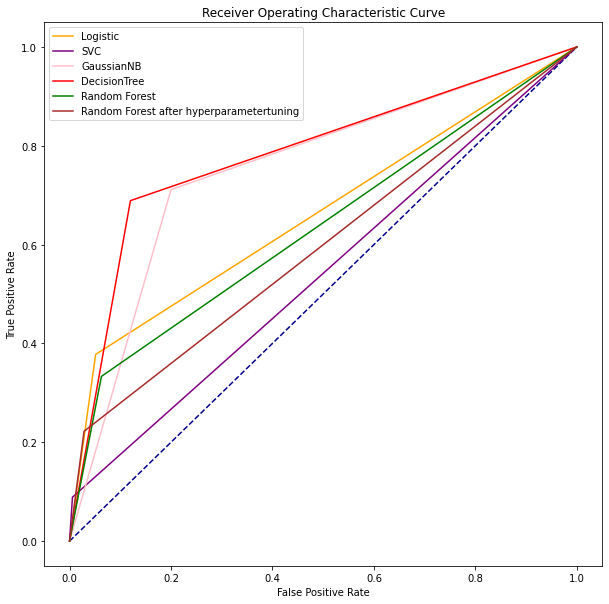

In [291]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr.predict(x_test))
plt.plot(fpr, tpr, color='orange', label='Logistic')

fpr1, tpr1, thresholds = roc_curve(y_test, svc.predict(x_test))
plt.plot(fpr1, tpr1, color='purple', label= 'SVC')

fpr2, tpr2, thresholds = roc_curve(y_test, gnb.predict(x_test))
plt.plot(fpr2, tpr2, color='pink', label='GaussianNB')

fpr3, tpr3, thresholds = roc_curve(y_test, dtc.predict(x_test))
plt.plot(fpr3, tpr3, color='red', label='DecisionTree')

fpr4, tpr4, thresholds = roc_curve(y_test, rfc.predict(x_test))
plt.plot(fpr4, tpr4, color='green', label='Random Forest')

fpr5, tpr5, thresholds = roc_curve(y_test, RF_mod.predict(x_test))
plt.plot(fpr5, tpr5, color='brown', label='Random Forest after hyperparametertuning')

plt.legend()
plt.show()

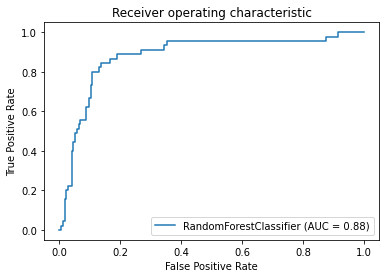

In [292]:
plot_roc_curve(RF_mod,x_test,y_test)
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Saving the model

In [293]:
import pickle

In [294]:
filename='insurance.pkl'

In [295]:
pickle.dump(RF_mod,open(filename,'wb'))

In [296]:
loaded_model=pickle.load(open('insurance.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8181818181818182


In [297]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:], RF_mod.predict(x_test)[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
